In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import plotly.express as px
pd.set_option('display.max_rows', None)  # Hiển thị toàn bộ dòng
pd.set_option('display.max_columns', None)  # Hiển thị toàn bộ cột

In [2]:
df = pd.read_csv('Data/housing_price_train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Xác định input và output

output: SalePrice

input: <>SalePrice

#  Loại bỏ các thuộc tính có giá trị null cao

In [6]:
def check_null_data(data):
    column = []
    null_count = []
    null_percent = []
    columns = data.columns
    for x in columns:
        column.append(x)
        ColumnNullCount = data[x].isnull().sum()
        null_count.append(ColumnNullCount)
        ColumnNullCountPercent = round(ColumnNullCount/data.shape[0]*100,3)
        null_percent.append(ColumnNullCountPercent)
    null_df = pd.DataFrame({
        'Columnn': column,
        'ColumnNullCount': null_count,
        'ColumnNUllPercent': null_percent
    })
    return null_df

In [7]:
null_data = check_null_data(df)
null_data = null_data.sort_values(by = 'ColumnNullCount', ascending= False)
null_data

Columnn  ColumnNullCount  ColumnNUllPercent
72         PoolQC             1453             99.521
74    MiscFeature             1406             96.301
6           Alley             1369             93.767
73          Fence             1179             80.753
25     MasVnrType              872             59.726
57    FireplaceQu              690             47.260
3     LotFrontage              259             17.740
59    GarageYrBlt               81              5.548
64     GarageCond               81              5.548
58     GarageType               81              5.548
60   GarageFinish               81              5.548
63     GarageQual               81              5.548
35   BsmtFinType2               38              2.603
32   BsmtExposure               38              2.603
30       BsmtQual               37              2.534
31       BsmtCond               37              2.534
33   BsmtFinType1               37              2.534
26     MasVnrArea                8              0.548
42     Electrical                1              0.068
0              Id                0              0.000
55     Functional                0              0.000
56     Fireplaces                0              0.000
53    KitchenQual                0              0.000
52   KitchenAbvGr                0              0.000
51   BedroomAbvGr                0              0.000
50       HalfBath                0              0.000
49       FullBath                0              0.000
48   BsmtHalfBath                0              0.000
54   TotRmsAbvGrd                0              0.000
61     GarageCars                0              0.000
46      GrLivArea                0              0.000
62     GarageArea                0              0.000
65     PavedDrive                0              0.000
66     WoodDeckSF                0              0.000
67    OpenPorchSF                0              0.000
68  EnclosedPorch                0              0.000
69      3SsnPorch                0              0.000
70    ScreenPorch                0              0.000
71       PoolArea                0              0.000
75        MiscVal                0              0.000
76         MoSold                0              0.000
77         YrSold                0              0.000
78       SaleType                0              0.000
79  SaleCondition                0              0.000
47   BsmtFullBath                0              0.000
40      HeatingQC                0              0.000
45   LowQualFinSF                0              0.000
11      LandSlope                0              0.000
17    OverallQual                0              0.000
16     HouseStyle                0              0.000
15       BldgType                0              0.000
14     Condition2                0              0.000
13     Condition1                0              0.000
12   Neighborhood                0              0.000
10      LotConfig                0              0.000
19      YearBuilt                0              0.000
9       Utilities                0              0.000
8     LandContour                0              0.000
7        LotShape                0              0.000
5          Street                0              0.000
4         LotArea                0              0.000
2        MSZoning                0              0.000
18    OverallCond                0              0.000
20   YearRemodAdd                0              0.000
44       2ndFlrSF                0              0.000
36     BsmtFinSF2                0              0.000
43       1stFlrSF                0              0.000
41     CentralAir                0              0.000
1      MSSubClass                0              0.000
39        Heating                0              0.000
38    TotalBsmtSF                0              0.000
37      BsmtUnfSF                0              0.000
34     BsmtFinSF1                0              0.000
21      RoofSt

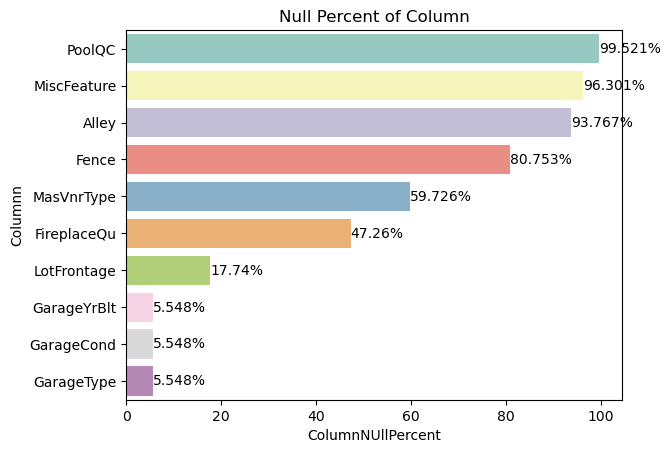

In [8]:
sns.barplot(data=null_data.head(10), x='ColumnNUllPercent', y='Columnn', orient='h', palette='Set3')
plt.title('Null Percent of Column')

# Hiển thị nhãn trên mỗi cột
for i in range(null_data.head(10).shape[0]):
    plt.annotate(str(null_data.head(10)['ColumnNUllPercent'].values[i]) + '%', 
                 xy=(null_data.head(10)['ColumnNUllPercent'].values[i], i),
                 ha='left', va='center')

plt.show()

In [9]:
# 4 Column có giá trị null trên 80% tiến hành loại bỏ những column này

In [10]:
df.drop(null_data.loc[null_data['ColumnNUllPercent'] > 80, 'Columnn'].values, axis = 1, inplace= True)

In [11]:
df.drop('Id', axis = 1, inplace= True)

In [12]:
df['MoSold'] = df['MoSold'].astype(str).str.zfill(2)

In [13]:
df['YearMonthSold'] = (df['YrSold'].astype('str')+df['MoSold'].astype('str')).astype(int)
df.drop(['MoSold', 'YrSold'], axis = 1, inplace = True)

# Xác  định các thuộc tính

In [14]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [15]:
add_categorical_columns = ['OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
CategoricalColumn = df.select_dtypes(include = 'O').columns.to_list()
NumericColumn = df.select_dtypes(exclude='O').columns.to_list()
for c in add_categorical_columns:
    CategoricalColumn.append(c)
for c in add_categorical_columns:
    NumericColumn.remove(c)
print('Categorical Column List: \n', CategoricalColumn)
print()
print('Numerical Column List: \n', NumericColumn)

Categorical Column List: 
 ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

Numerical Column List: 
 ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF

# Phân tích sự tương quan giữa các  nummerical input với output

0 -> 0.3: Không tương quan thuận

0.3 -> 0.6: Có tương quan thuận

\> 0.6: Tương quan thuận mạnh

-0.3 -> 0: Không tương quan nghịch

-0.6 -> -0.3: Có tương quan nghịch

< -0.6: Tương quan nghịch mạnh

In [16]:
# Kiểm tra những biến tương quan mạnh với output
corr = df[NumericColumn].corr()['SalePrice']
high_corr_with_output_column = corr[(corr>0.6)|(corr<-0.6)].sort_values(ascending = False).index.to_list()
display(corr[(corr>0.6)|(corr<-0.6)].sort_values(ascending = False))

SalePrice      1.000000
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

In [17]:
def corr_joinplot_chart(data, input, output, color):
    corr = round((df[input].corr(df[output])), 3)
    print(f'Correlation of {input} with {output} = {corr}')
    plt.figure(figsize = (20,20))
    sns.jointplot(data = data, x = input, y = output, kind = 'reg', color = color)
    plt.show()
    print(f'Phân bố của các khoảng giá trị trong biến {input}\n')
    display(np.histogram(df[input]))
    print()

Correlation of SalePrice with SalePrice = 1.0


<Figure size 2000x2000 with 0 Axes>

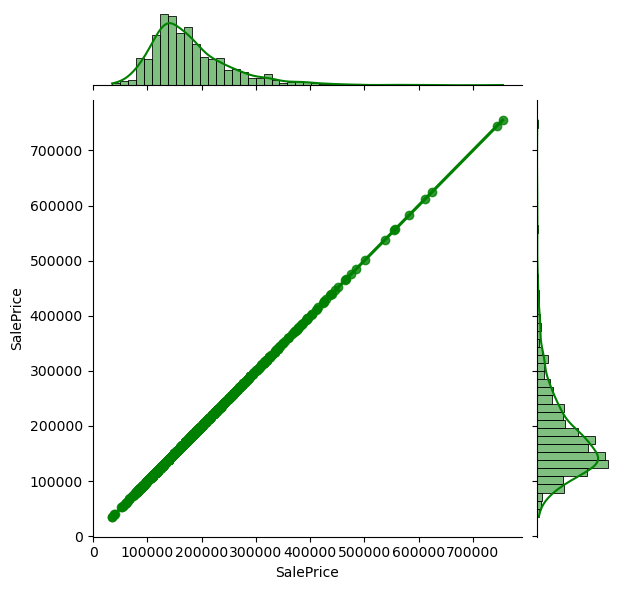

Phân bố của các khoảng giá trị trong biến SalePrice



(array([148, 723, 373, 135,  51,  19,   4,   3,   2,   2], dtype=int64),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]))


----------------------------------------------------------------------

Correlation of GrLivArea with SalePrice = 0.709


<Figure size 2000x2000 with 0 Axes>

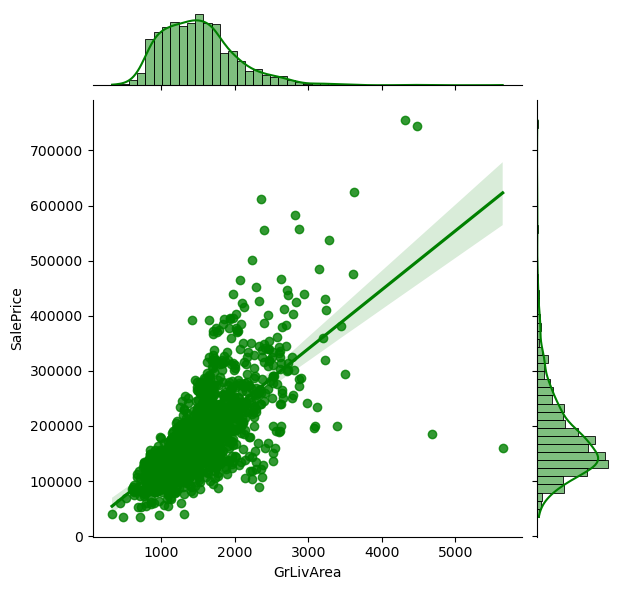

Phân bố của các khoảng giá trị trong biến GrLivArea



(array([107, 554, 535, 189,  57,  12,   2,   2,   1,   1], dtype=int64),
 array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
        4580.4, 5111.2, 5642. ]))


----------------------------------------------------------------------

Correlation of GarageArea with SalePrice = 0.623


<Figure size 2000x2000 with 0 Axes>

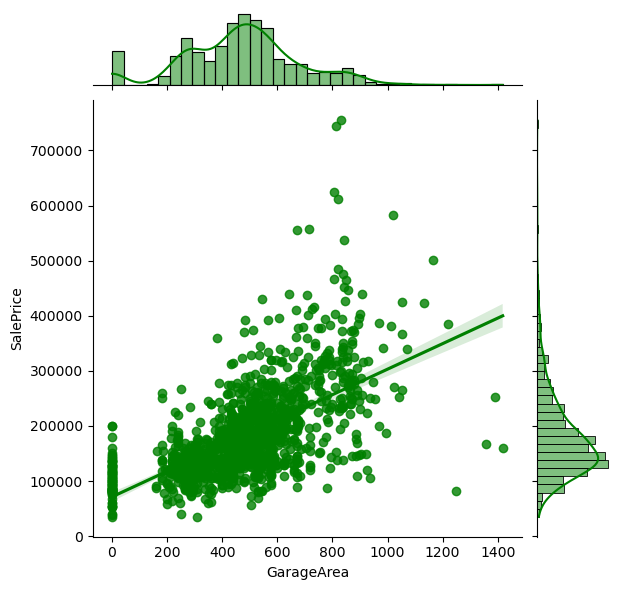

Phân bố của các khoảng giá trị trong biến GarageArea



(array([ 81, 167, 293, 500, 240, 106,  57,  10,   3,   3], dtype=int64),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]))


----------------------------------------------------------------------

Correlation of TotalBsmtSF with SalePrice = 0.614


<Figure size 2000x2000 with 0 Axes>

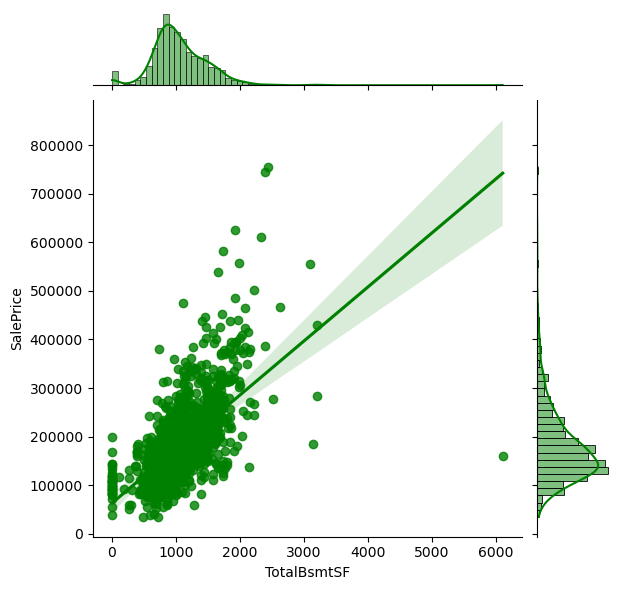

Phân bố của các khoảng giá trị trong biến TotalBsmtSF



(array([121, 907, 372,  52,   3,   4,   0,   0,   0,   1], dtype=int64),
 array([   0.,  611., 1222., 1833., 2444., 3055., 3666., 4277., 4888.,
        5499., 6110.]))


----------------------------------------------------------------------

Correlation of 1stFlrSF with SalePrice = 0.606


<Figure size 2000x2000 with 0 Axes>

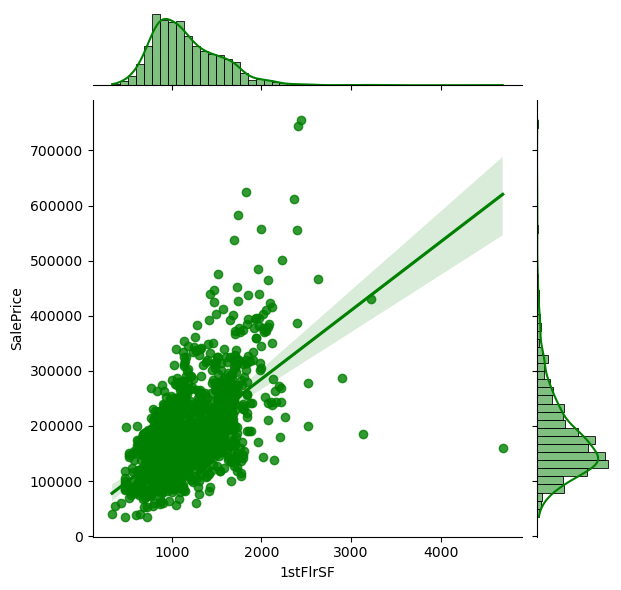

Phân bố của các khoảng giá trị trong biến 1stFlrSF



(array([165, 735, 385, 147,  21,   4,   2,   0,   0,   1], dtype=int64),
 array([ 334. ,  769.8, 1205.6, 1641.4, 2077.2, 2513. , 2948.8, 3384.6,
        3820.4, 4256.2, 4692. ]))


----------------------------------------------------------------------



In [18]:
output = 'SalePrice'
for input in high_corr_with_output_column:
    corr_joinplot_chart(df, input, output, 'green')
    print('-'*70)
    print()

Nhận xét:

Có sự tương quan thuận mạnh giữa 2 biến GrLiveArea với SalePrice vì Correlation của 2 biến này lên đến 0.709 điều này nói lên rằng diện tích của không gian sống càng lớn thì giá nhà sẽ càng tăng. Mặc khác trong dataset này diện tích của không gian sống thường tập trung trong khoảng từ 870 foot đến 2500 foot. Tuy nhiên lại có 2 đối tượng nhà ở diện tích không gian sống > 4500 foot nhưng giá nhà chỉ nằm trong khoảng từ 190000 cho dến 200000 cần phải loại bỏ 2 đối tượng này vì đây là 2 outlier

In [19]:
df = df.loc[df['GrLivArea'] < 4500]
df.shape[0]

1458

# Phân tích sự tương quan giữa biến Categorical Input với Output

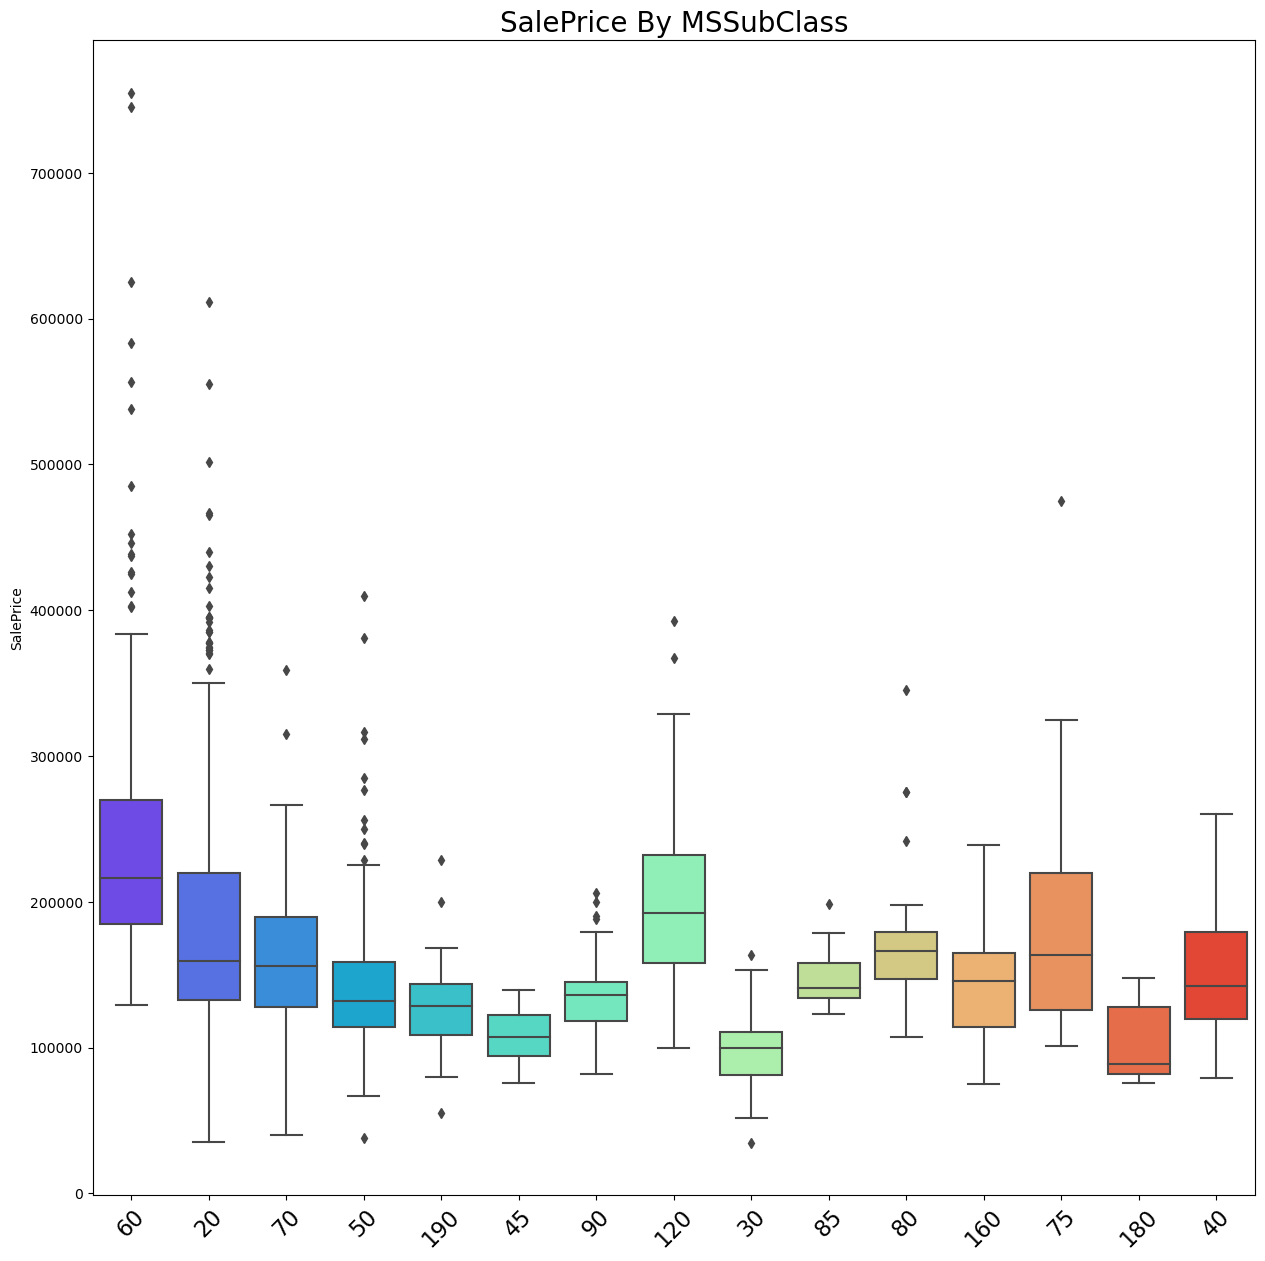

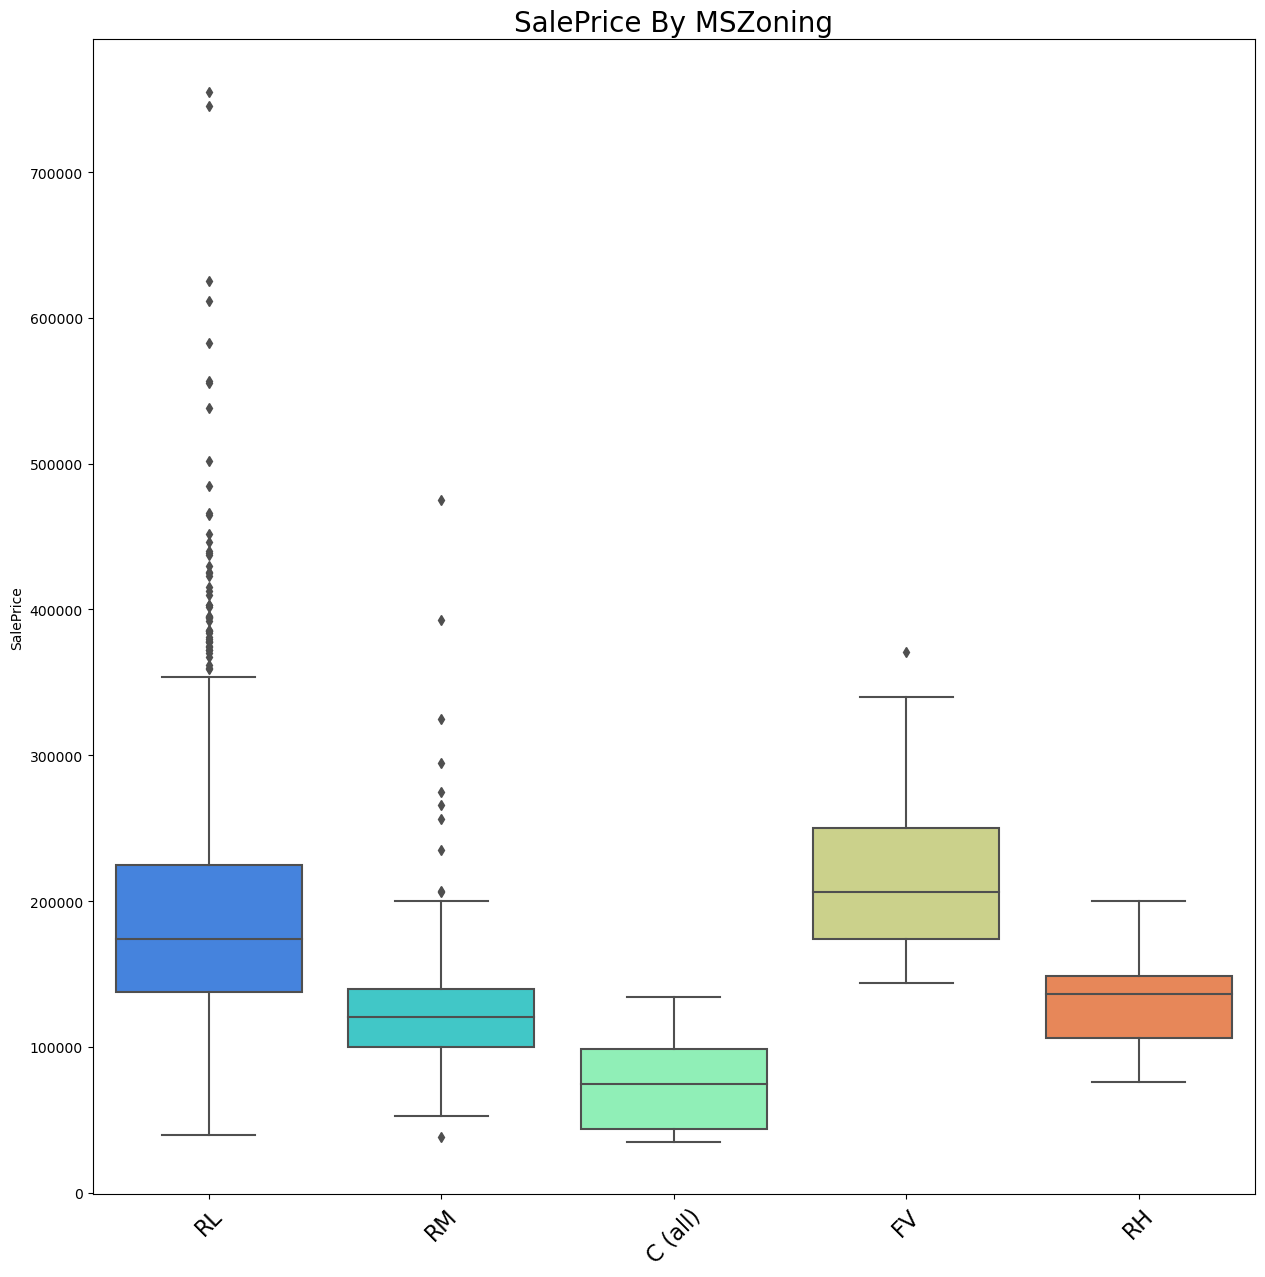

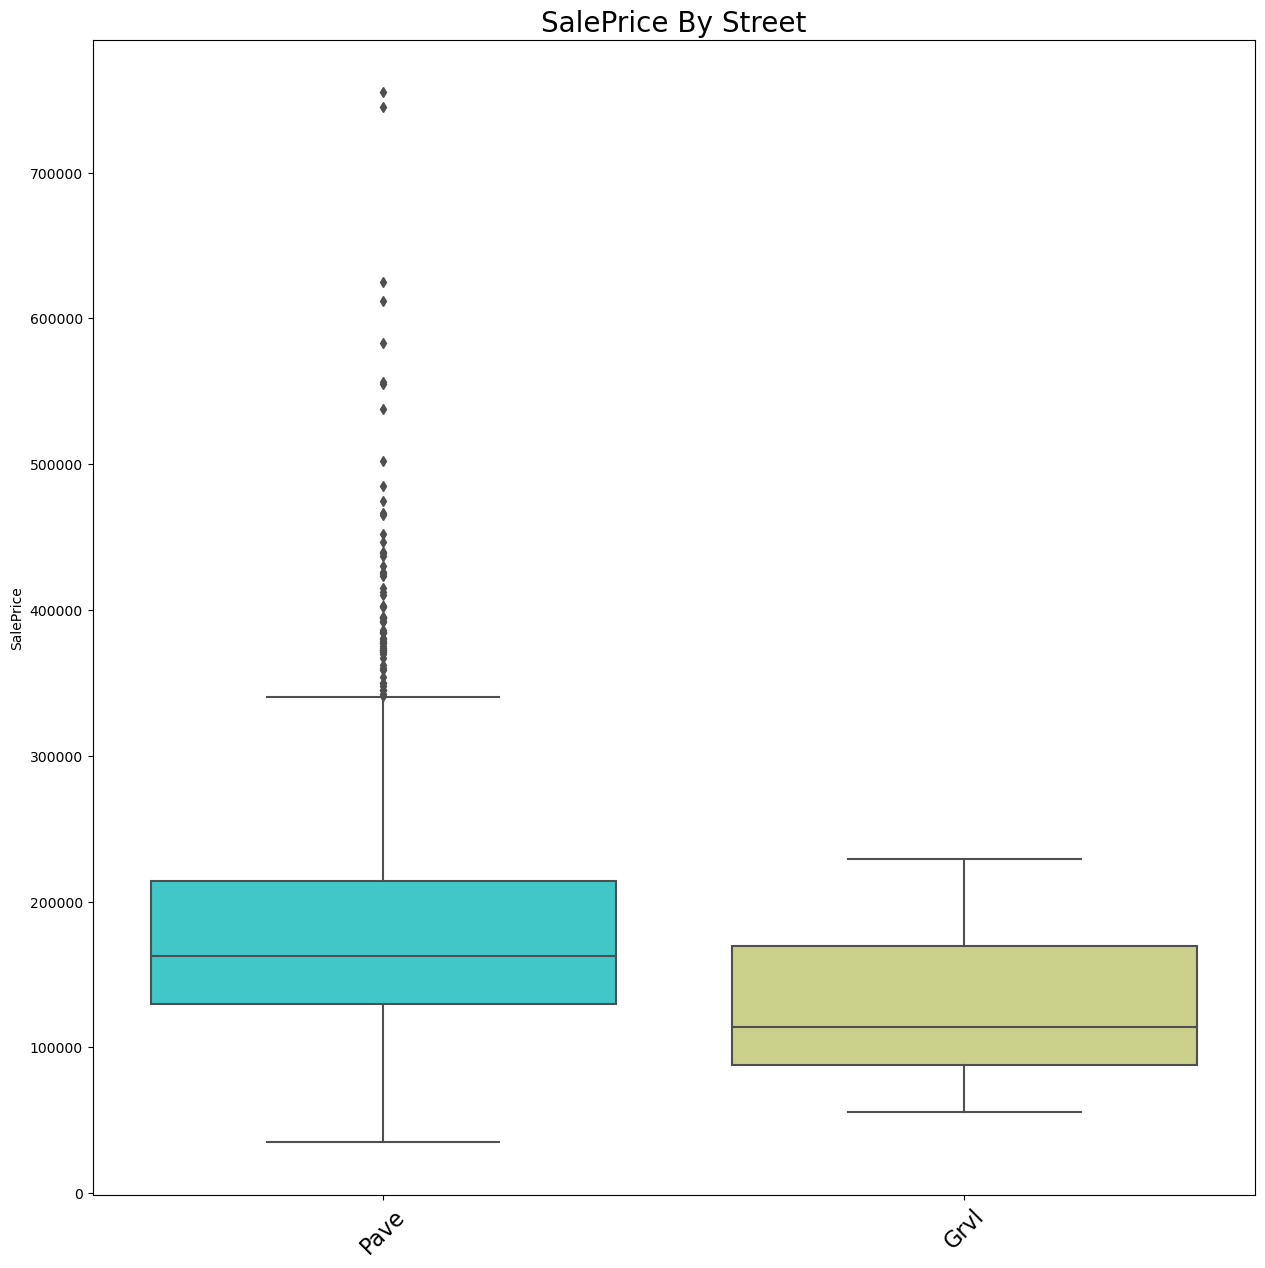

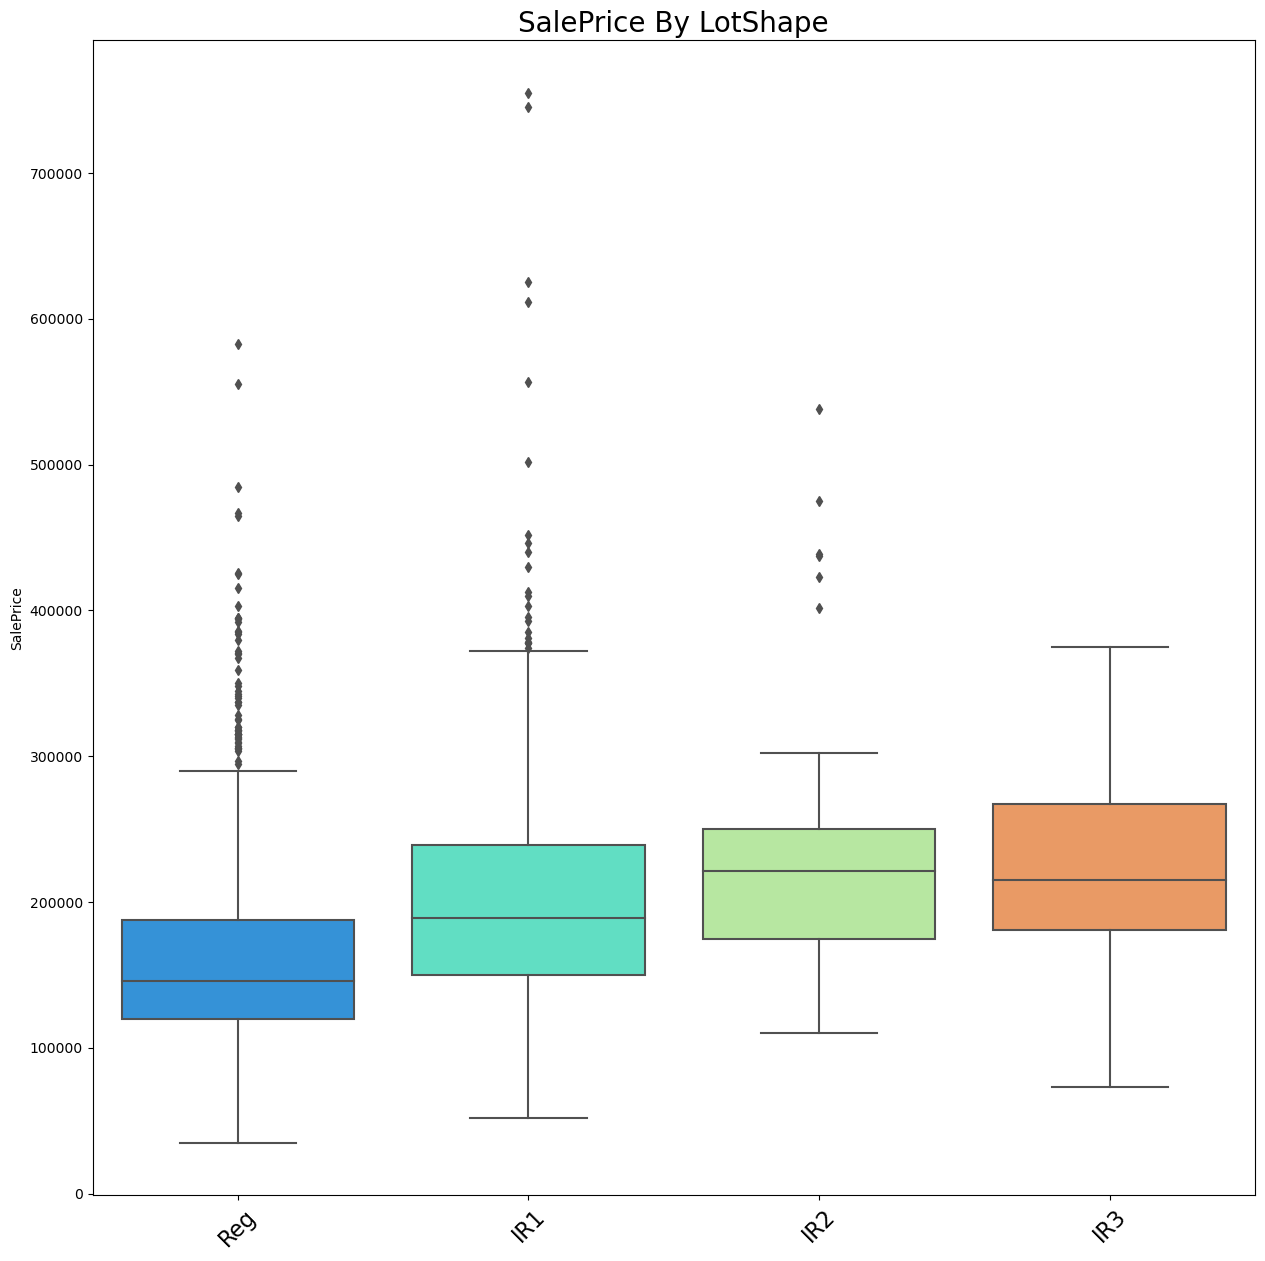

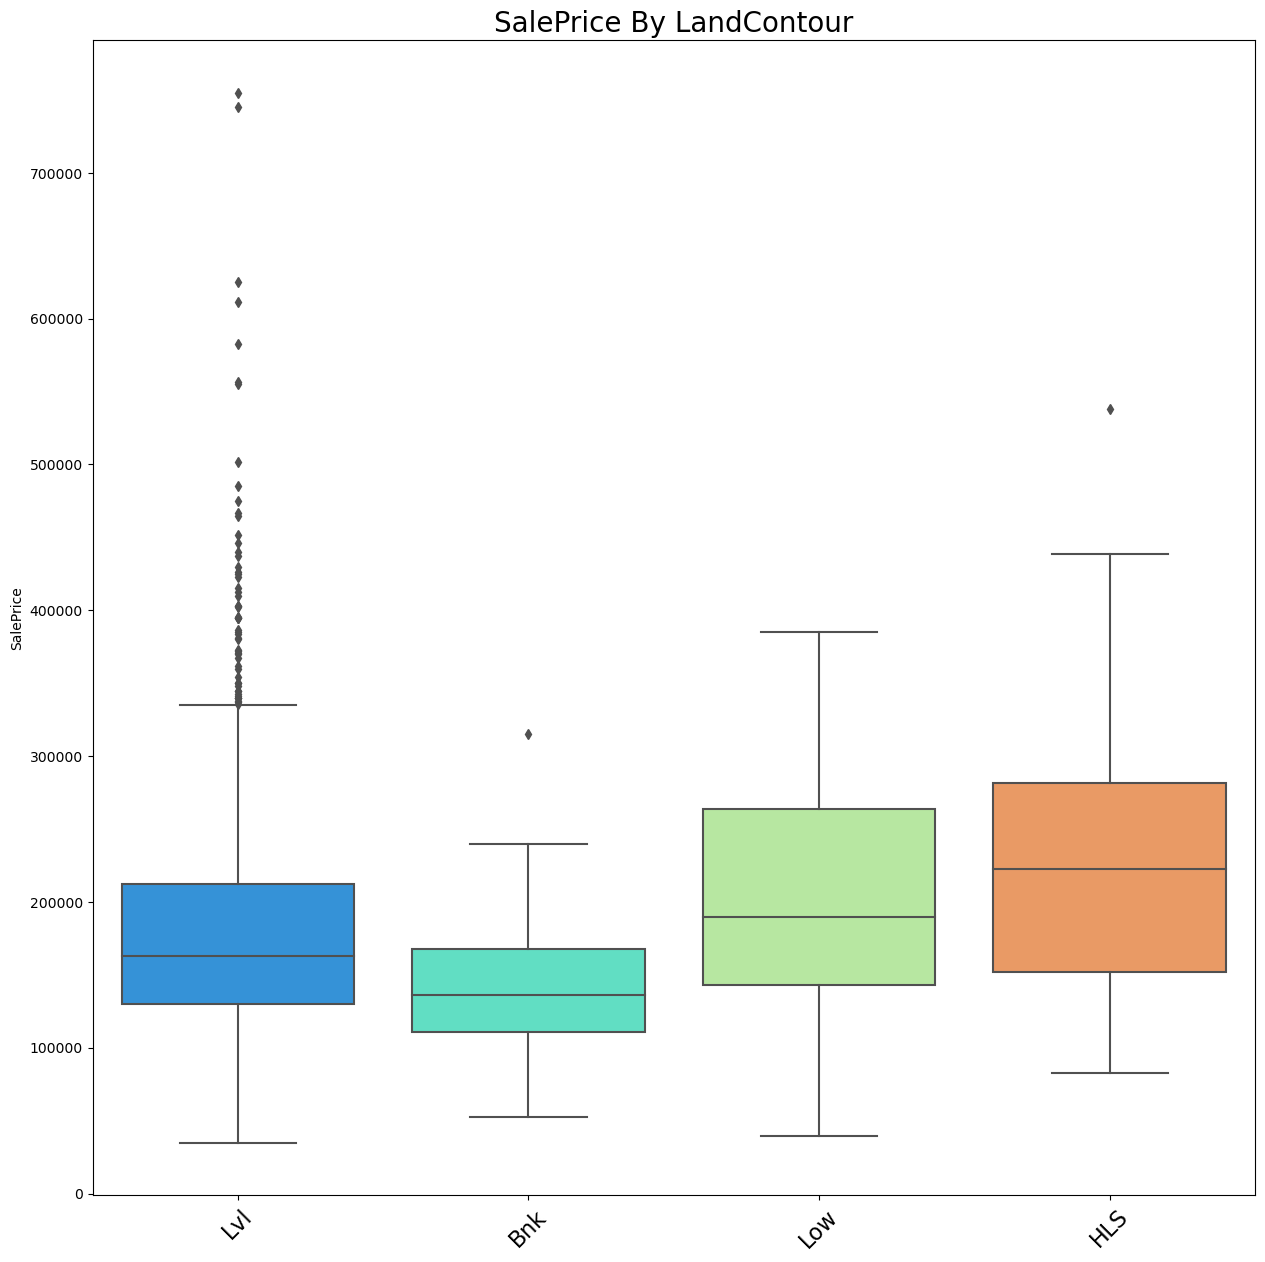

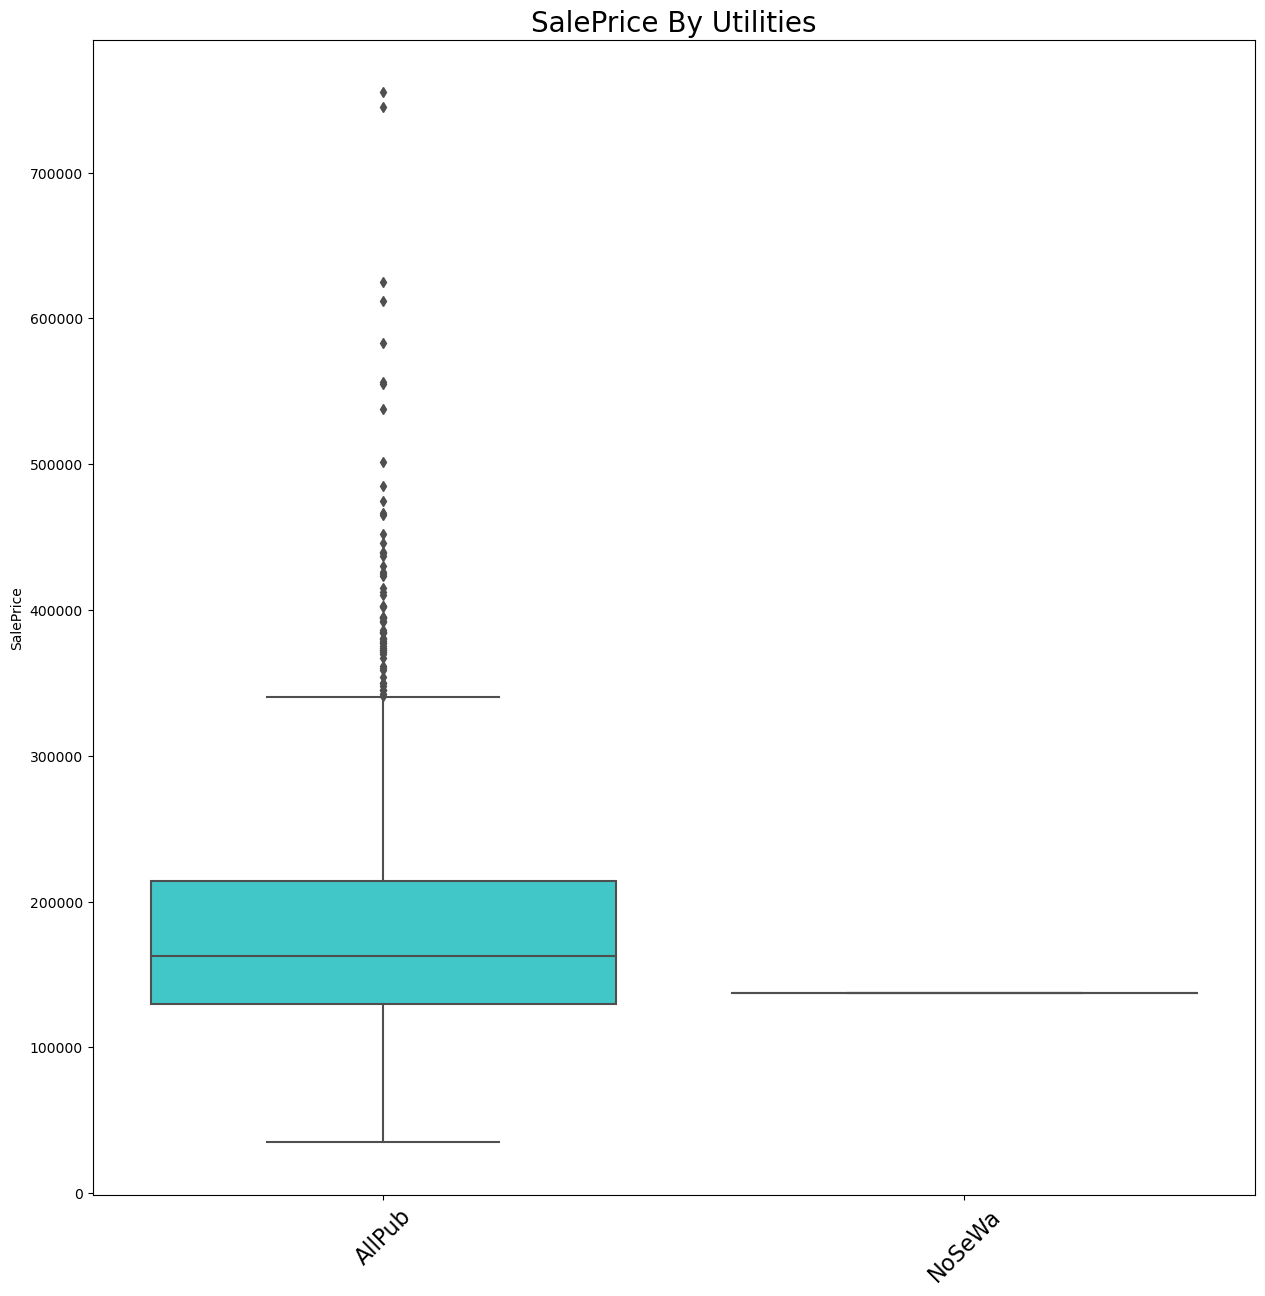

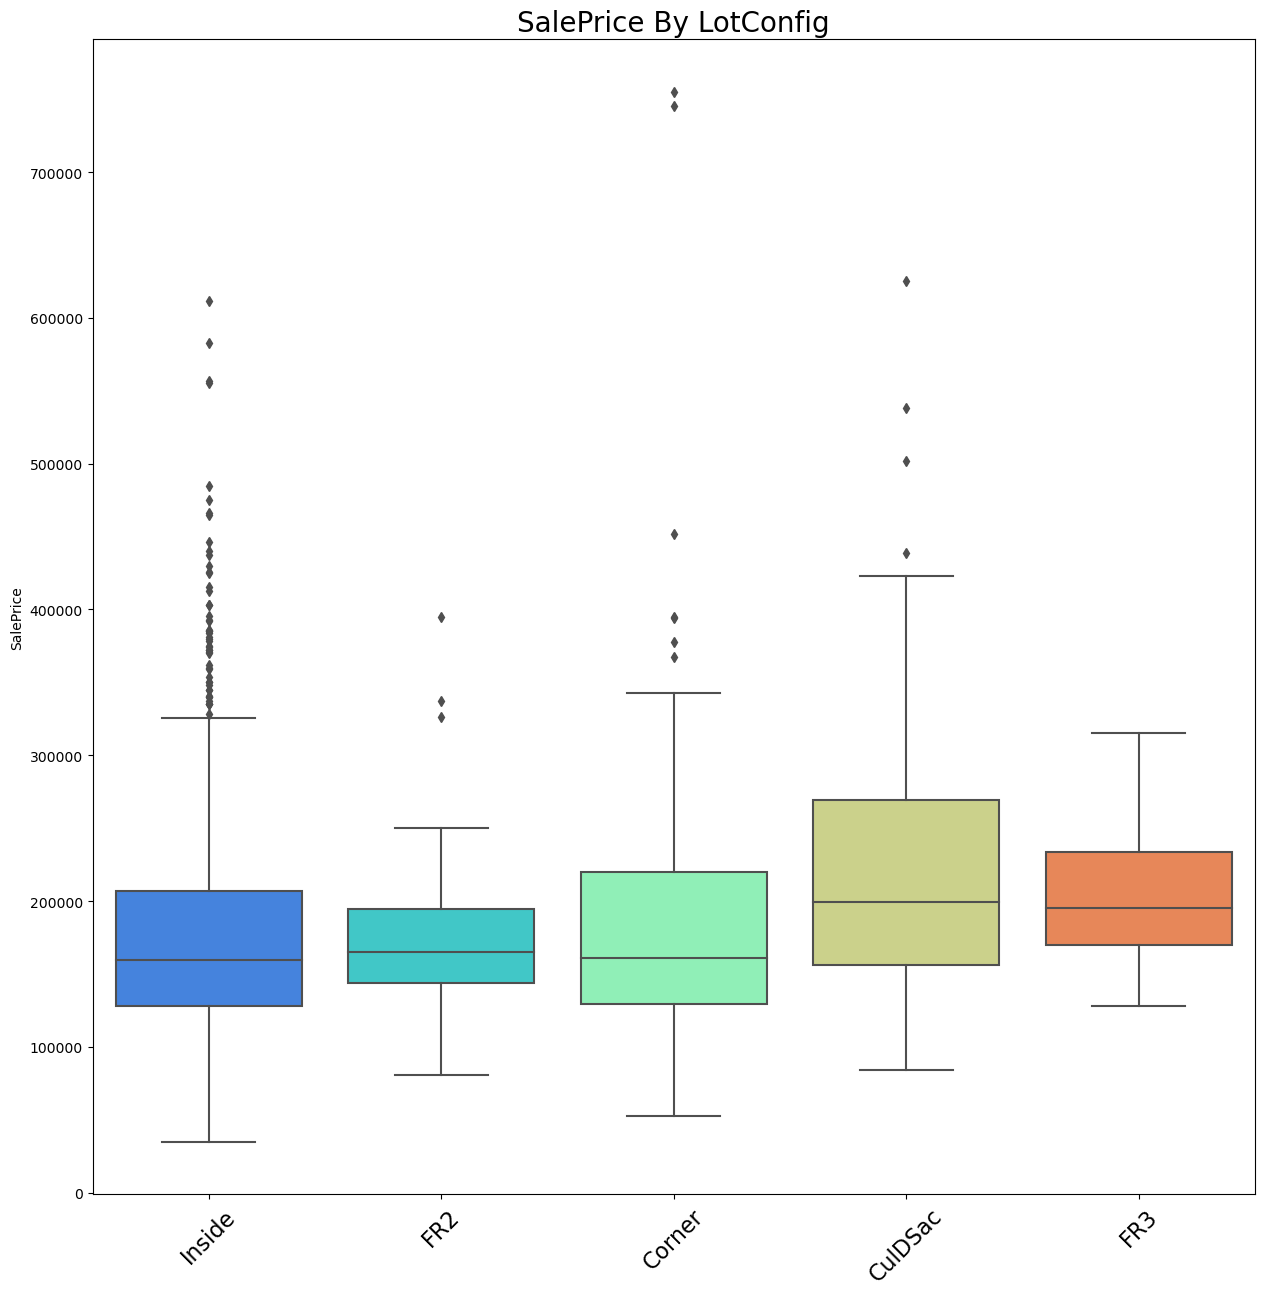

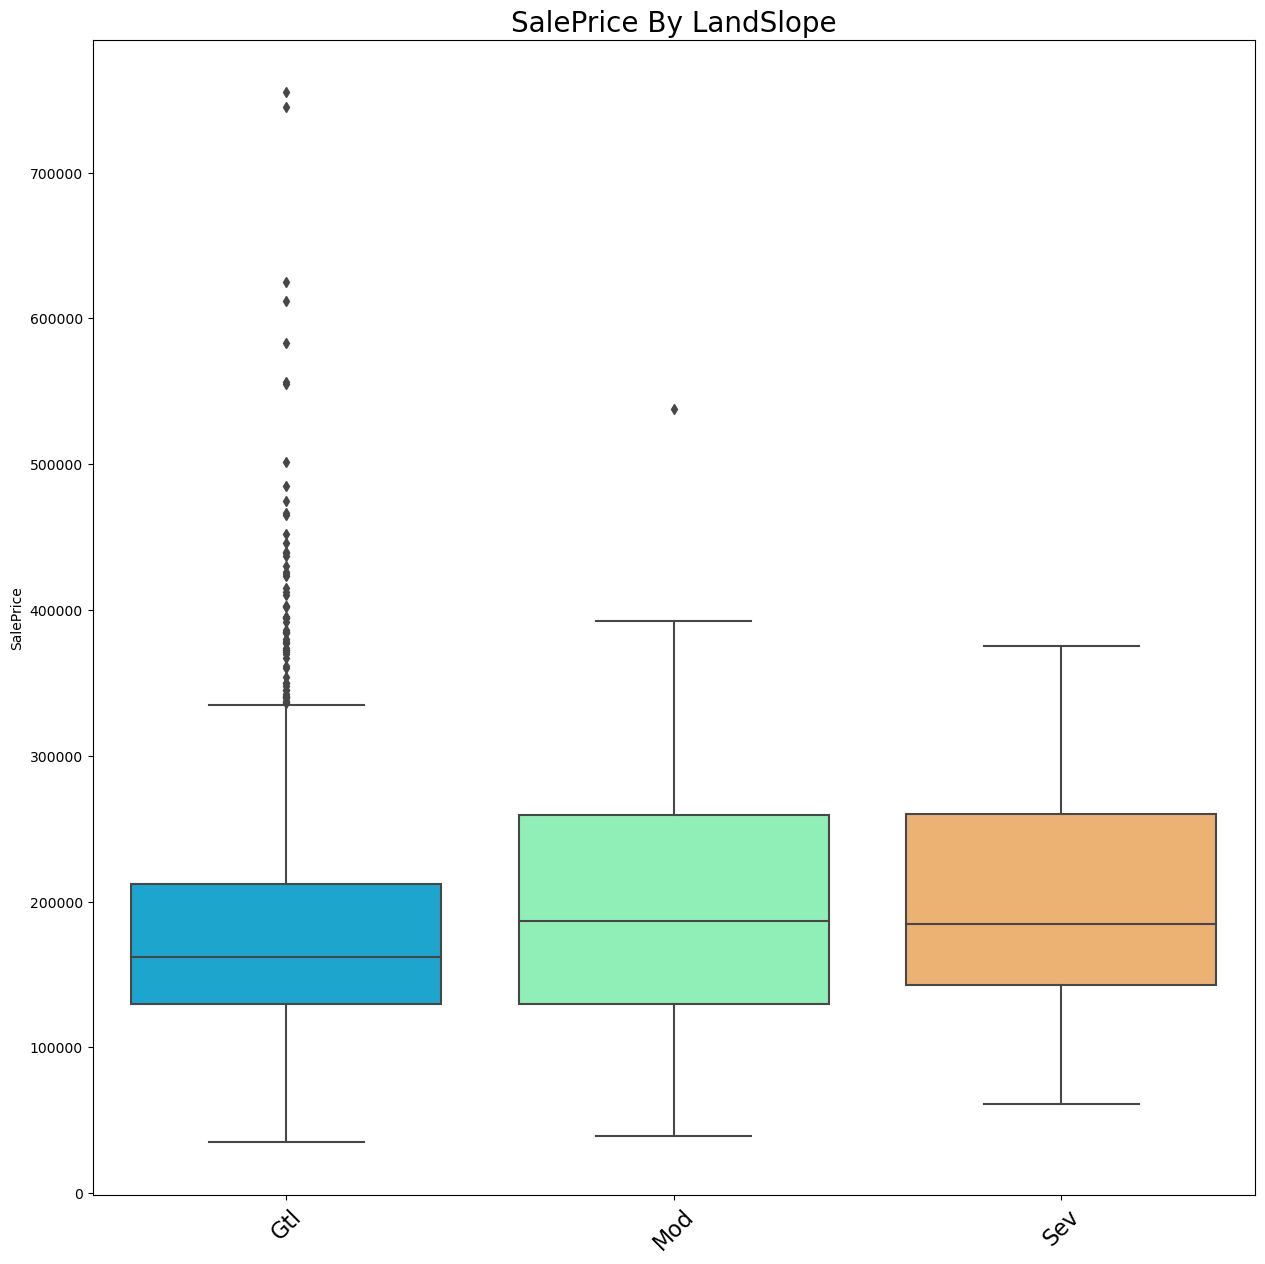

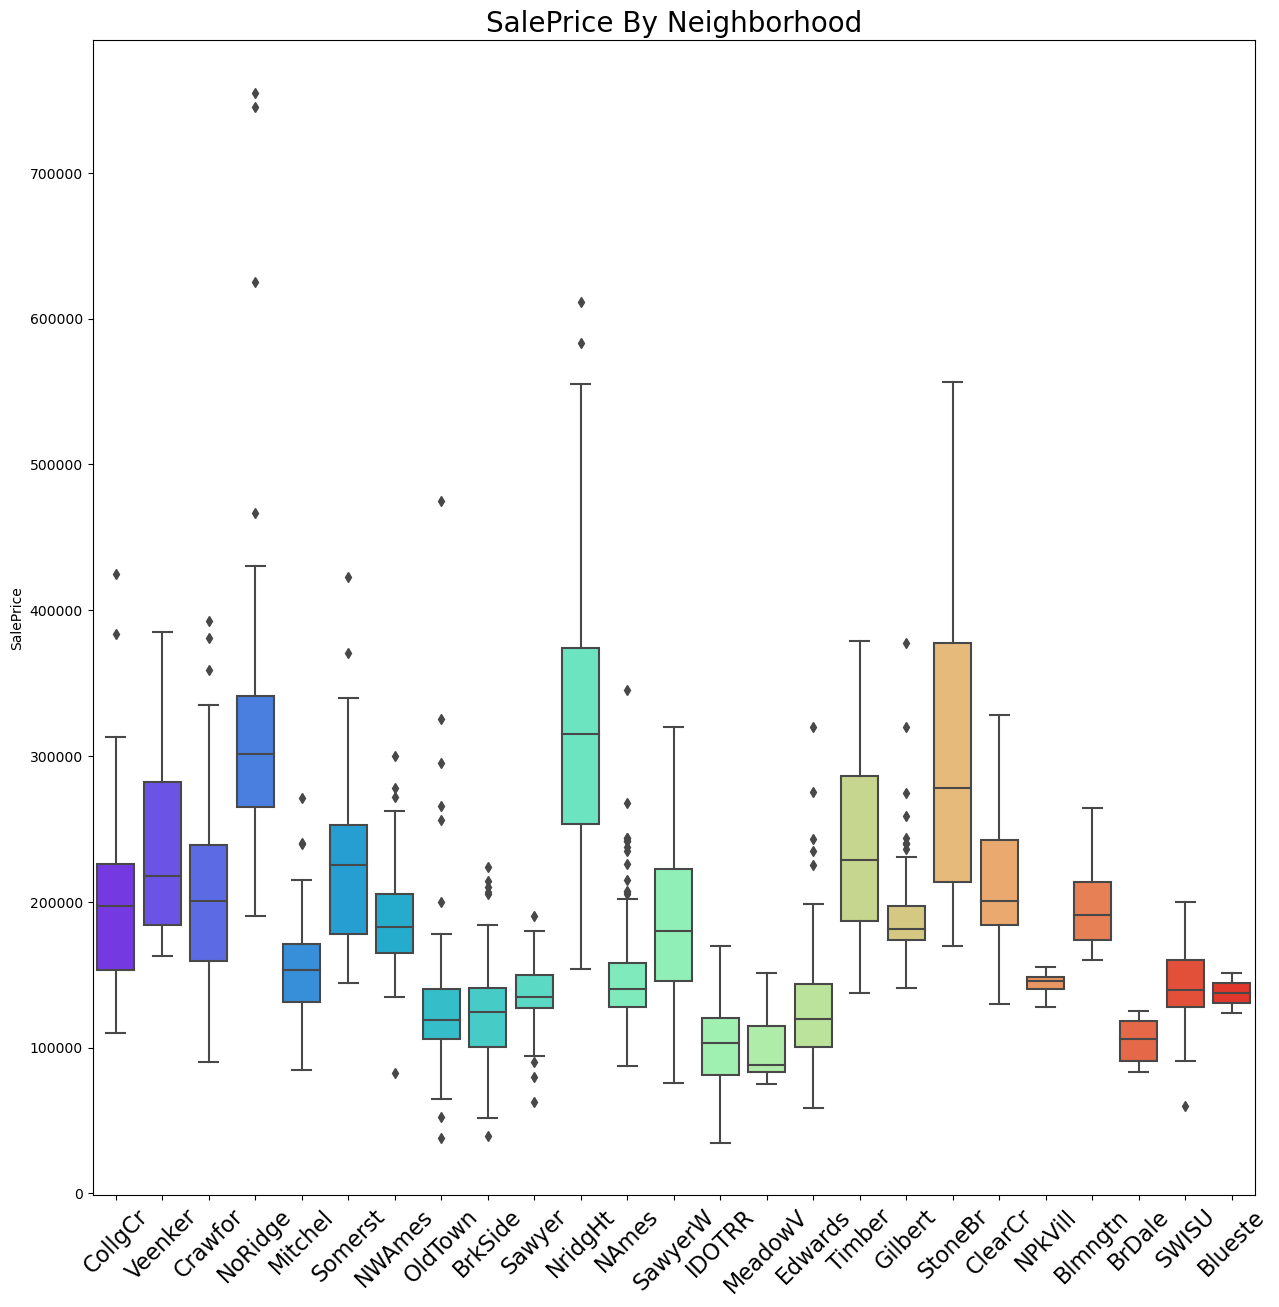

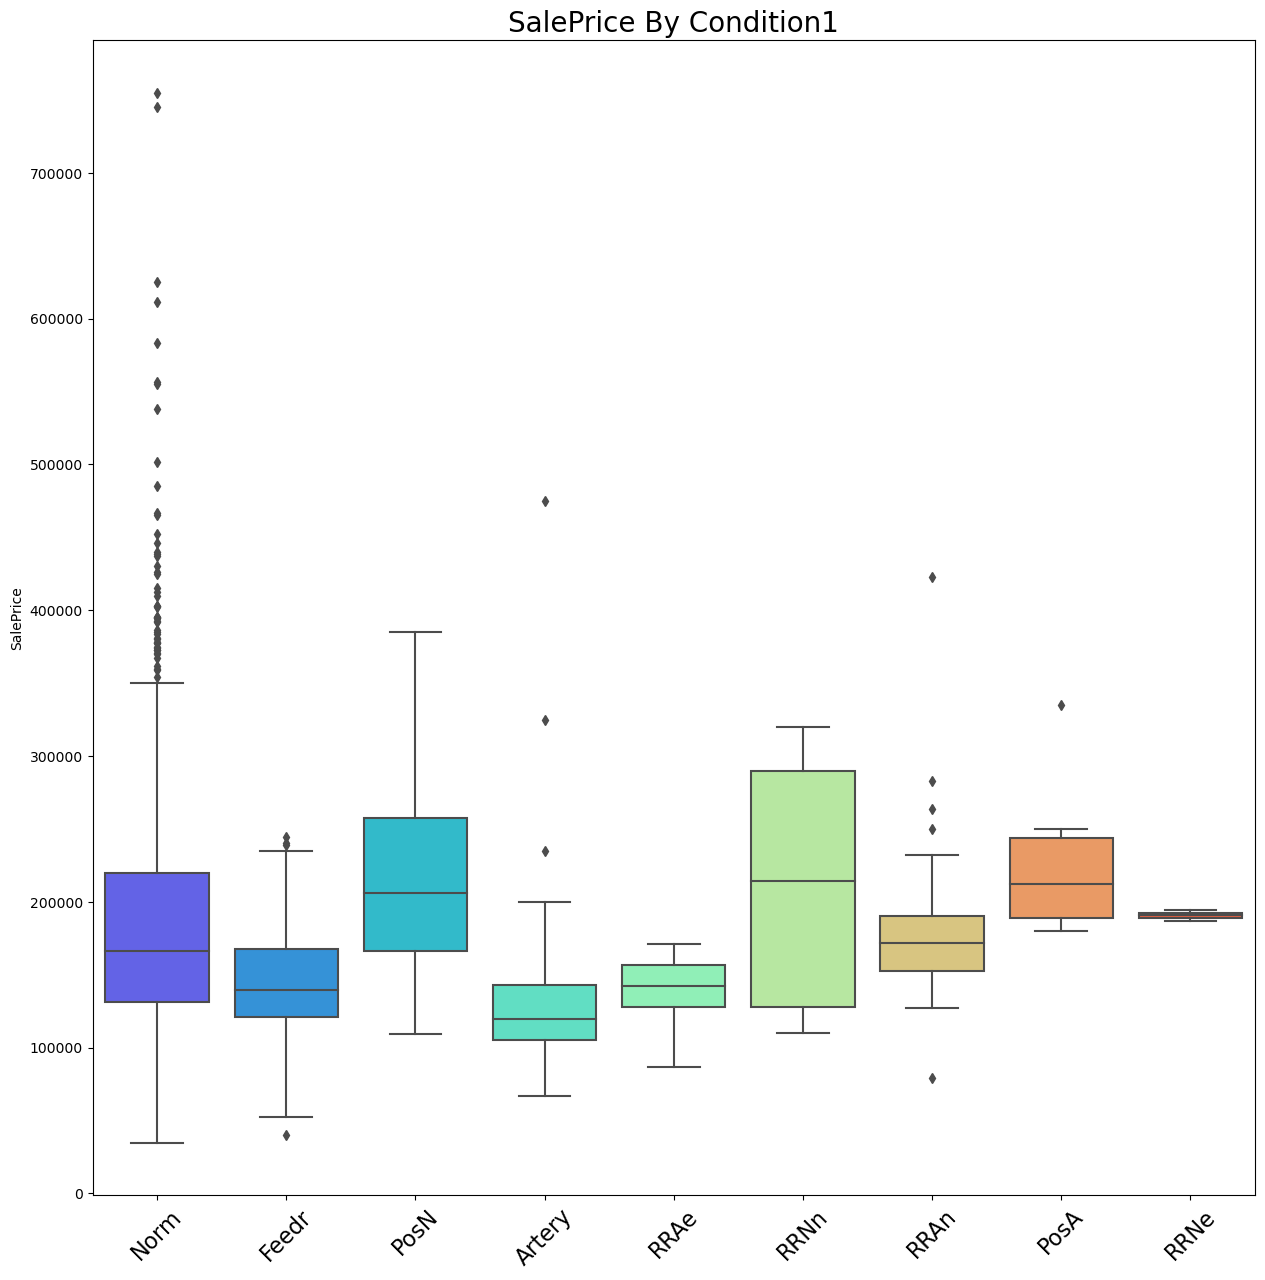

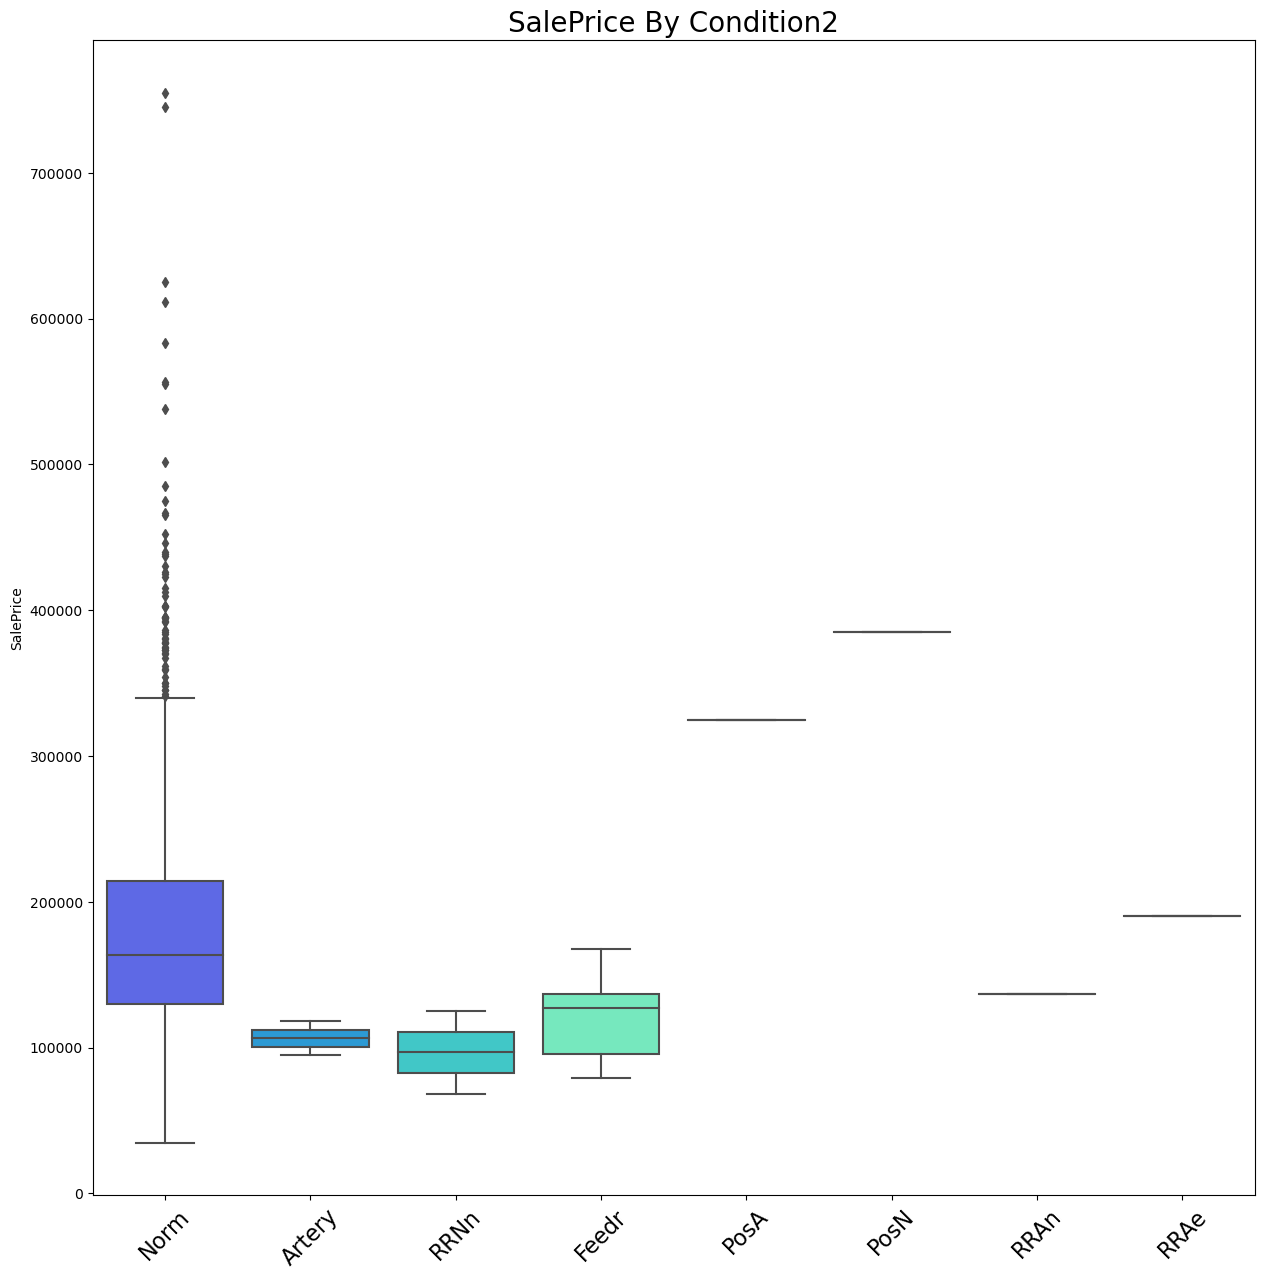

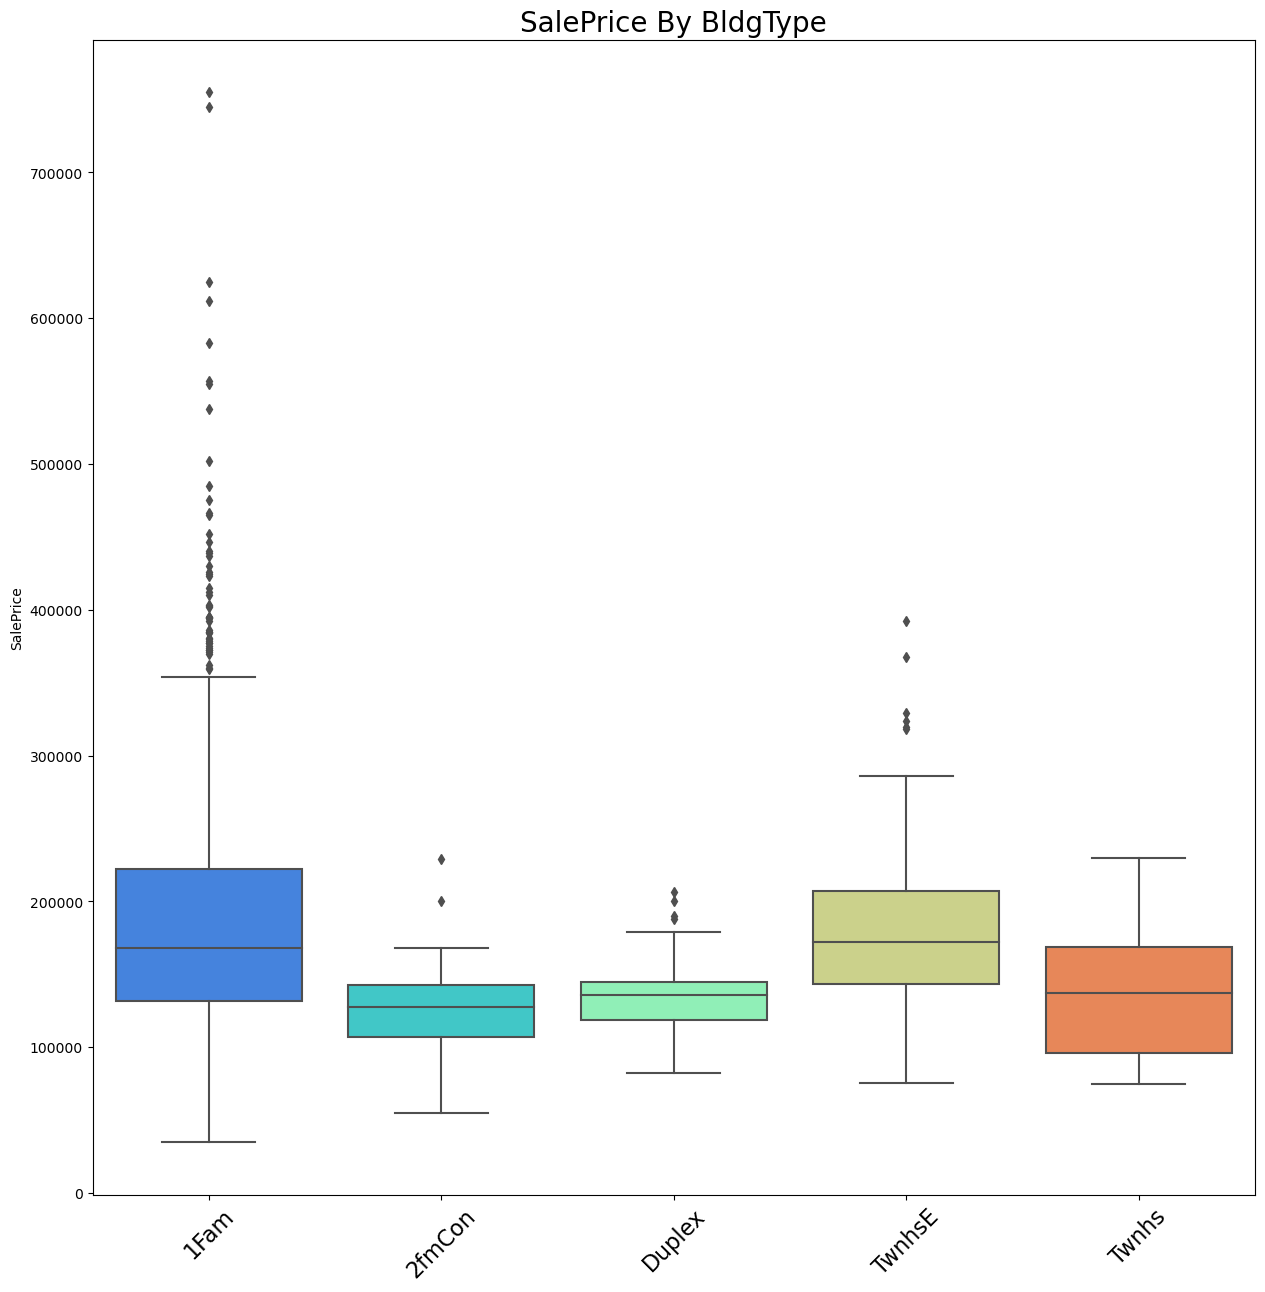

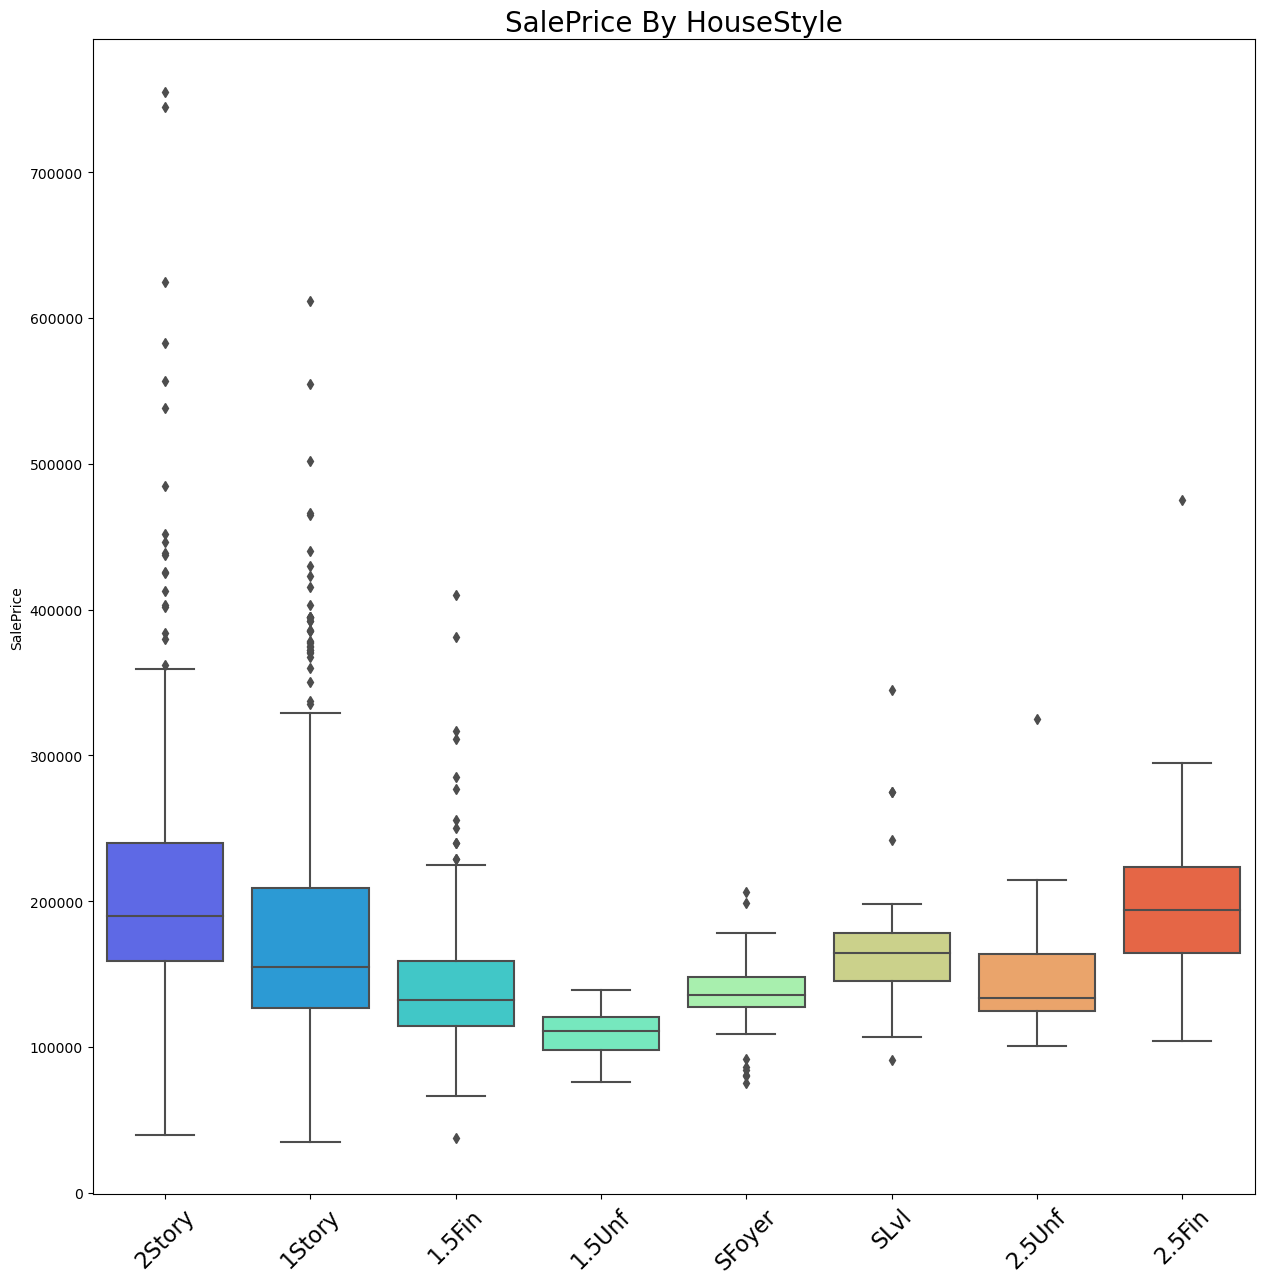

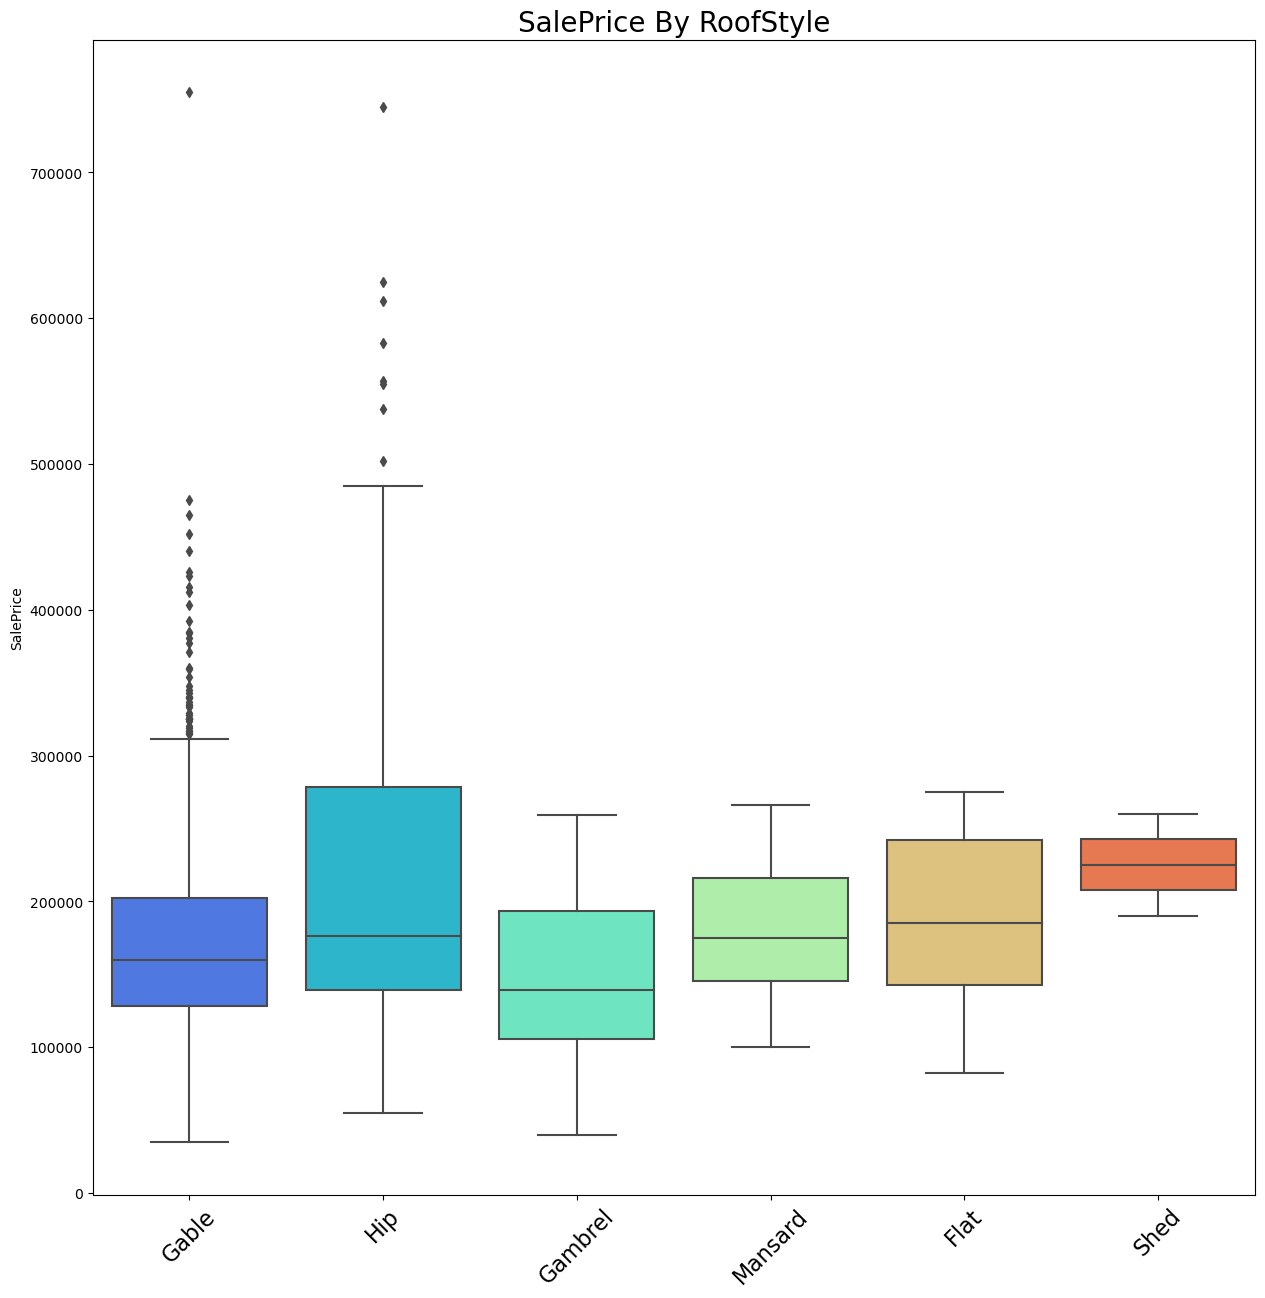

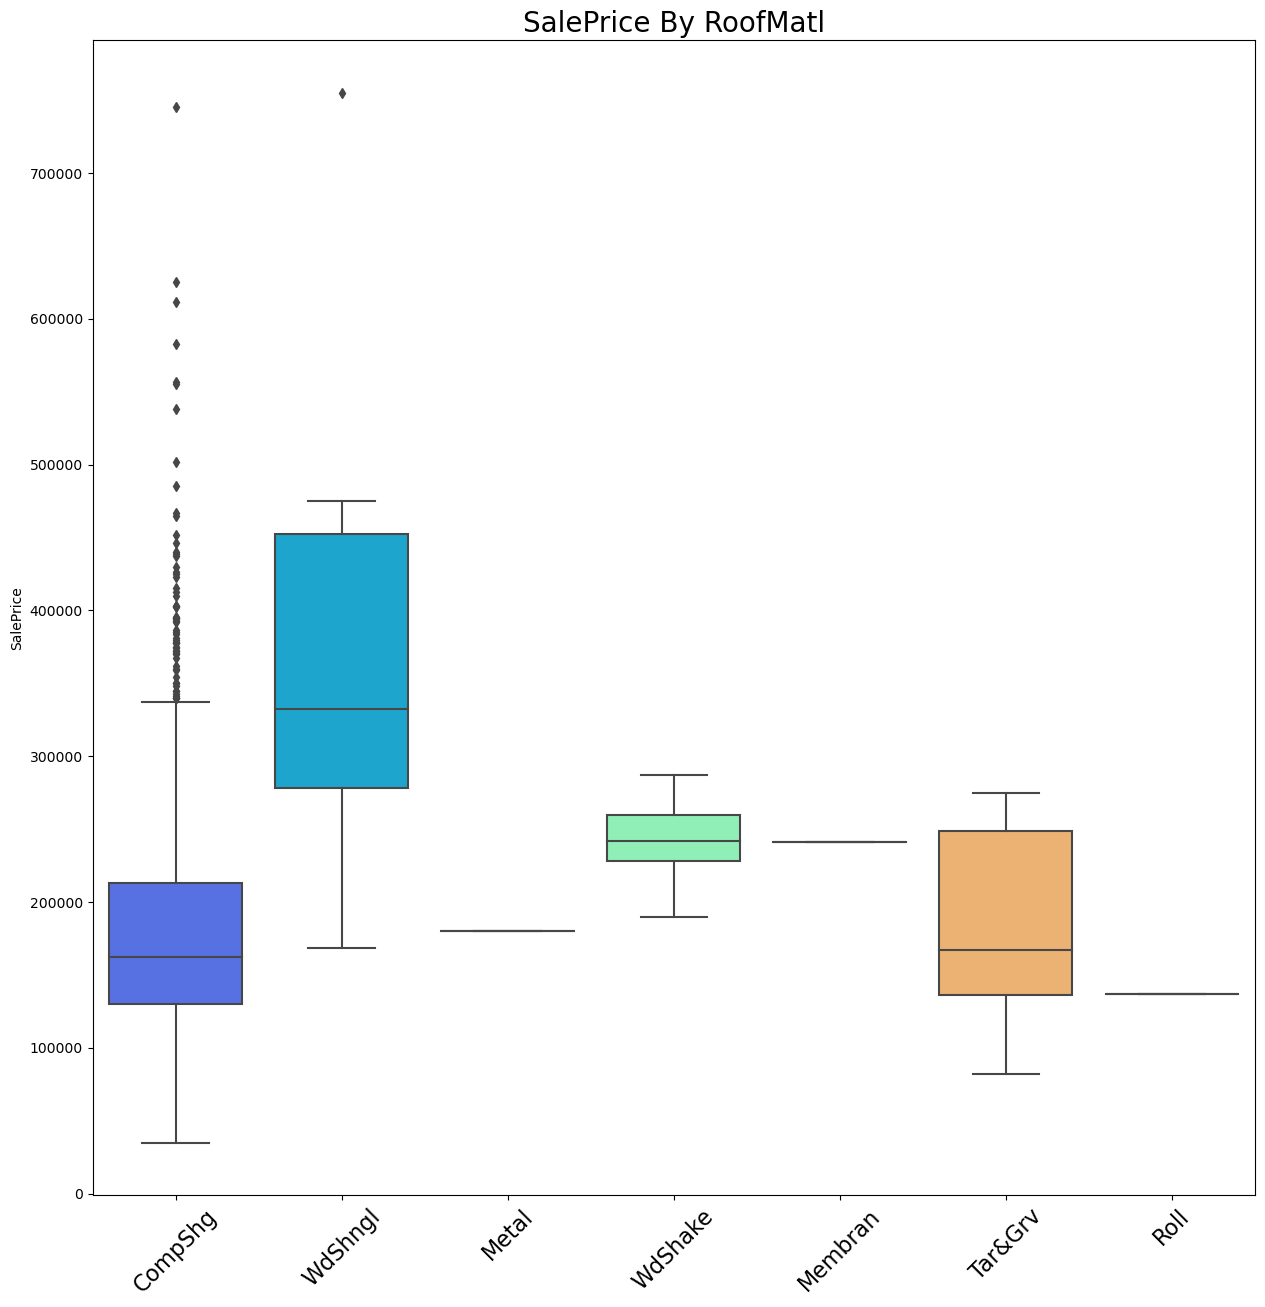

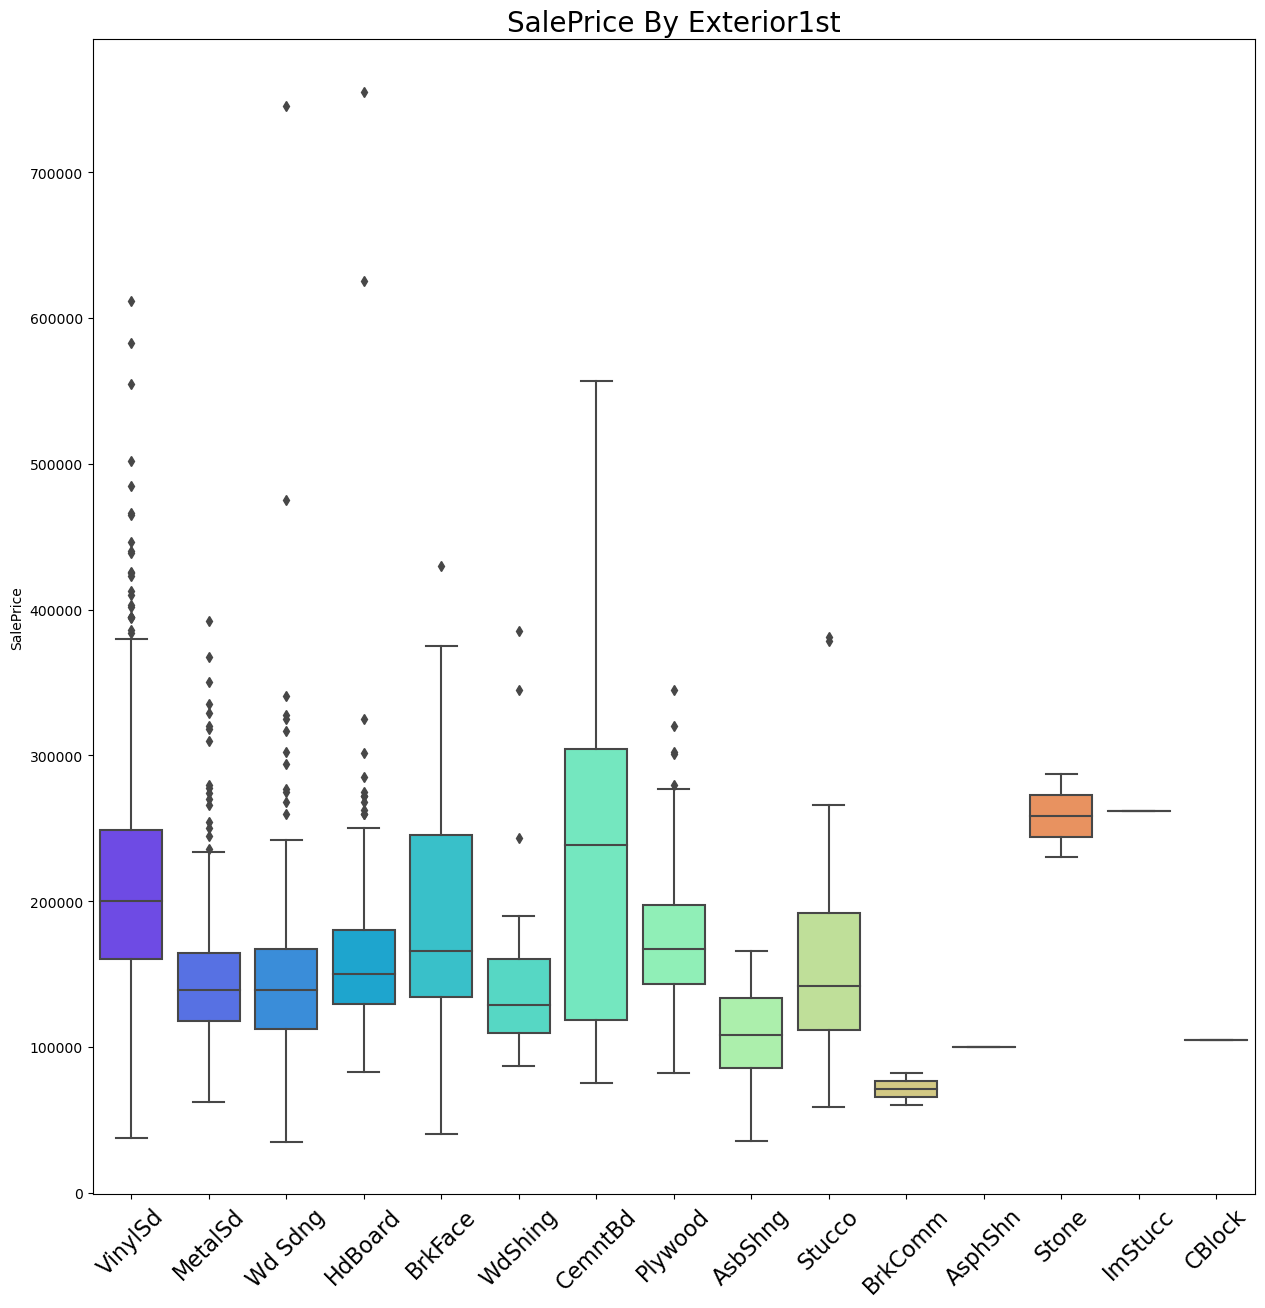

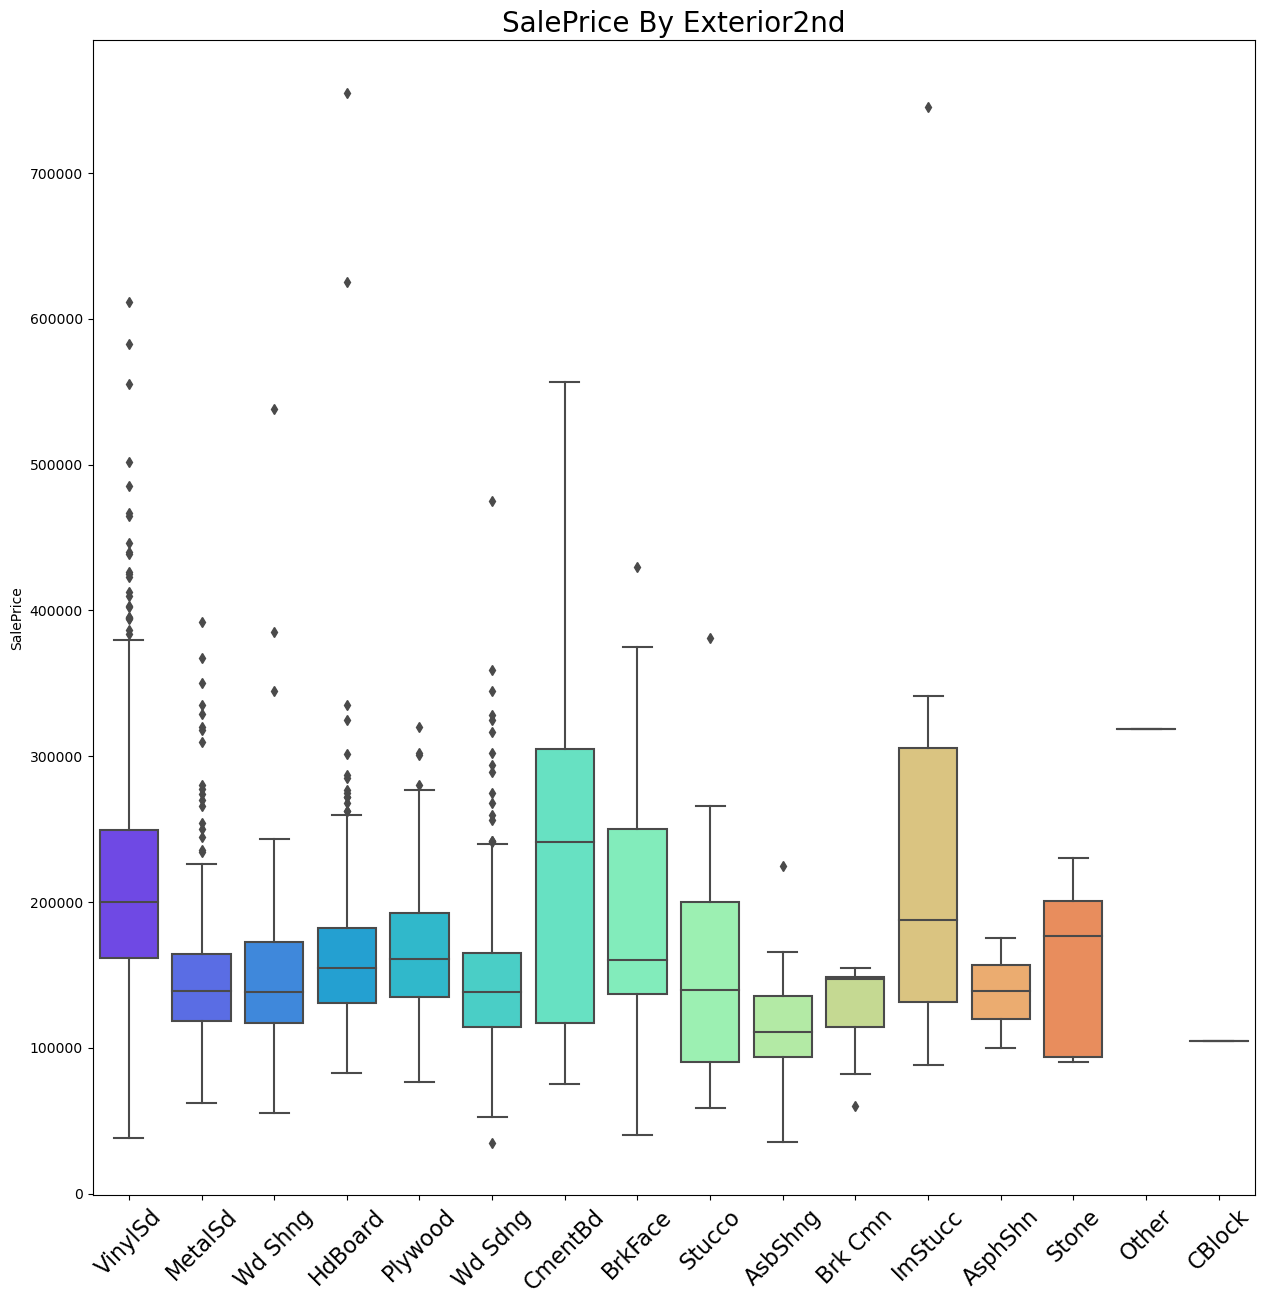

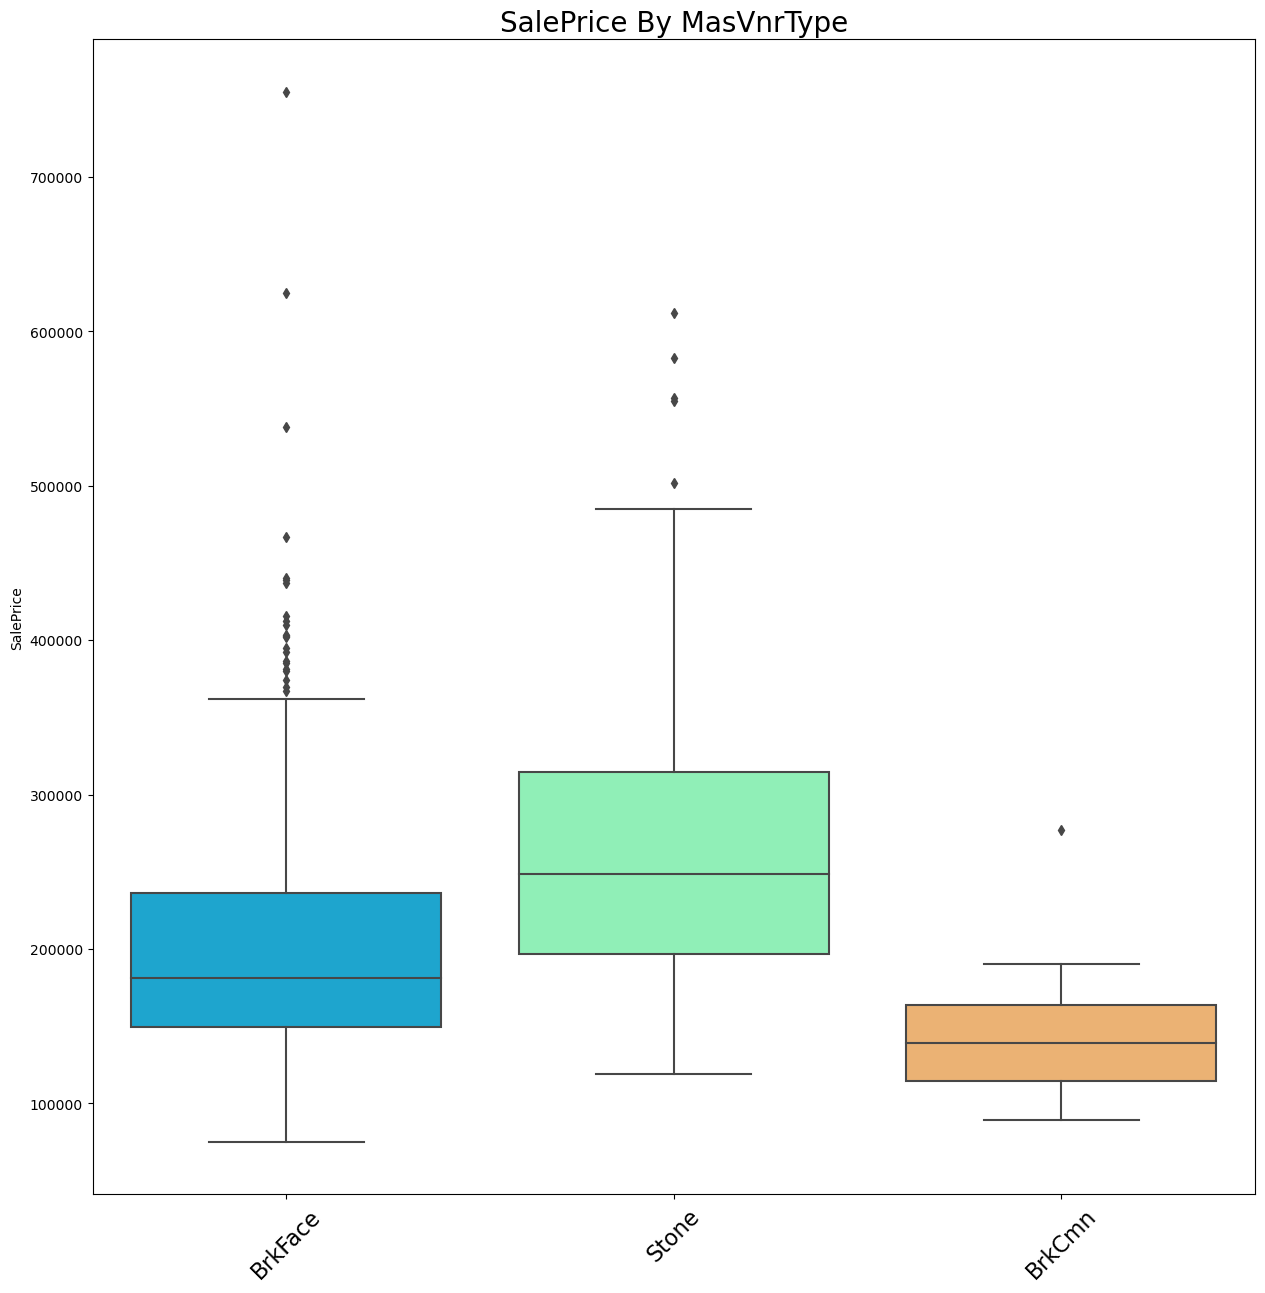

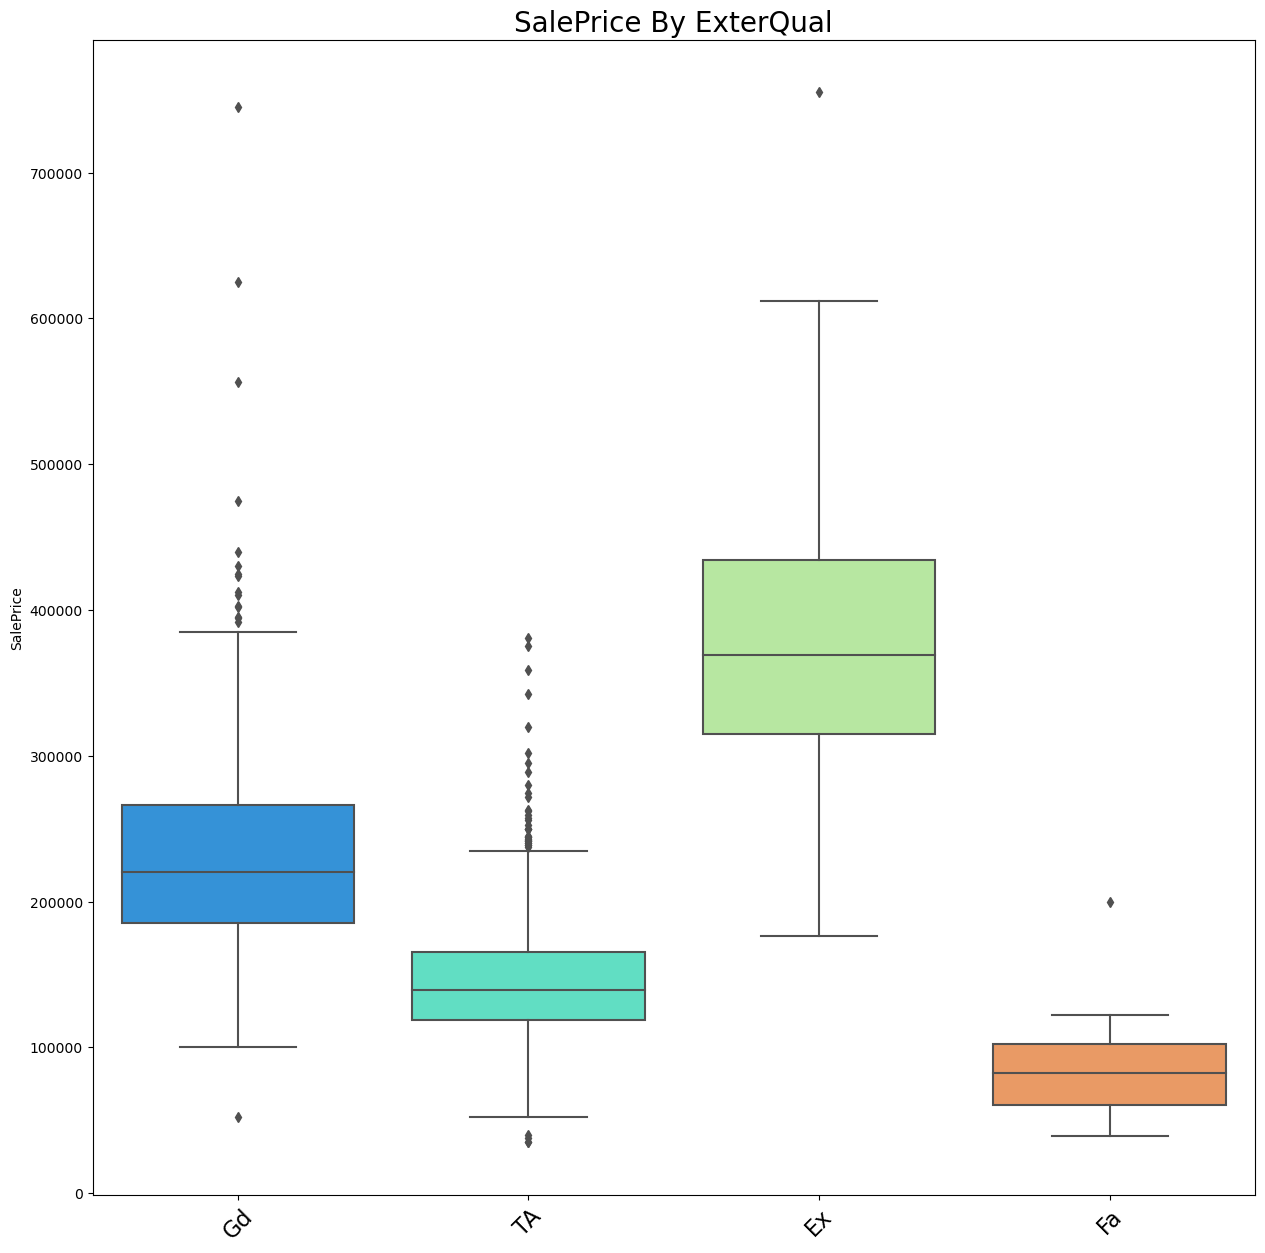

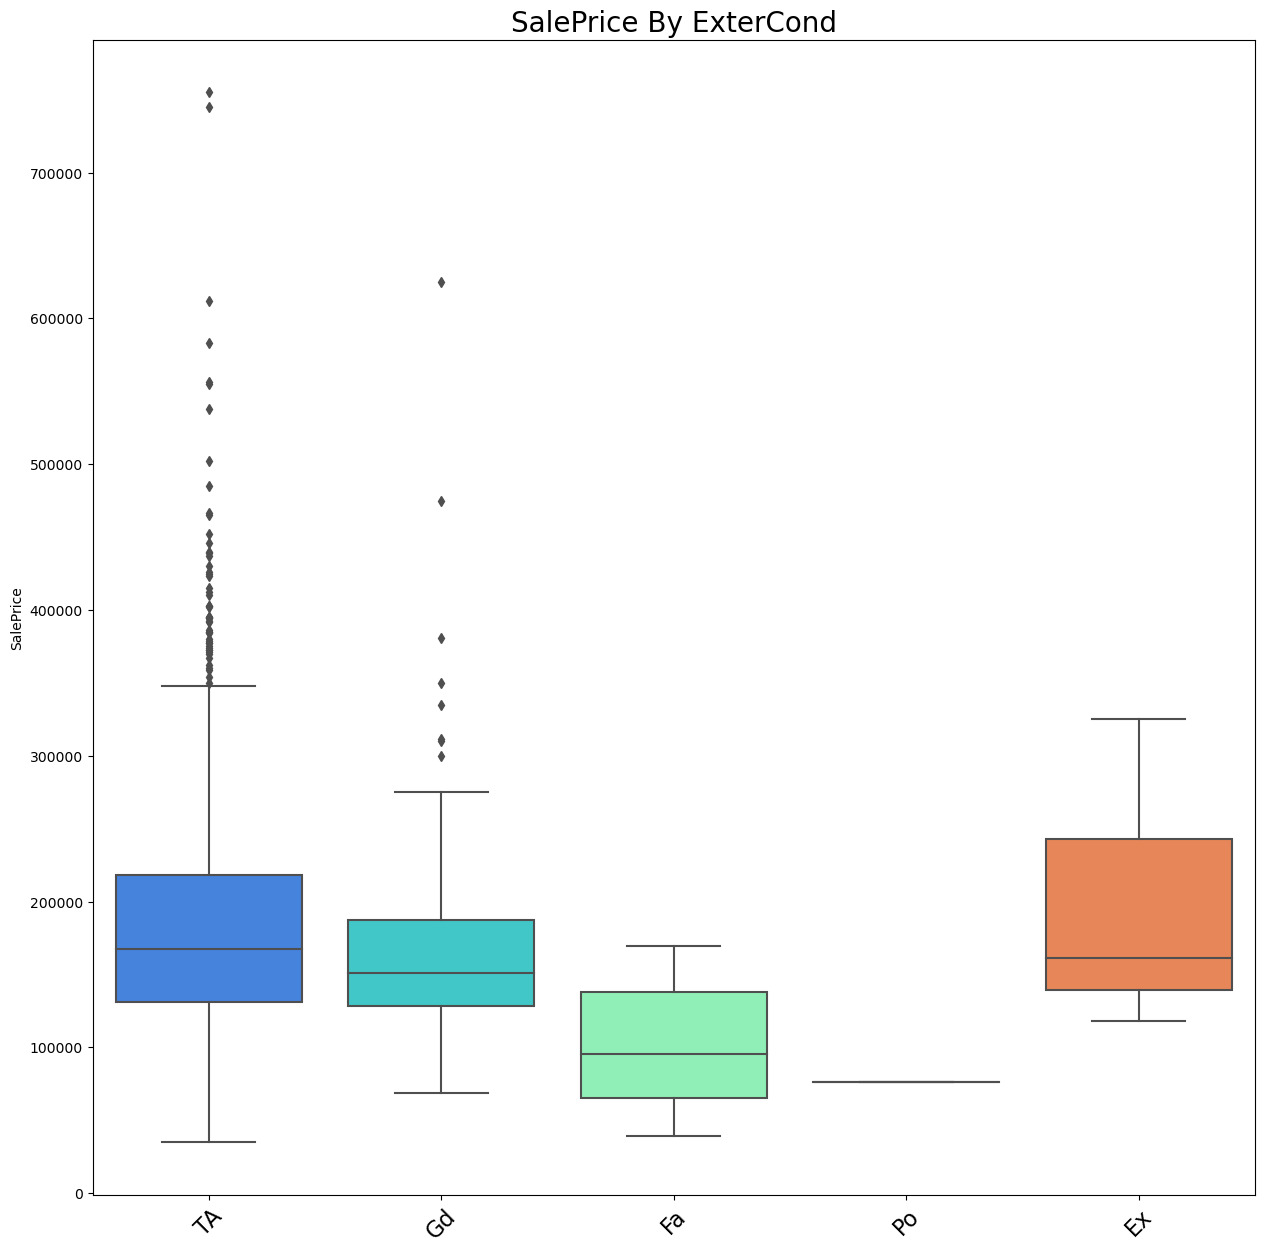

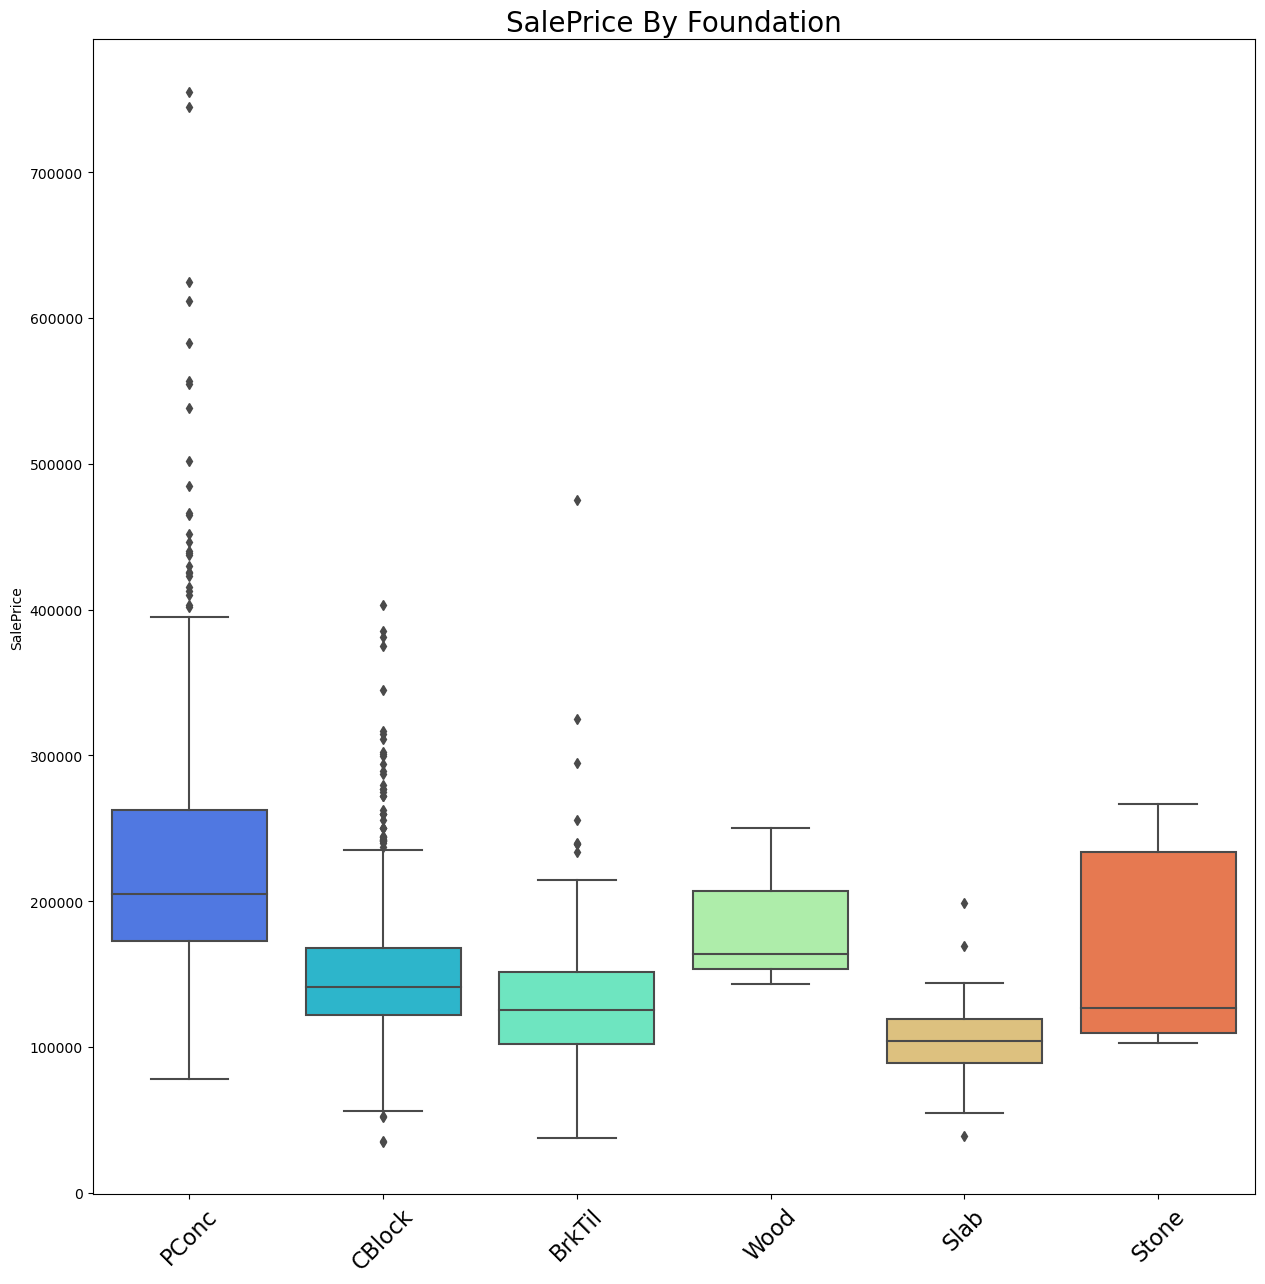

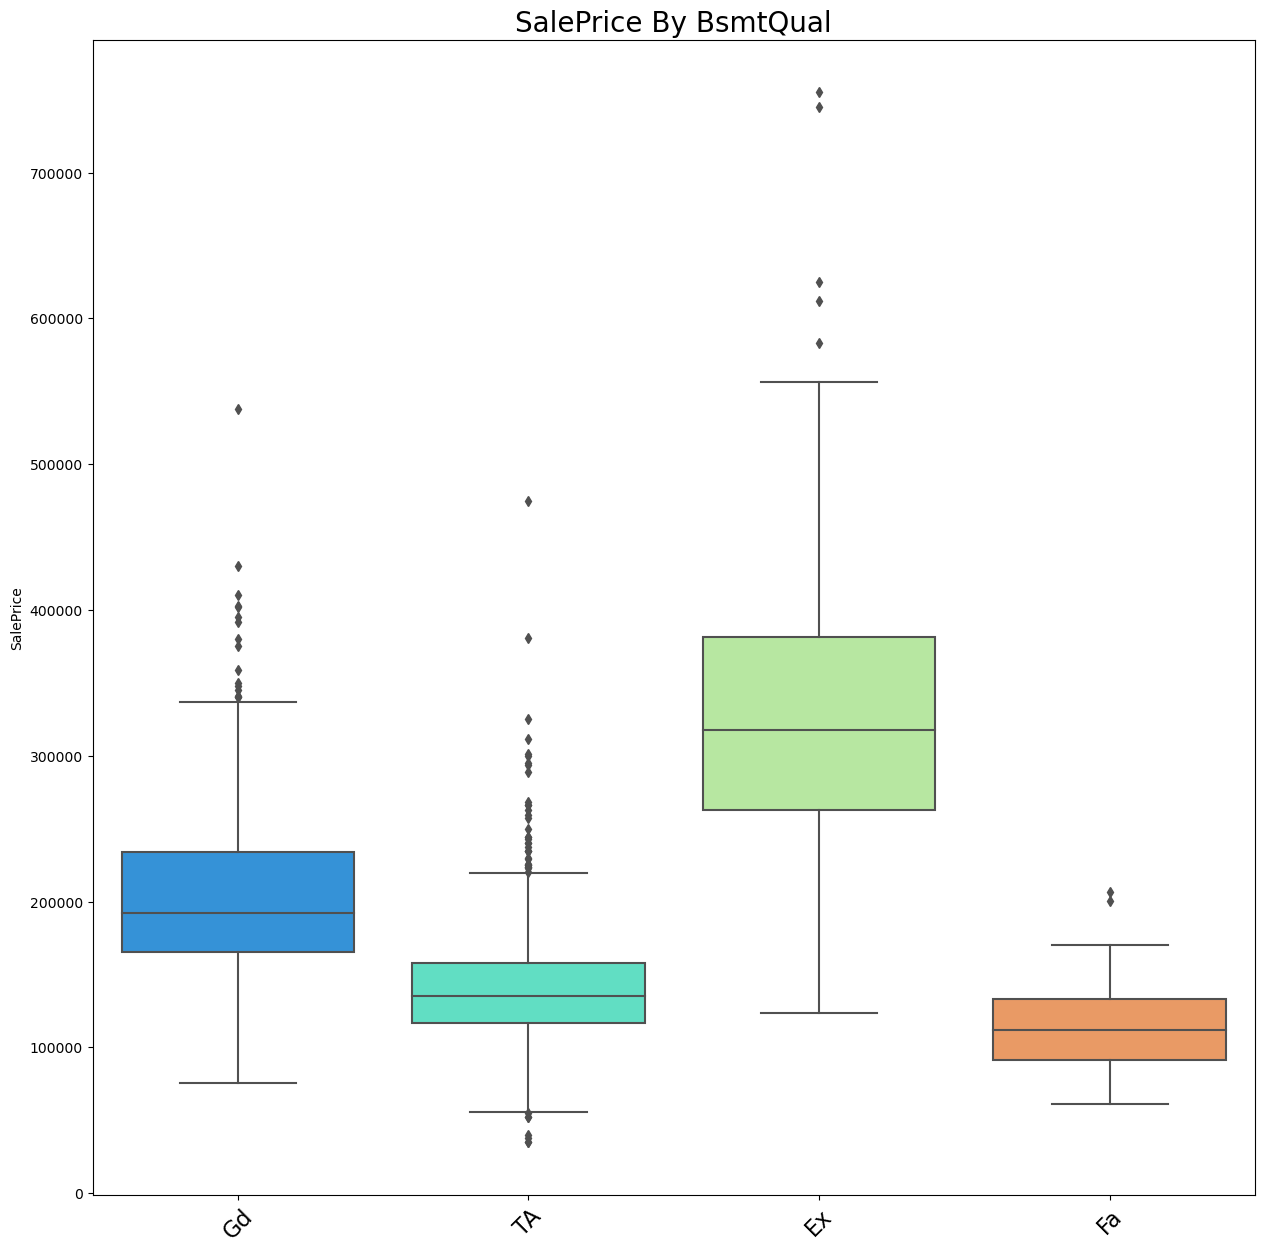

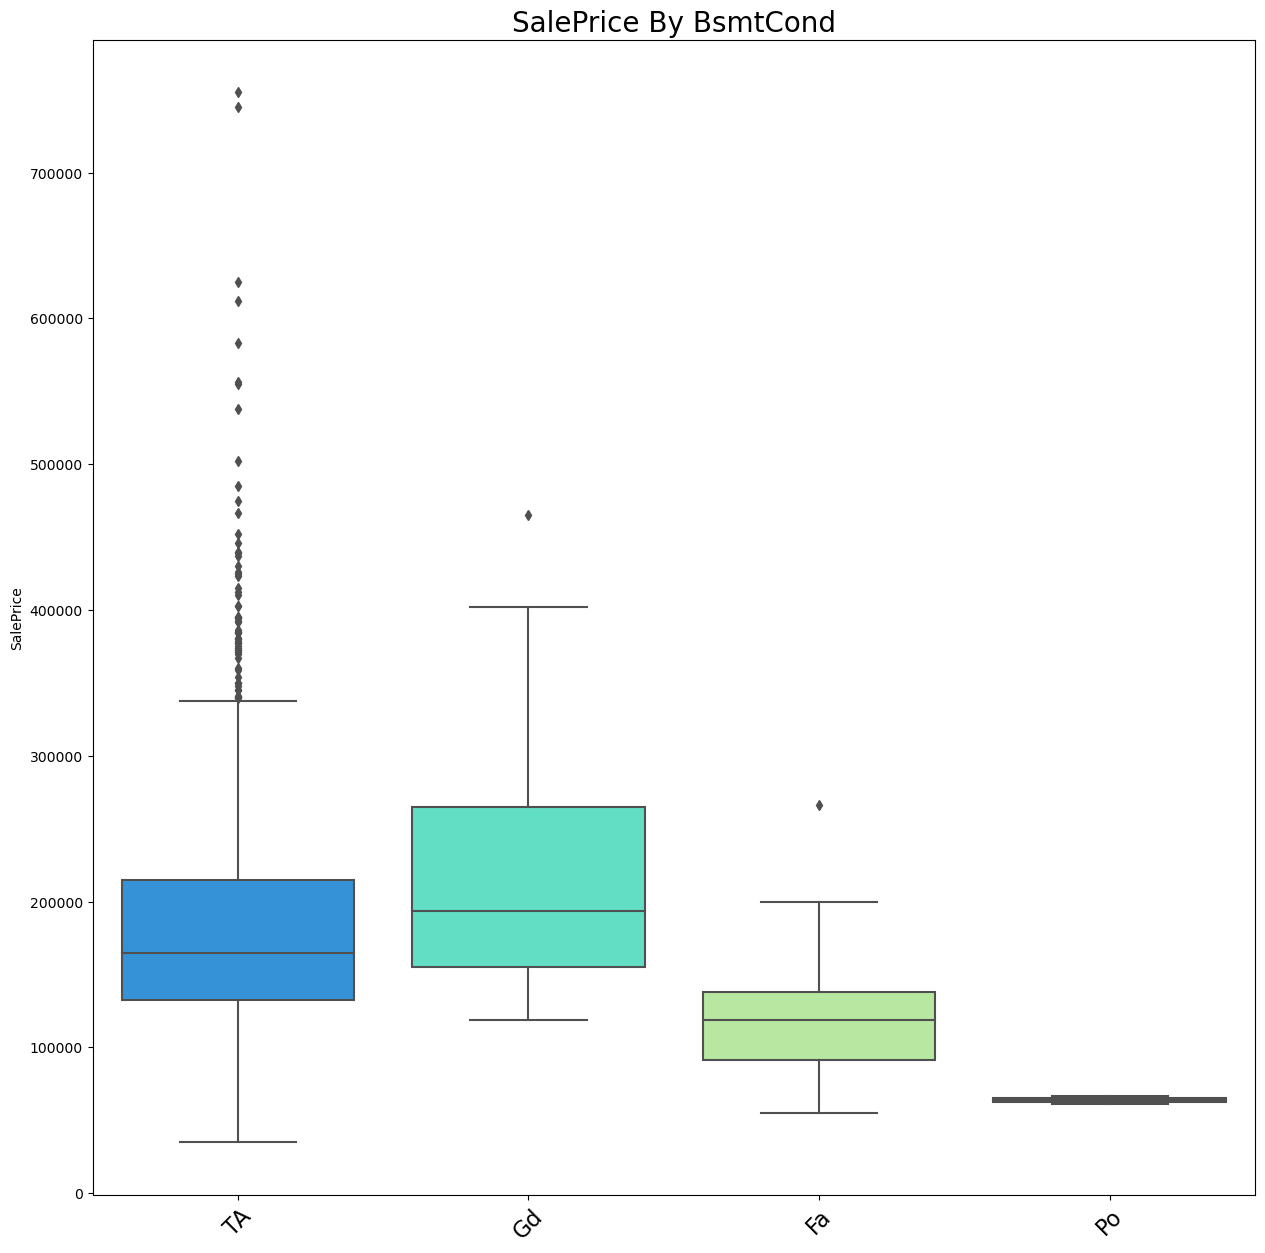

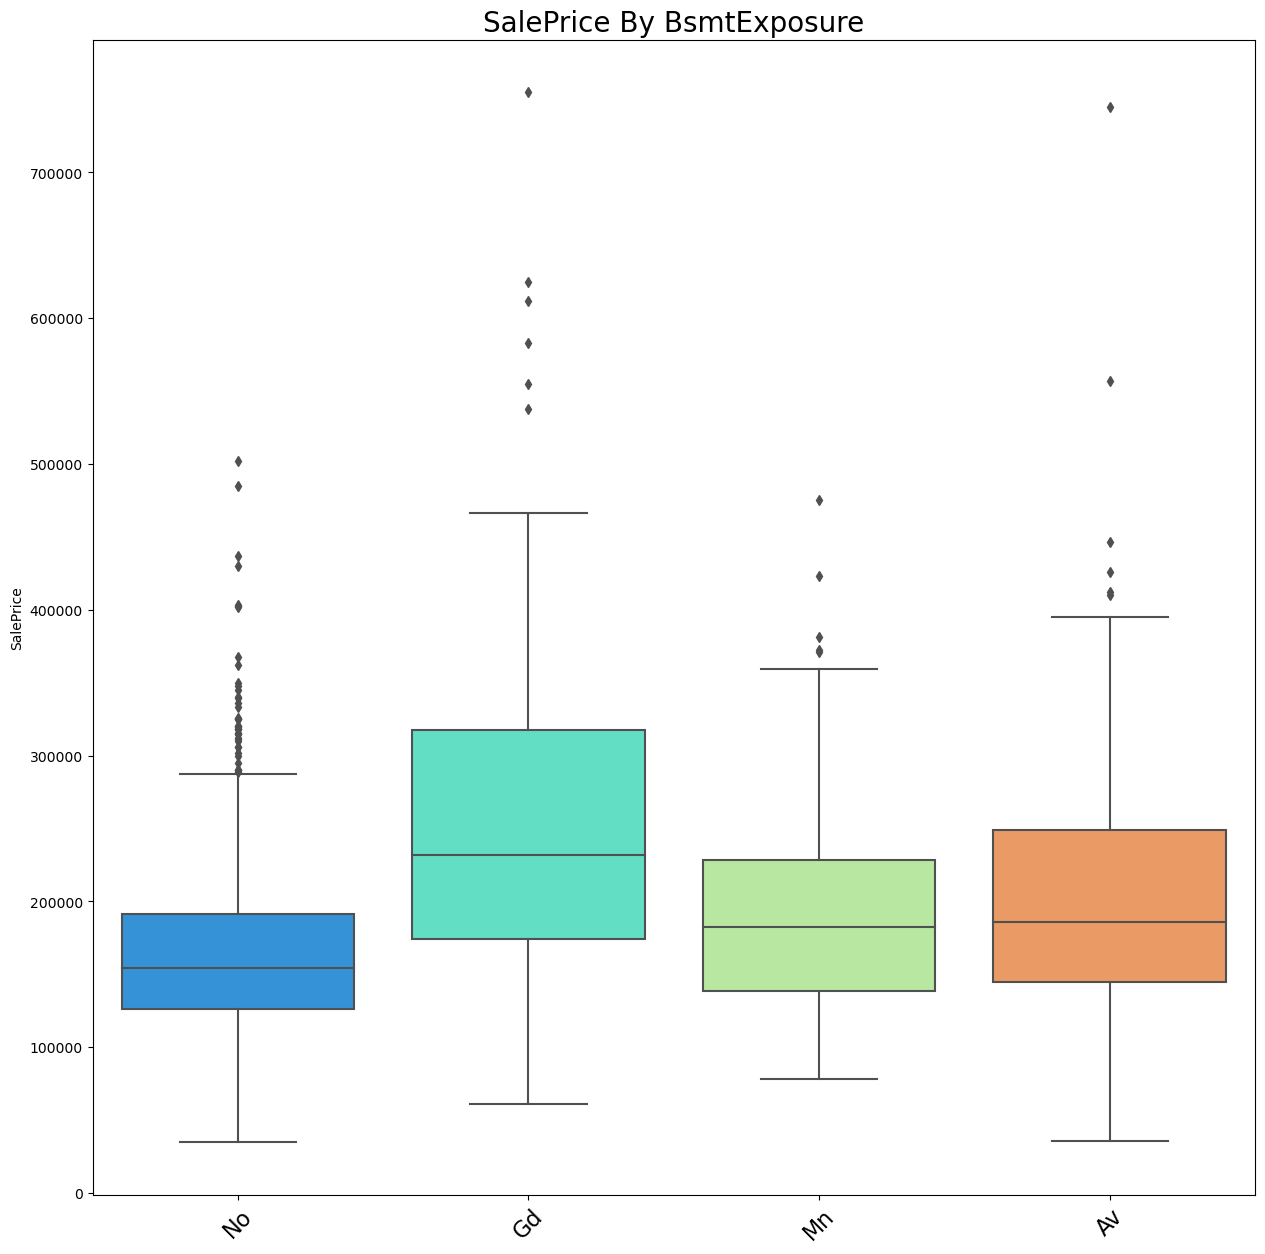

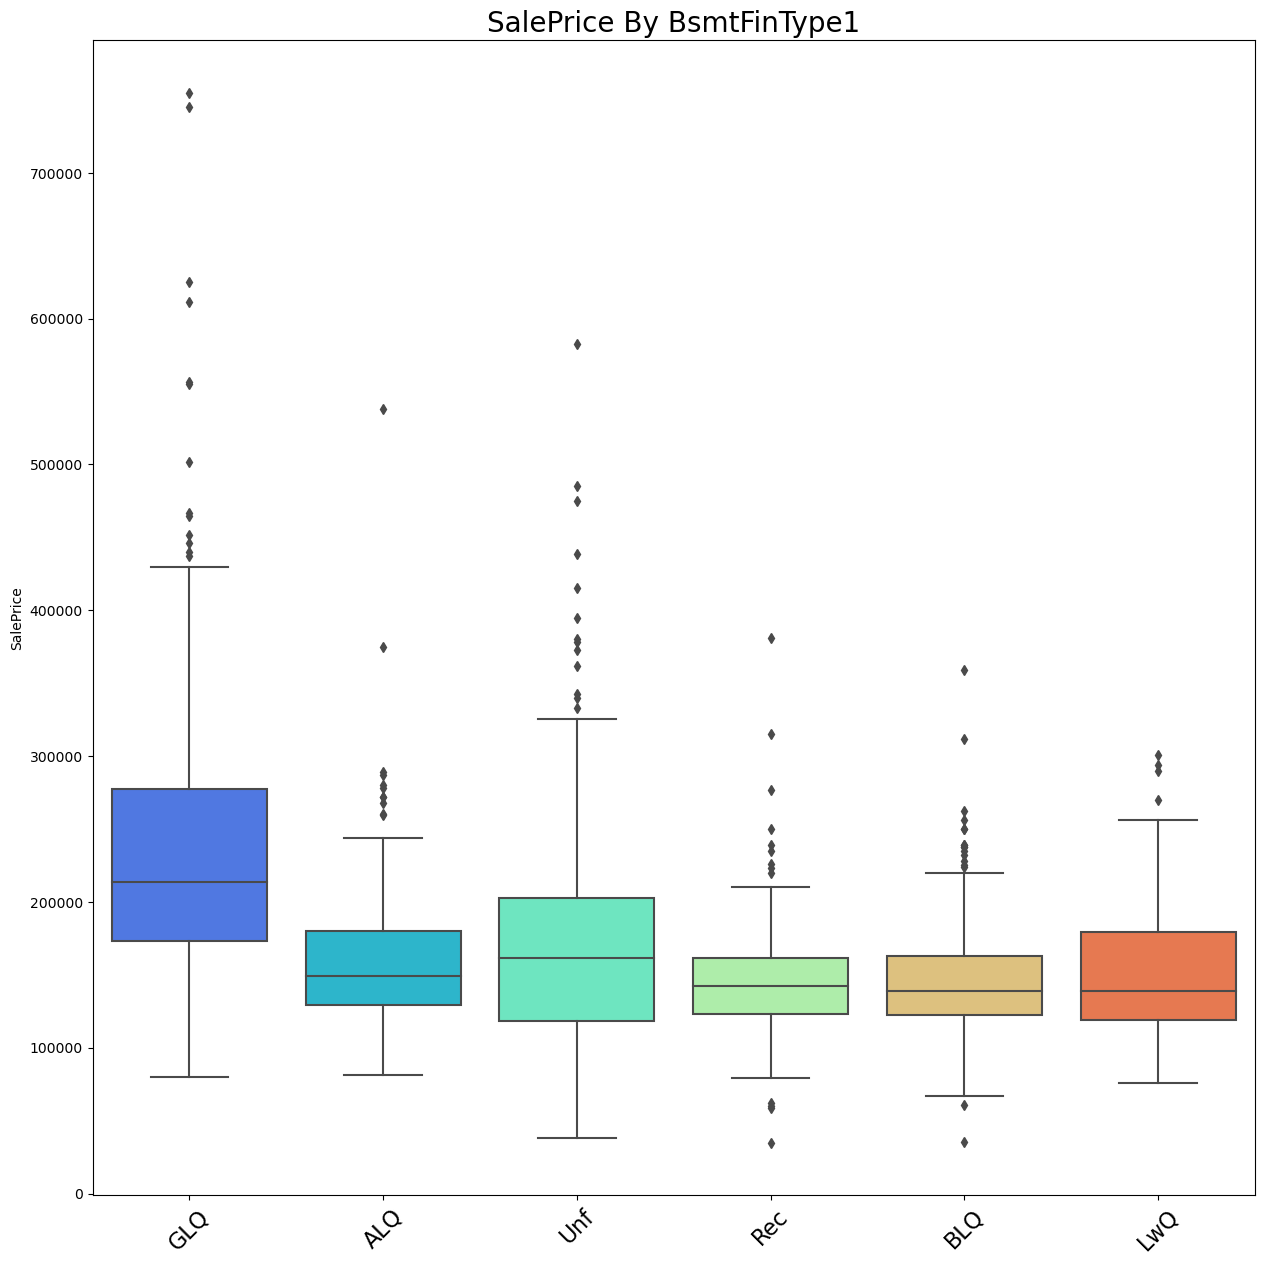

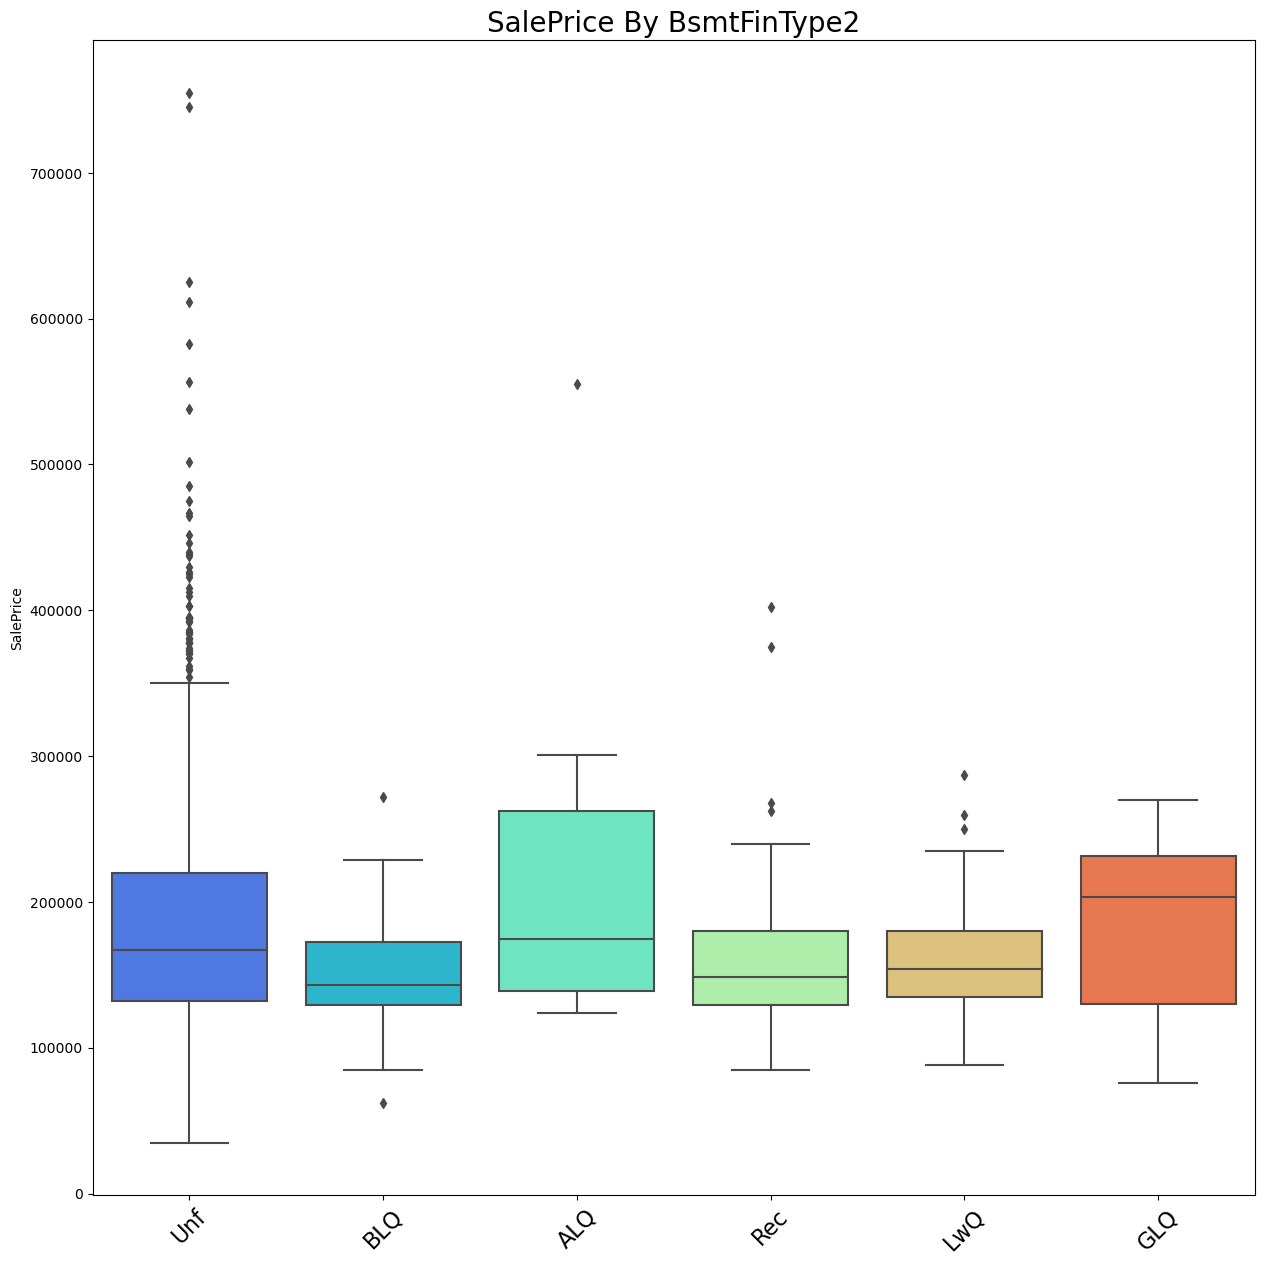

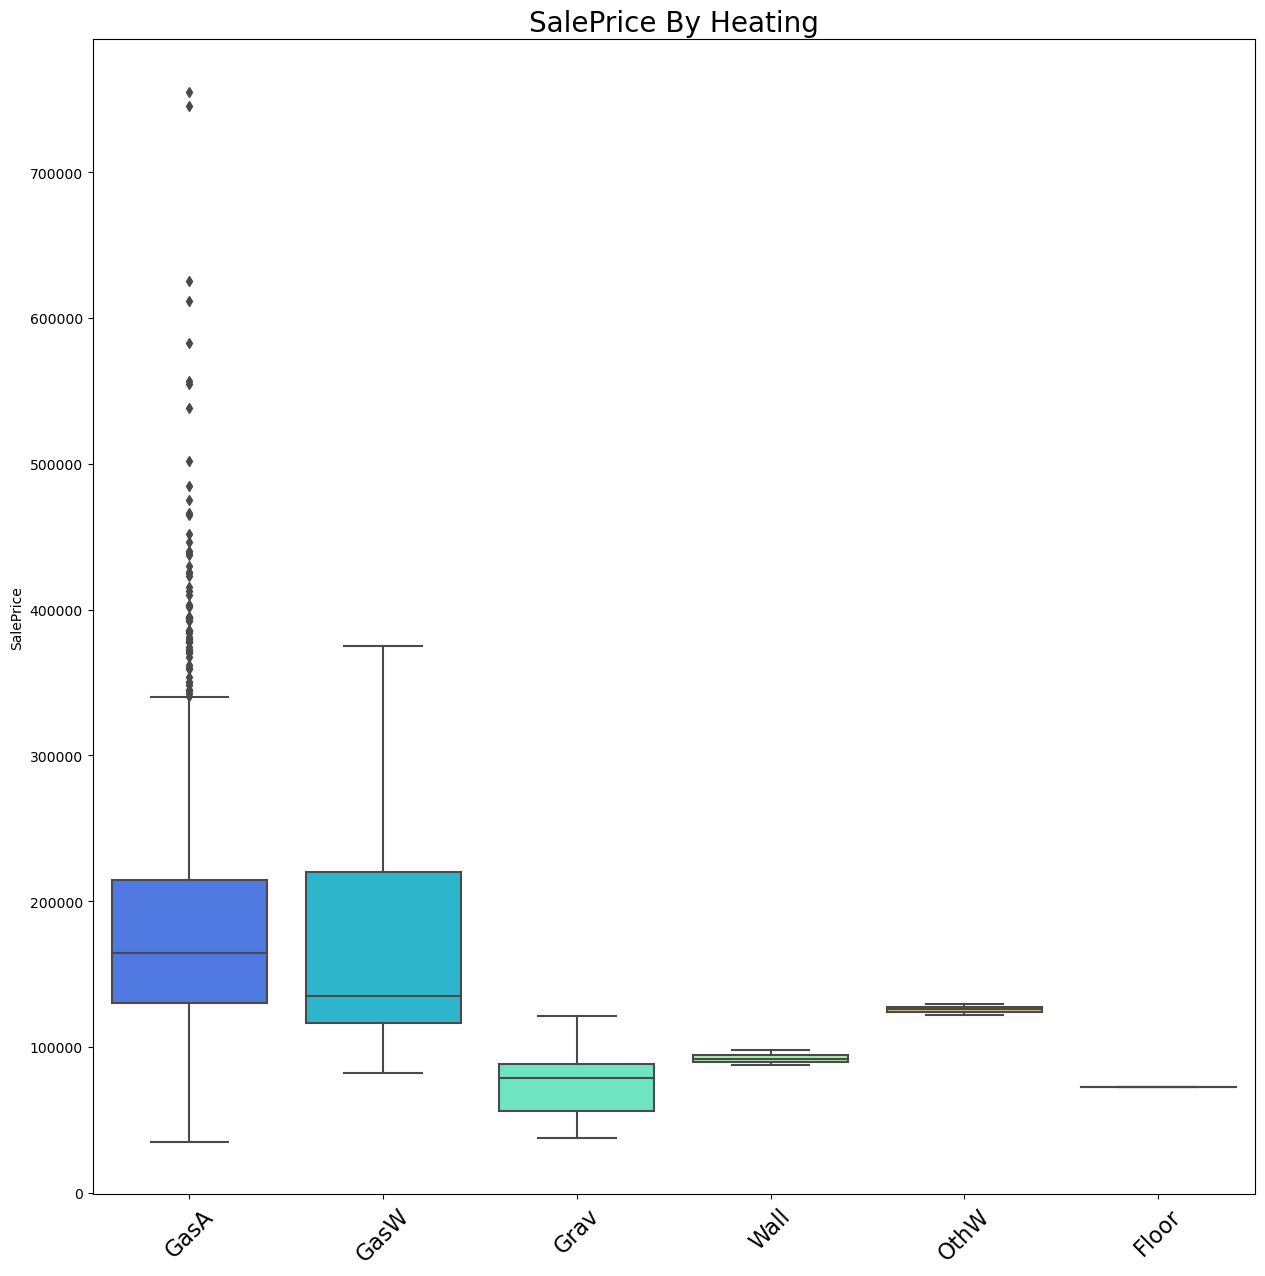

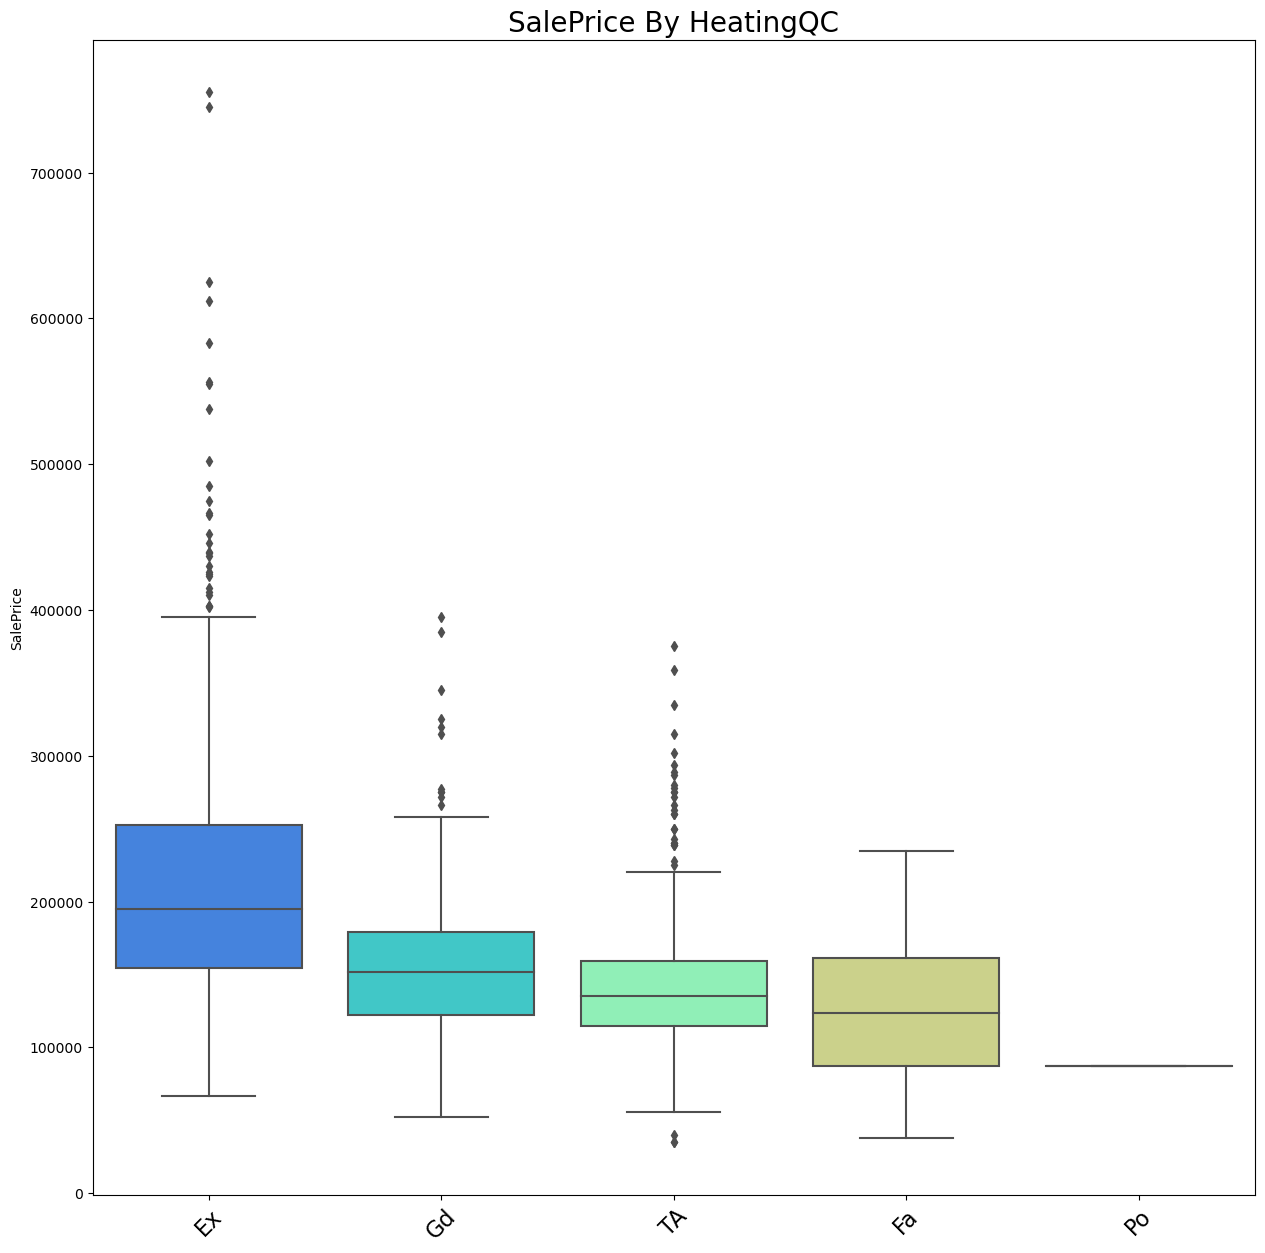

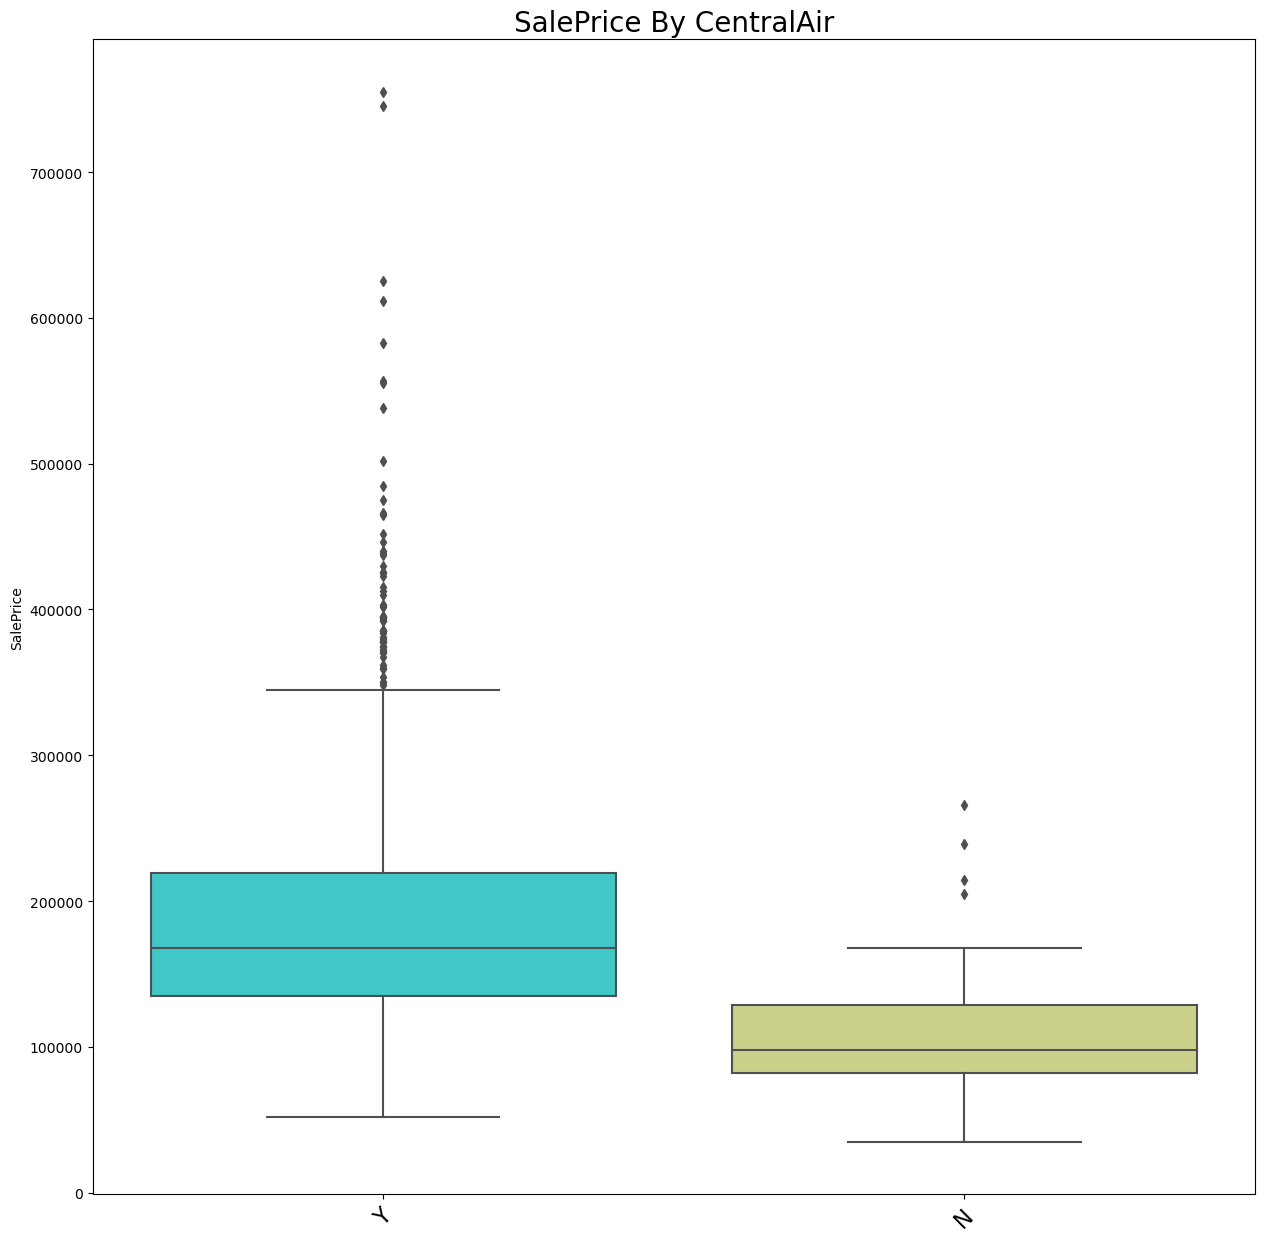

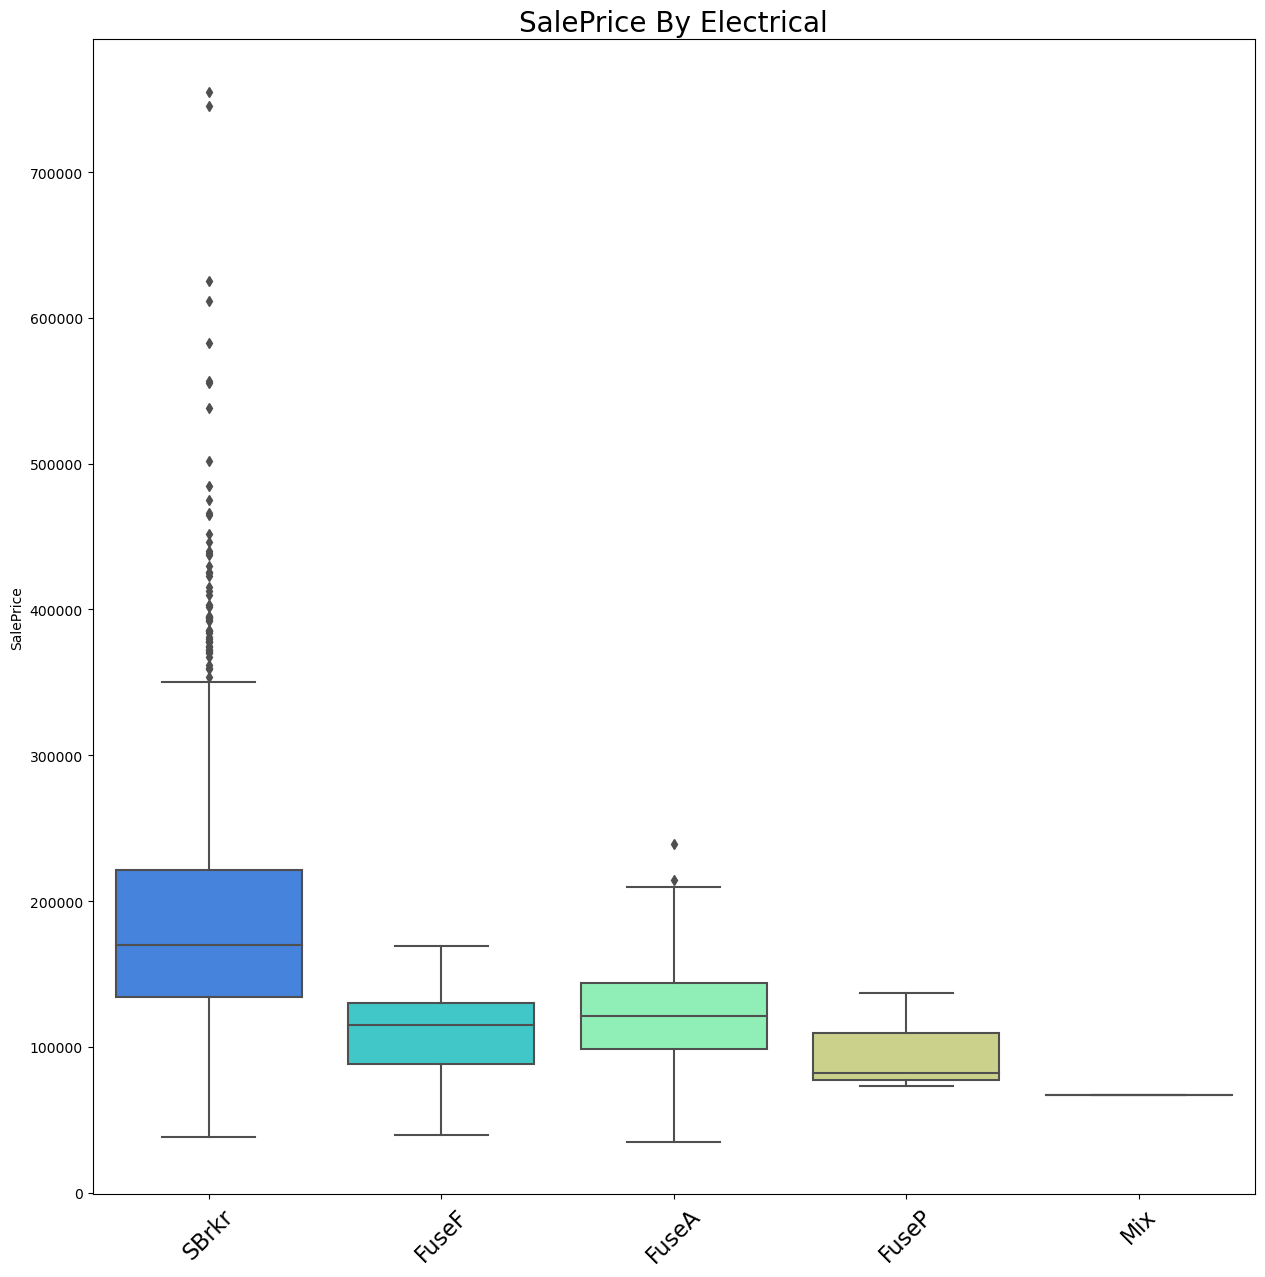

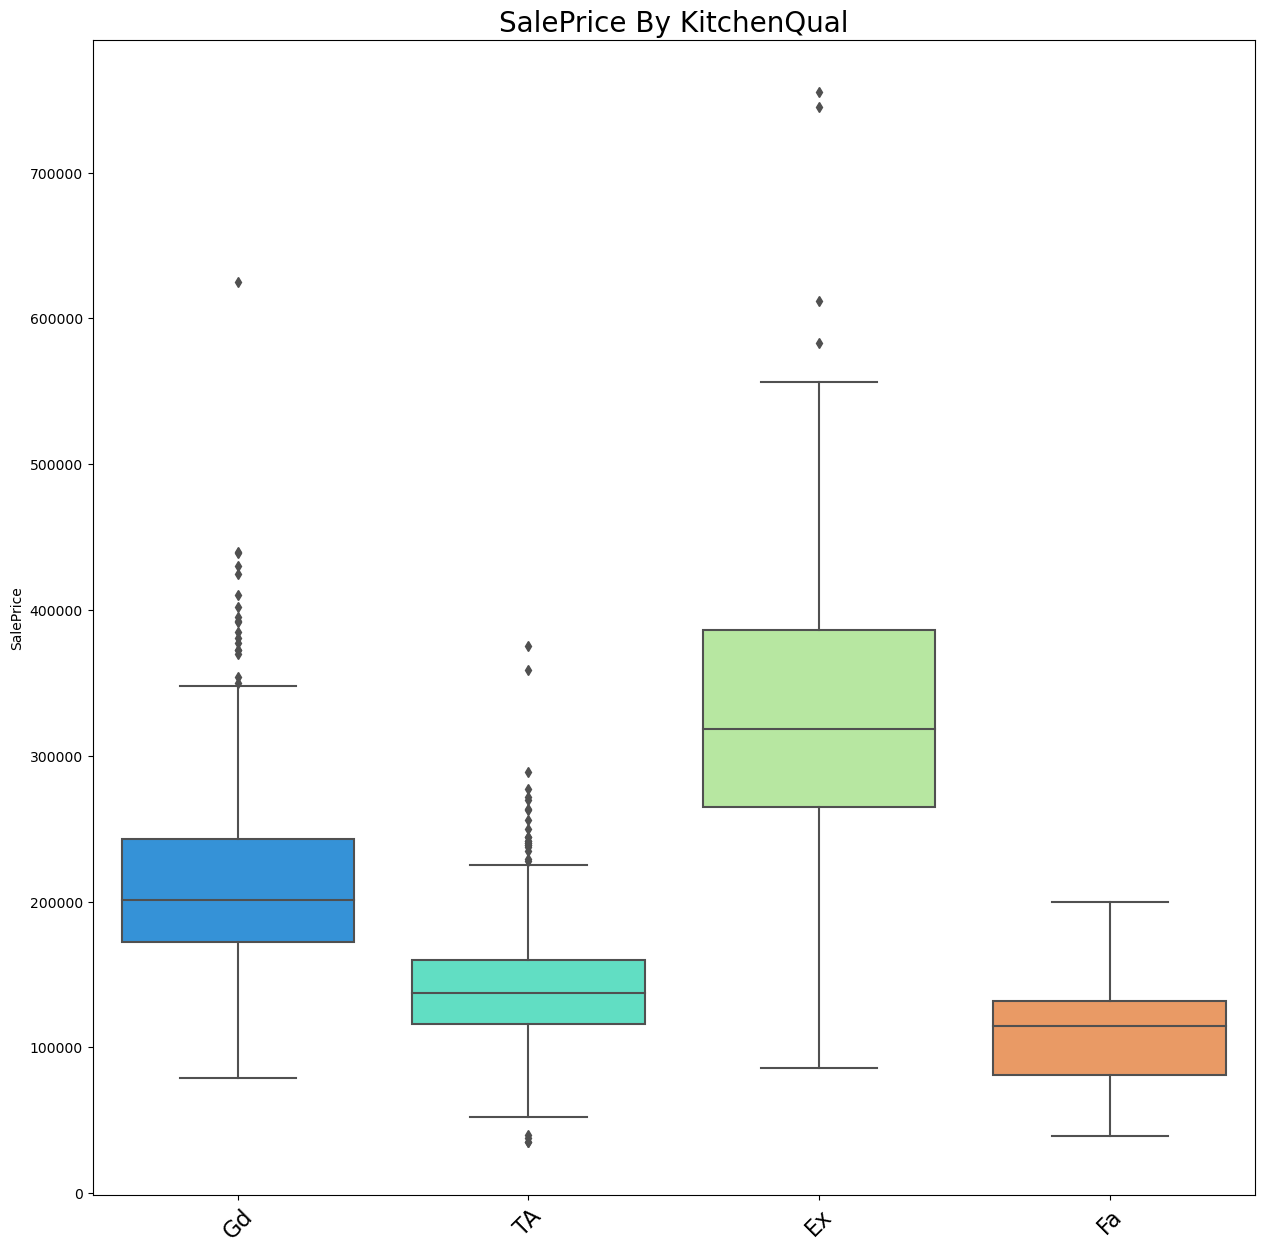

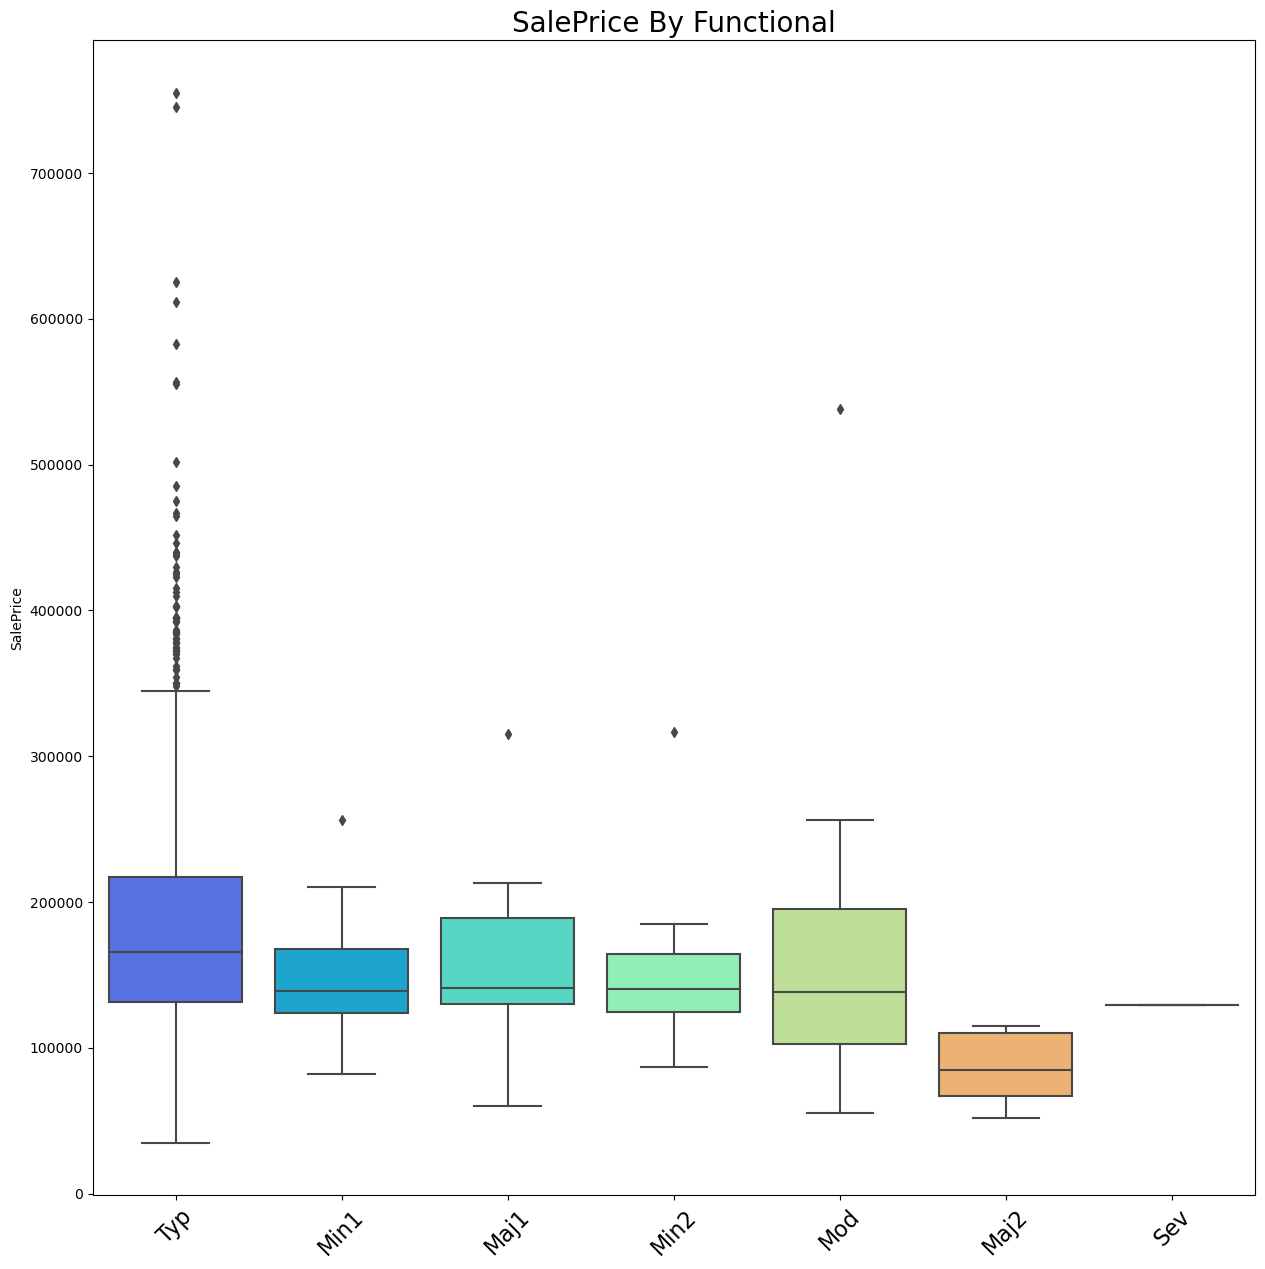

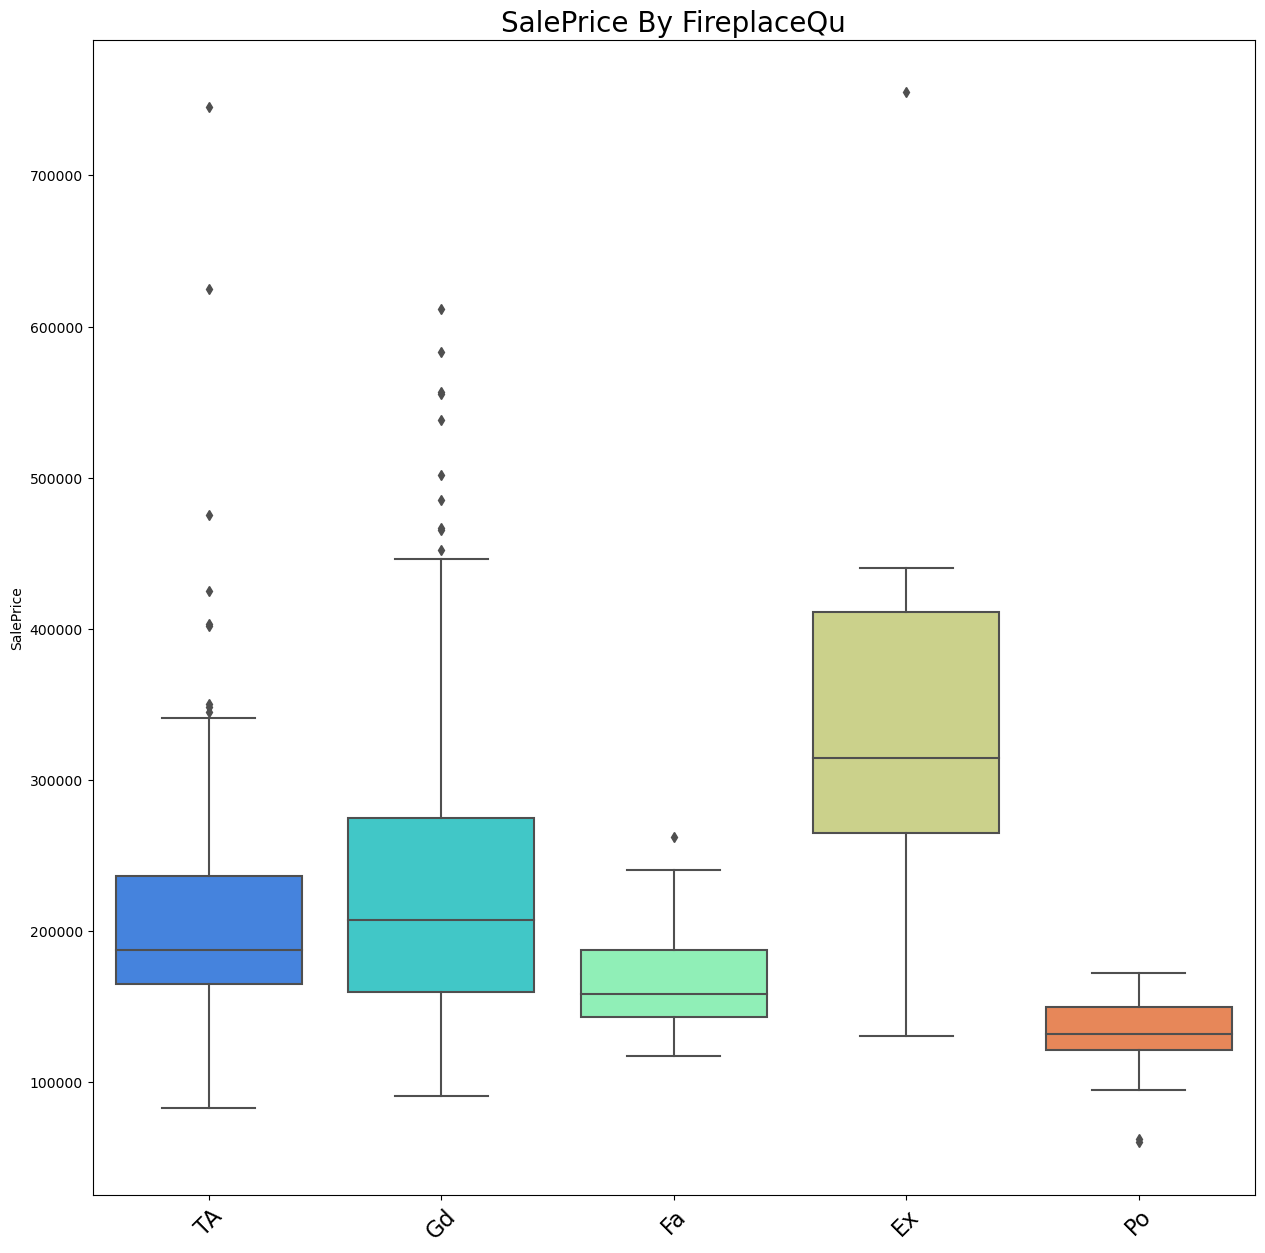

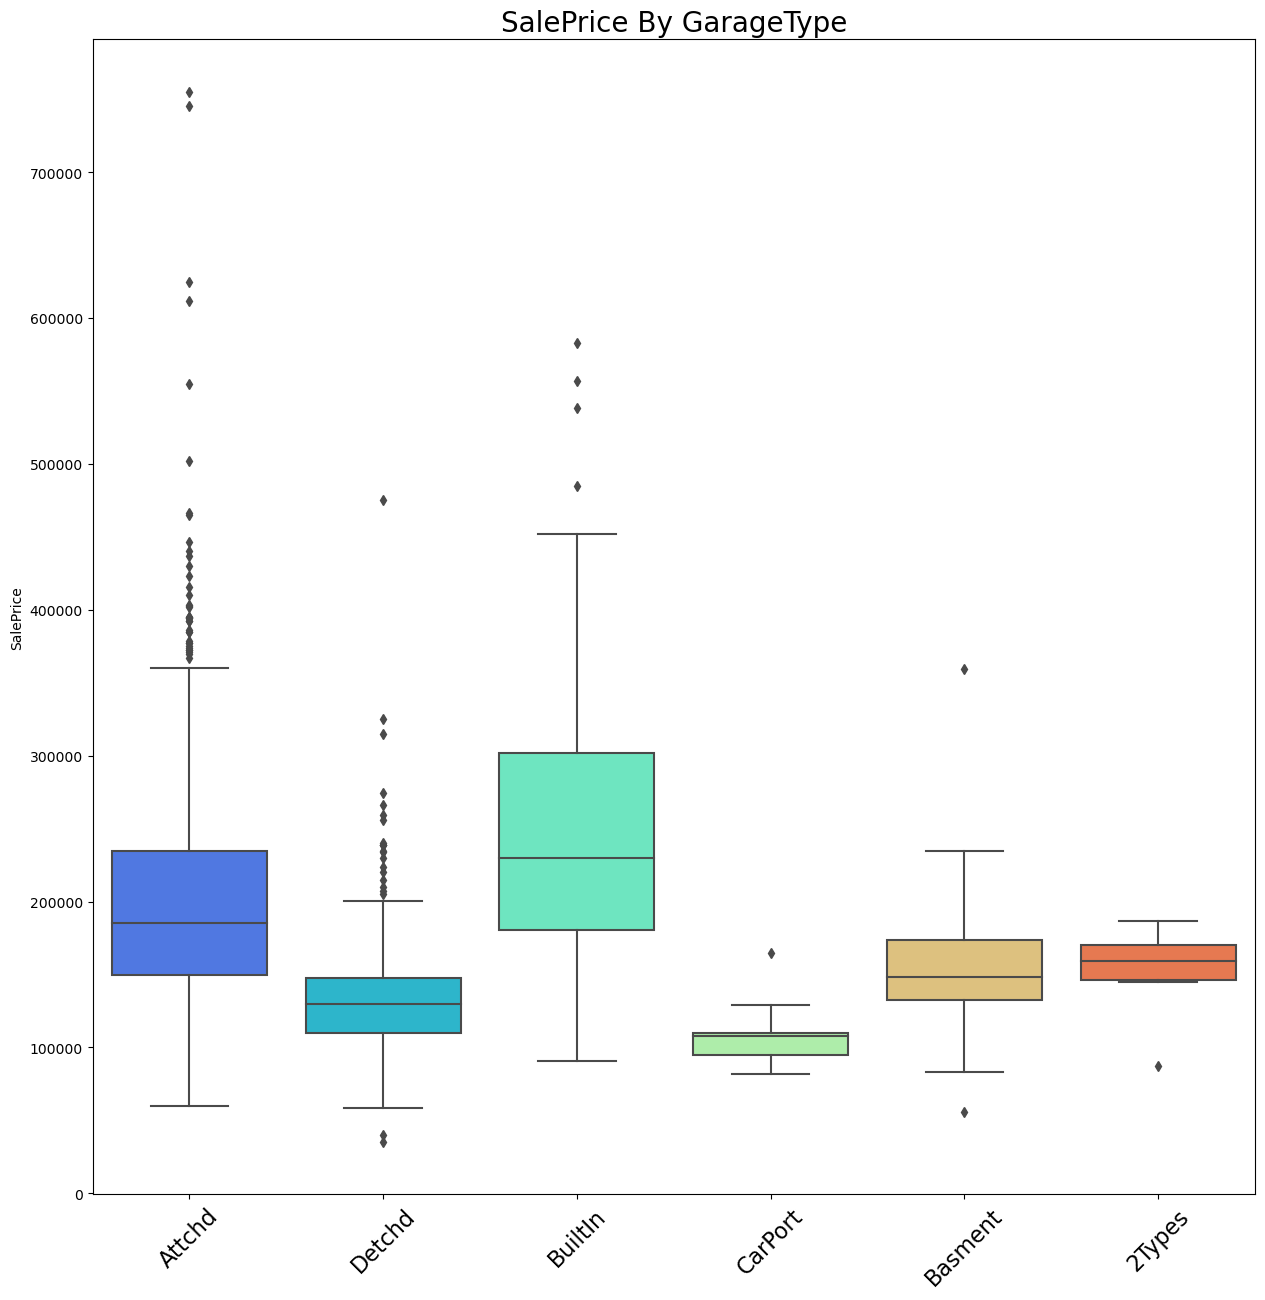

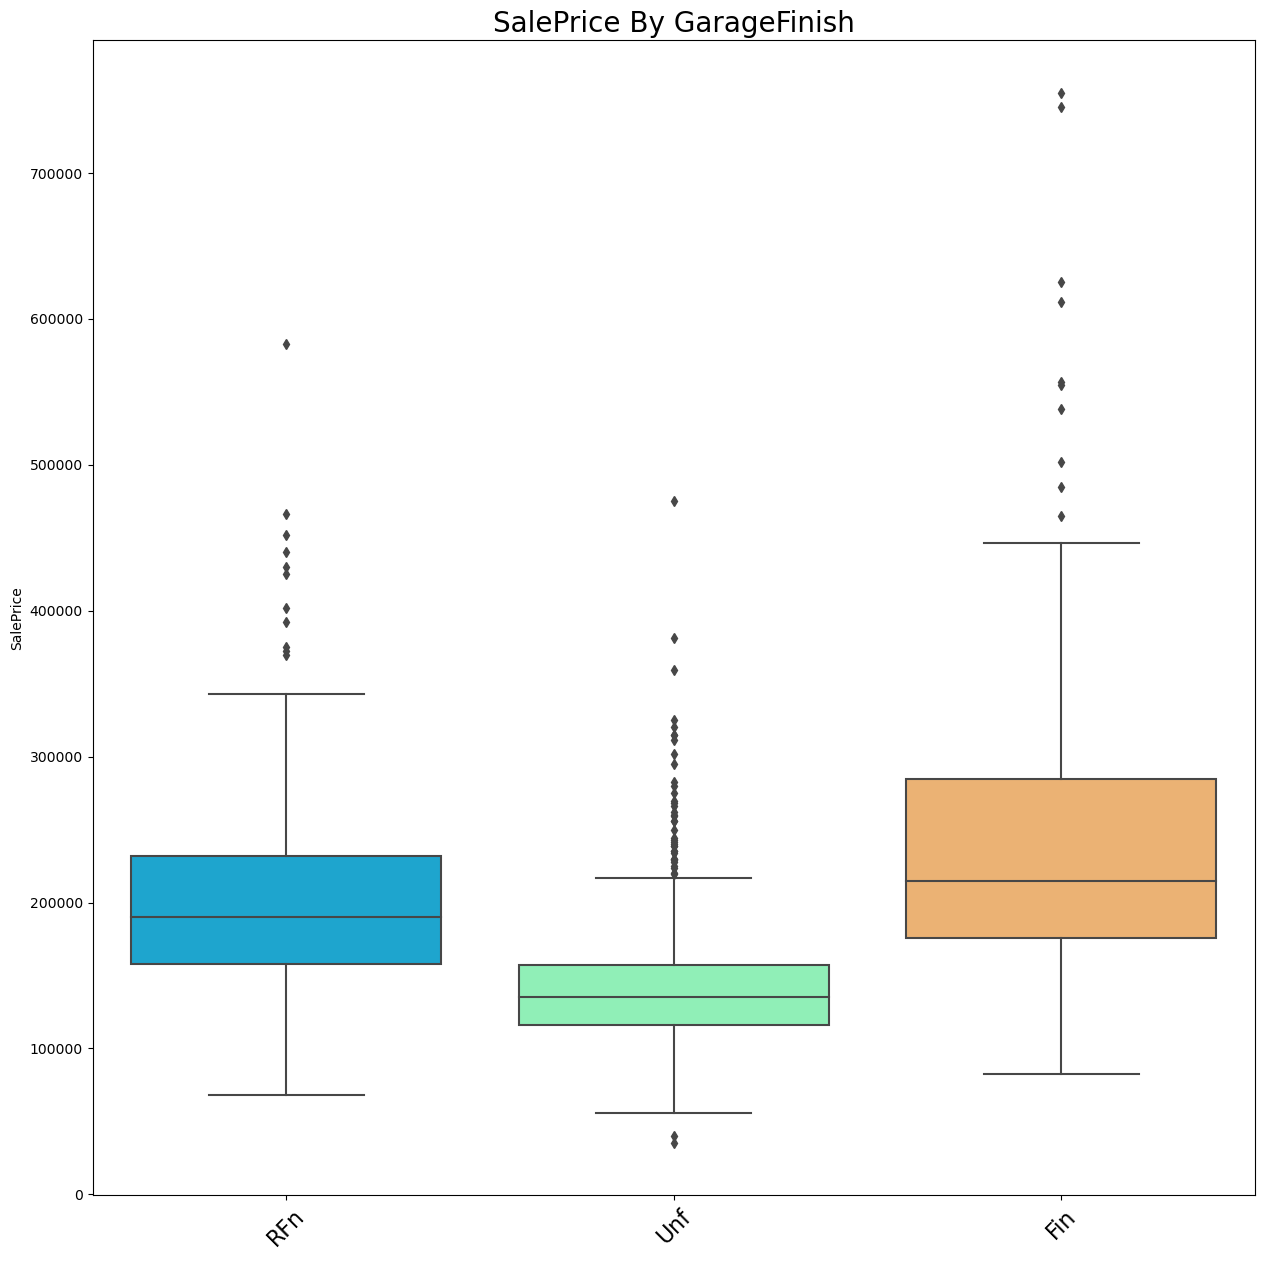

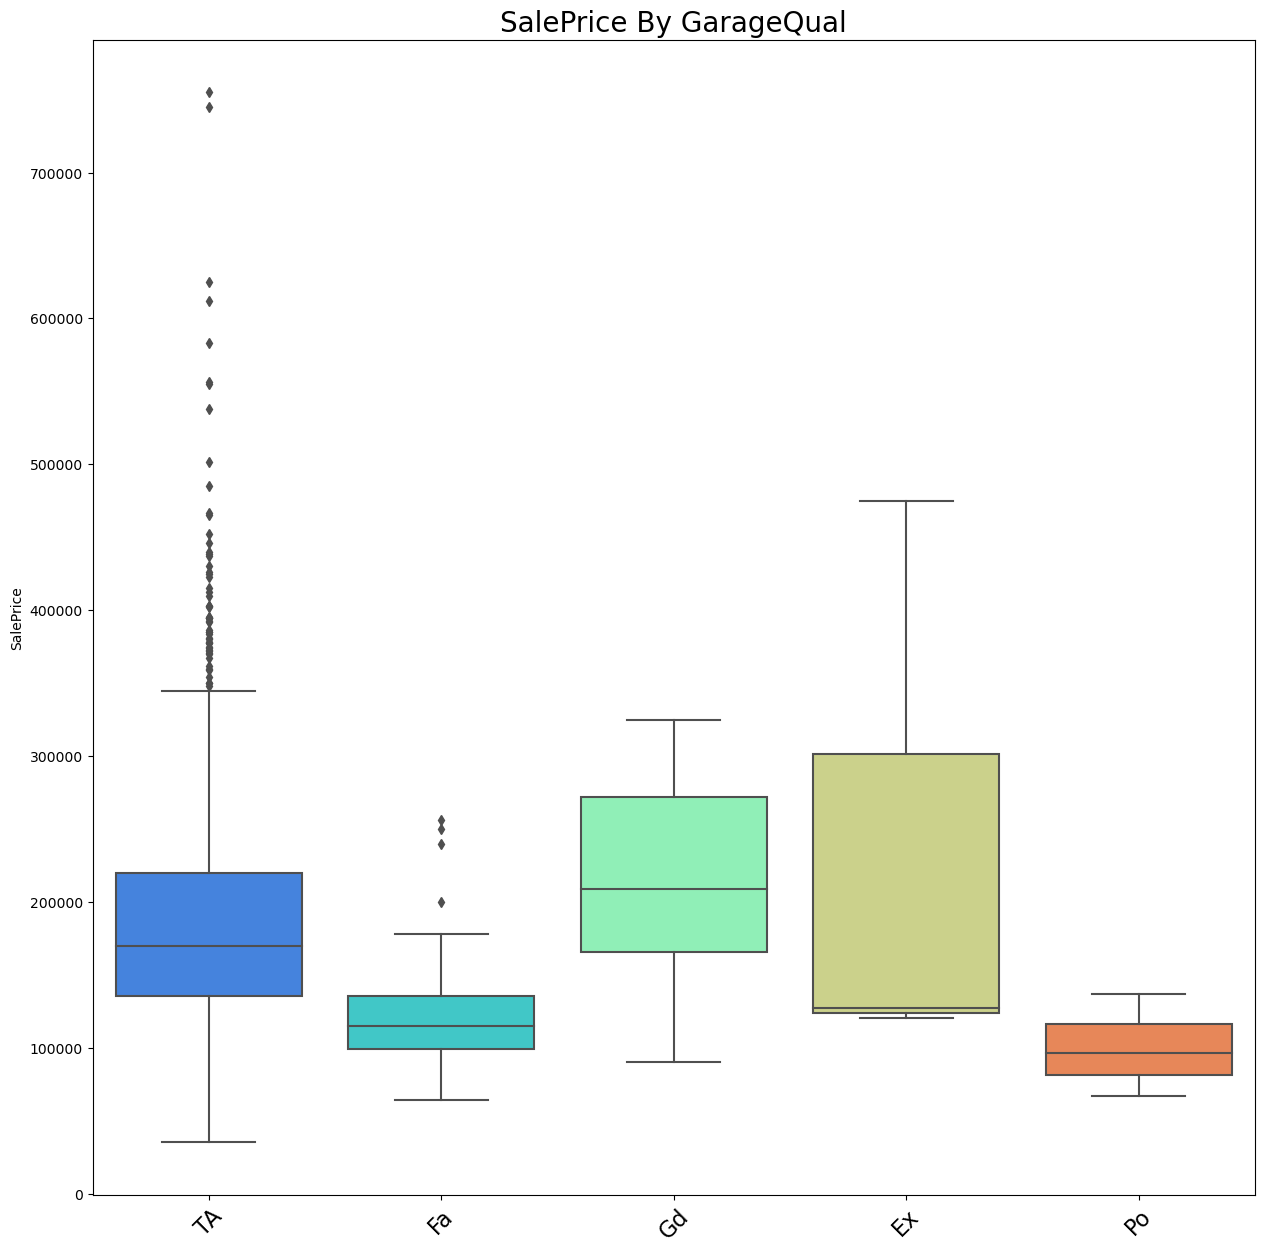

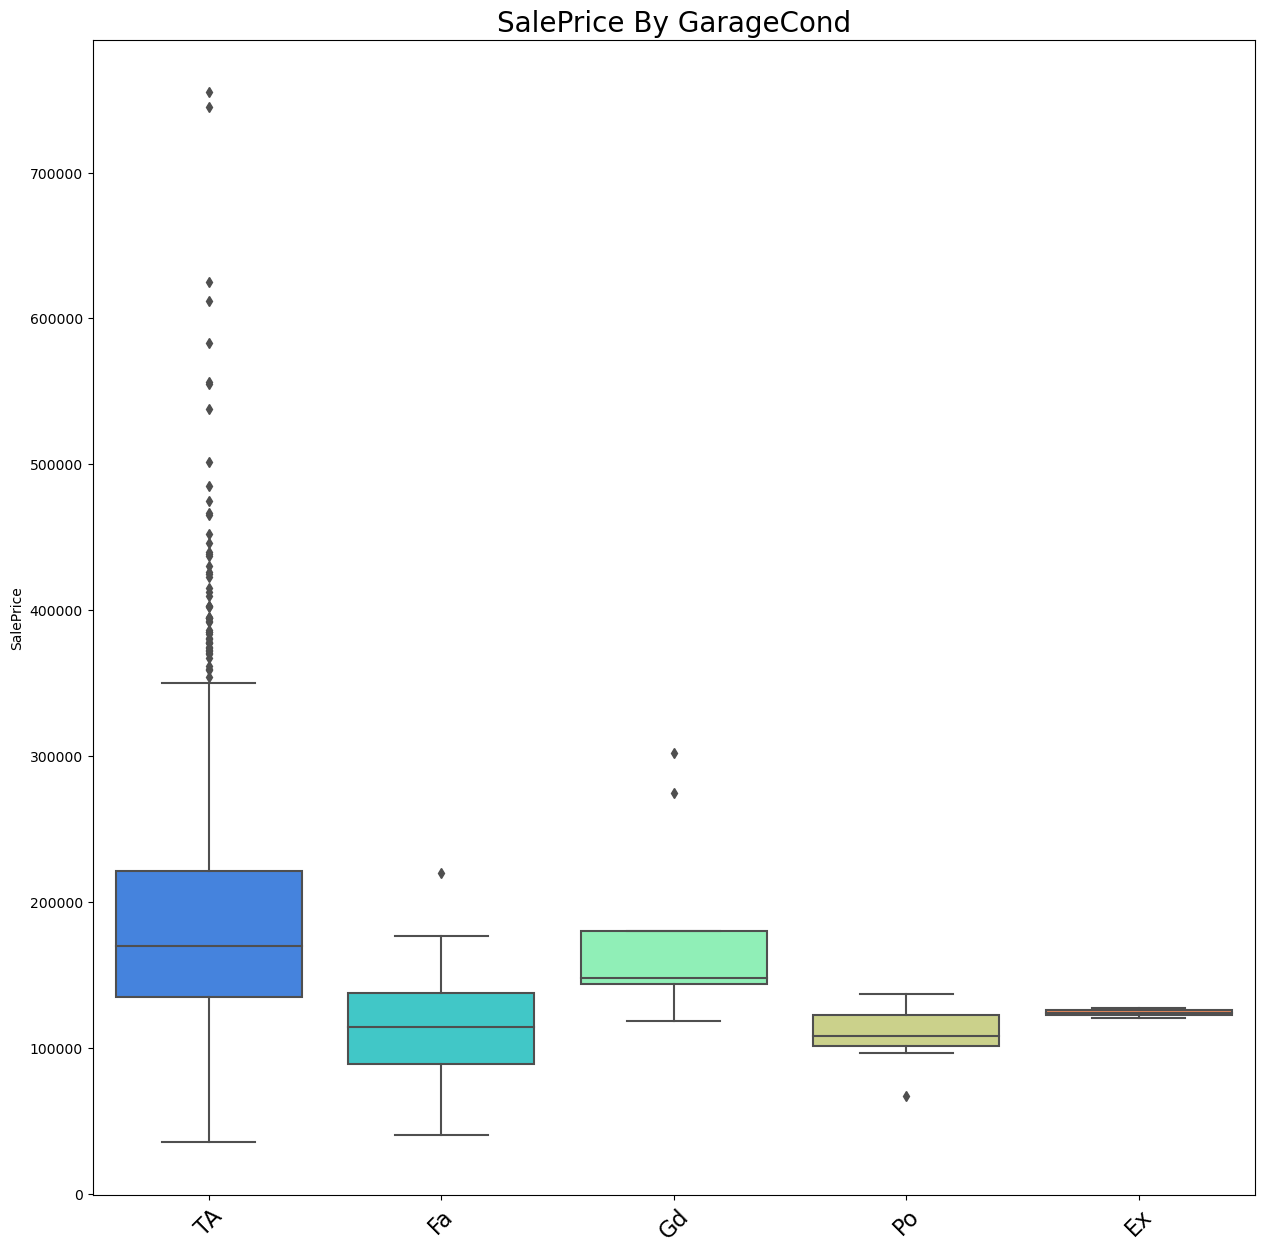

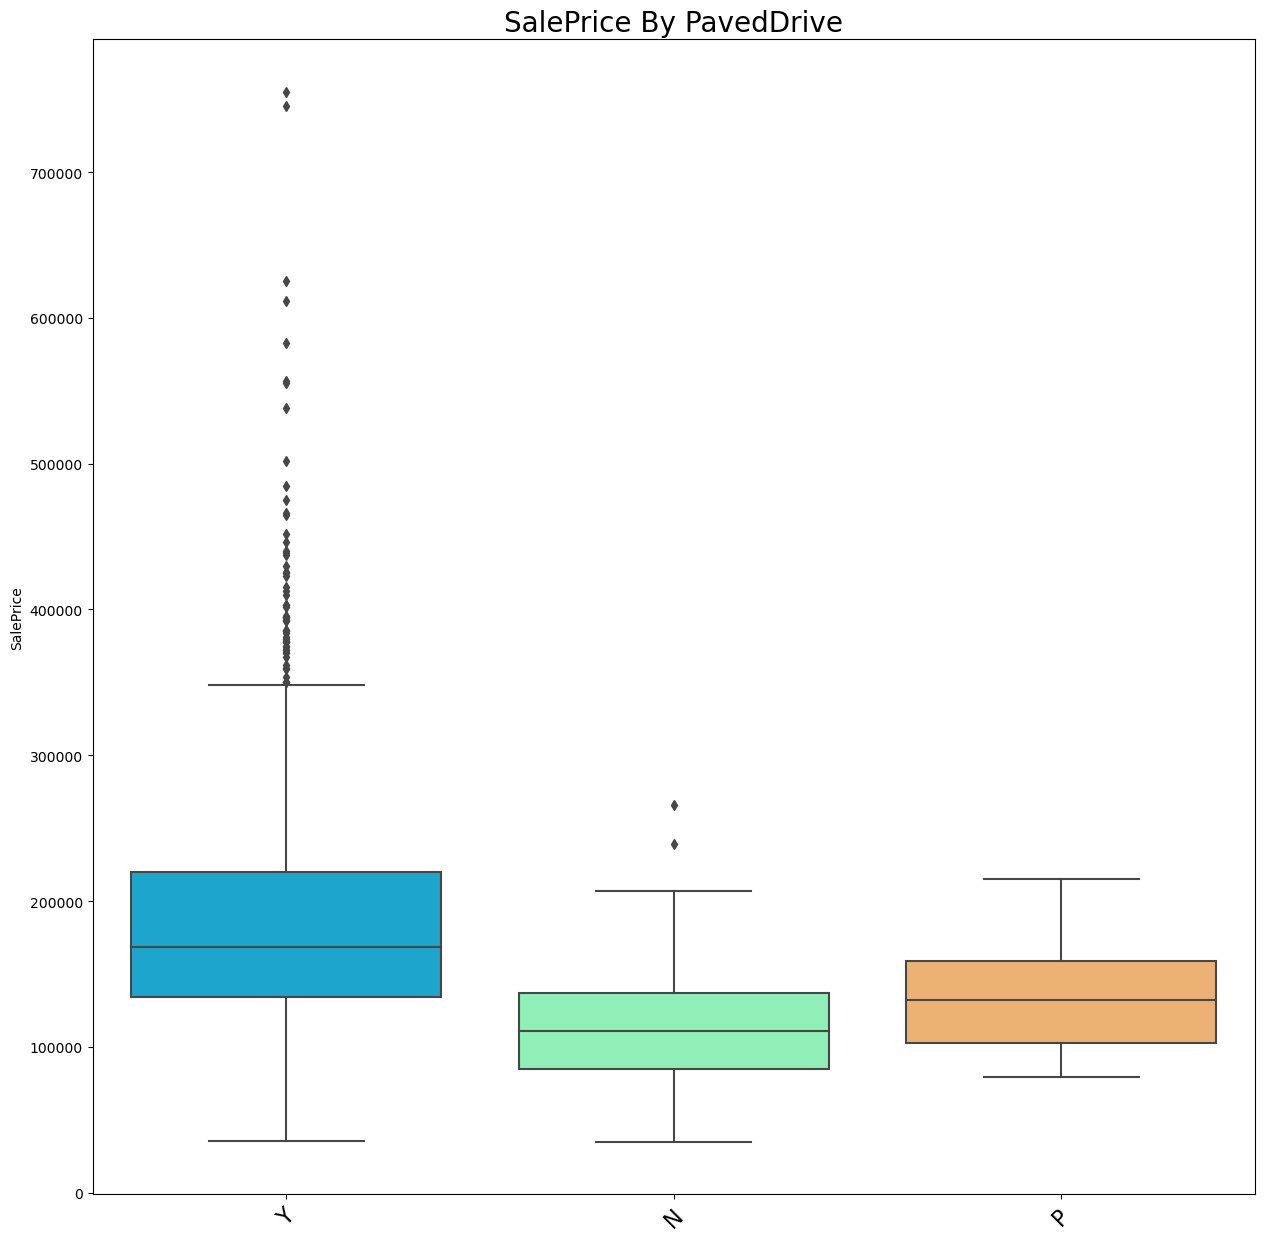

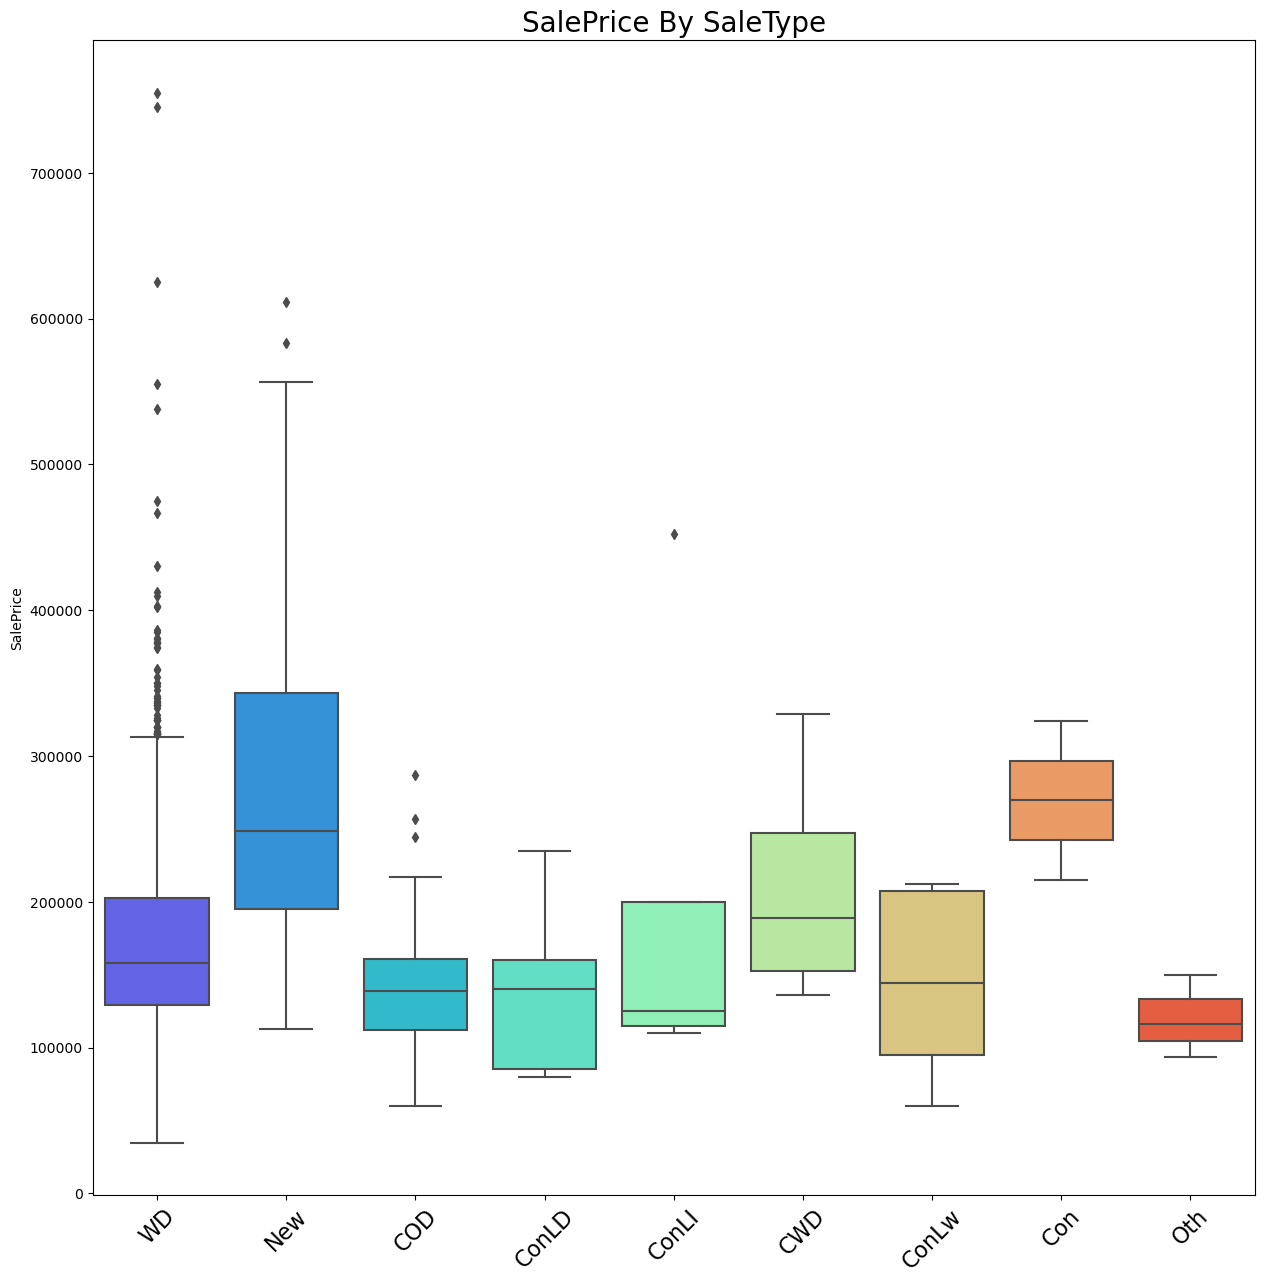

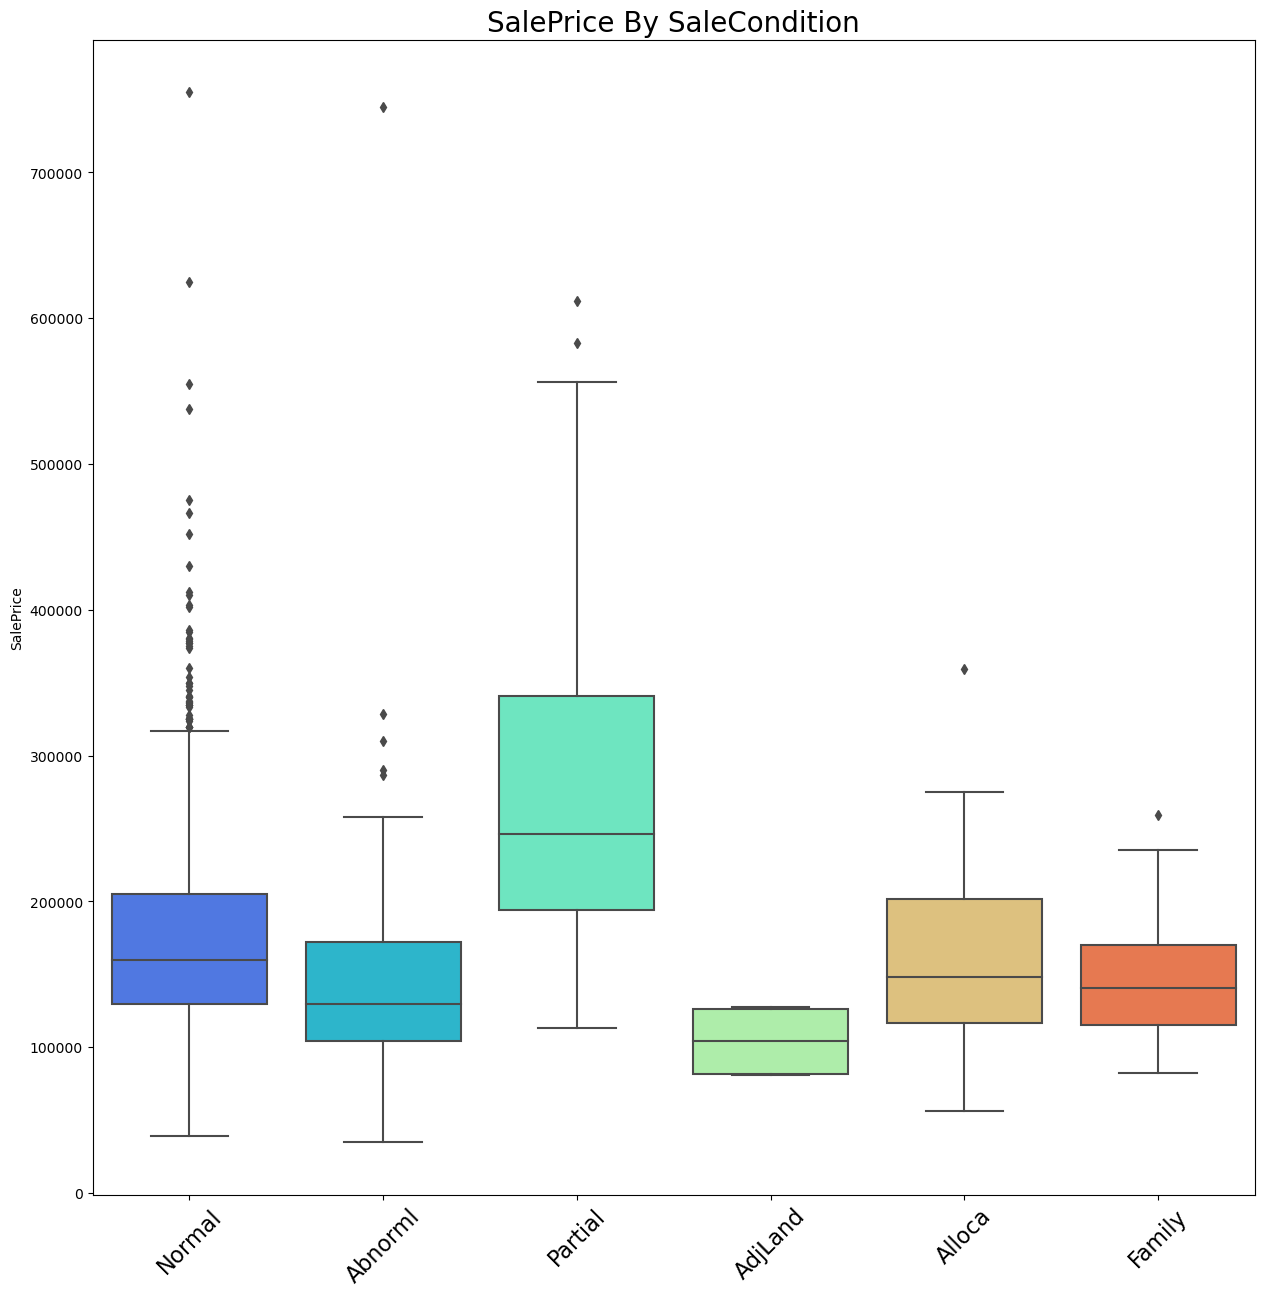

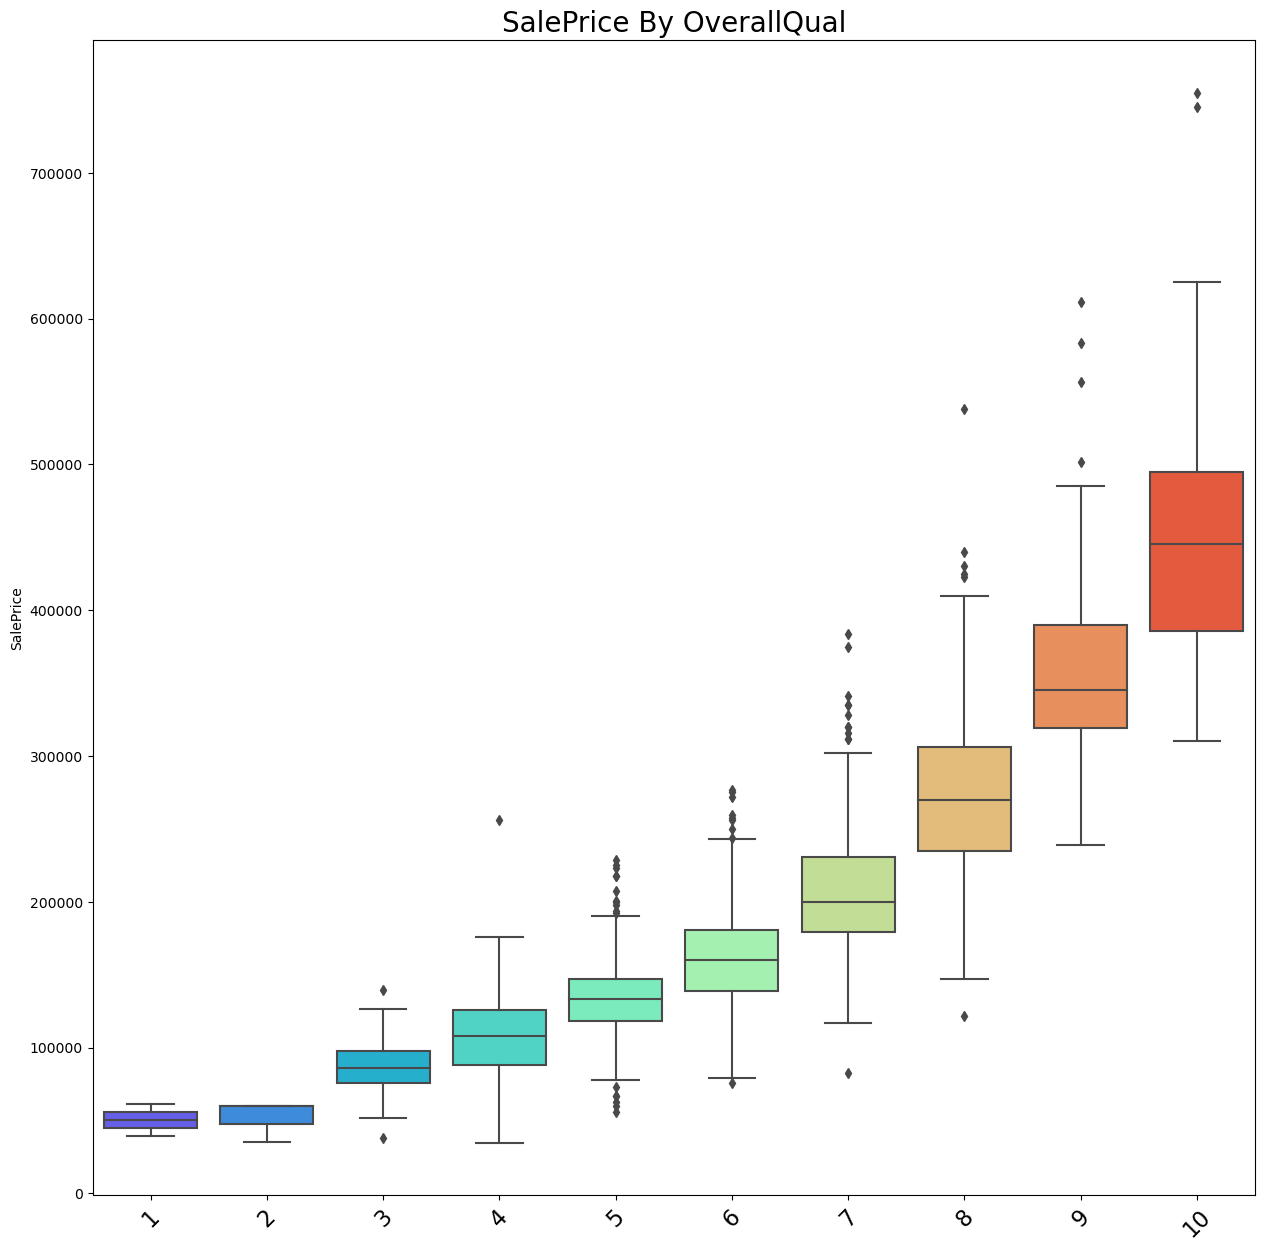

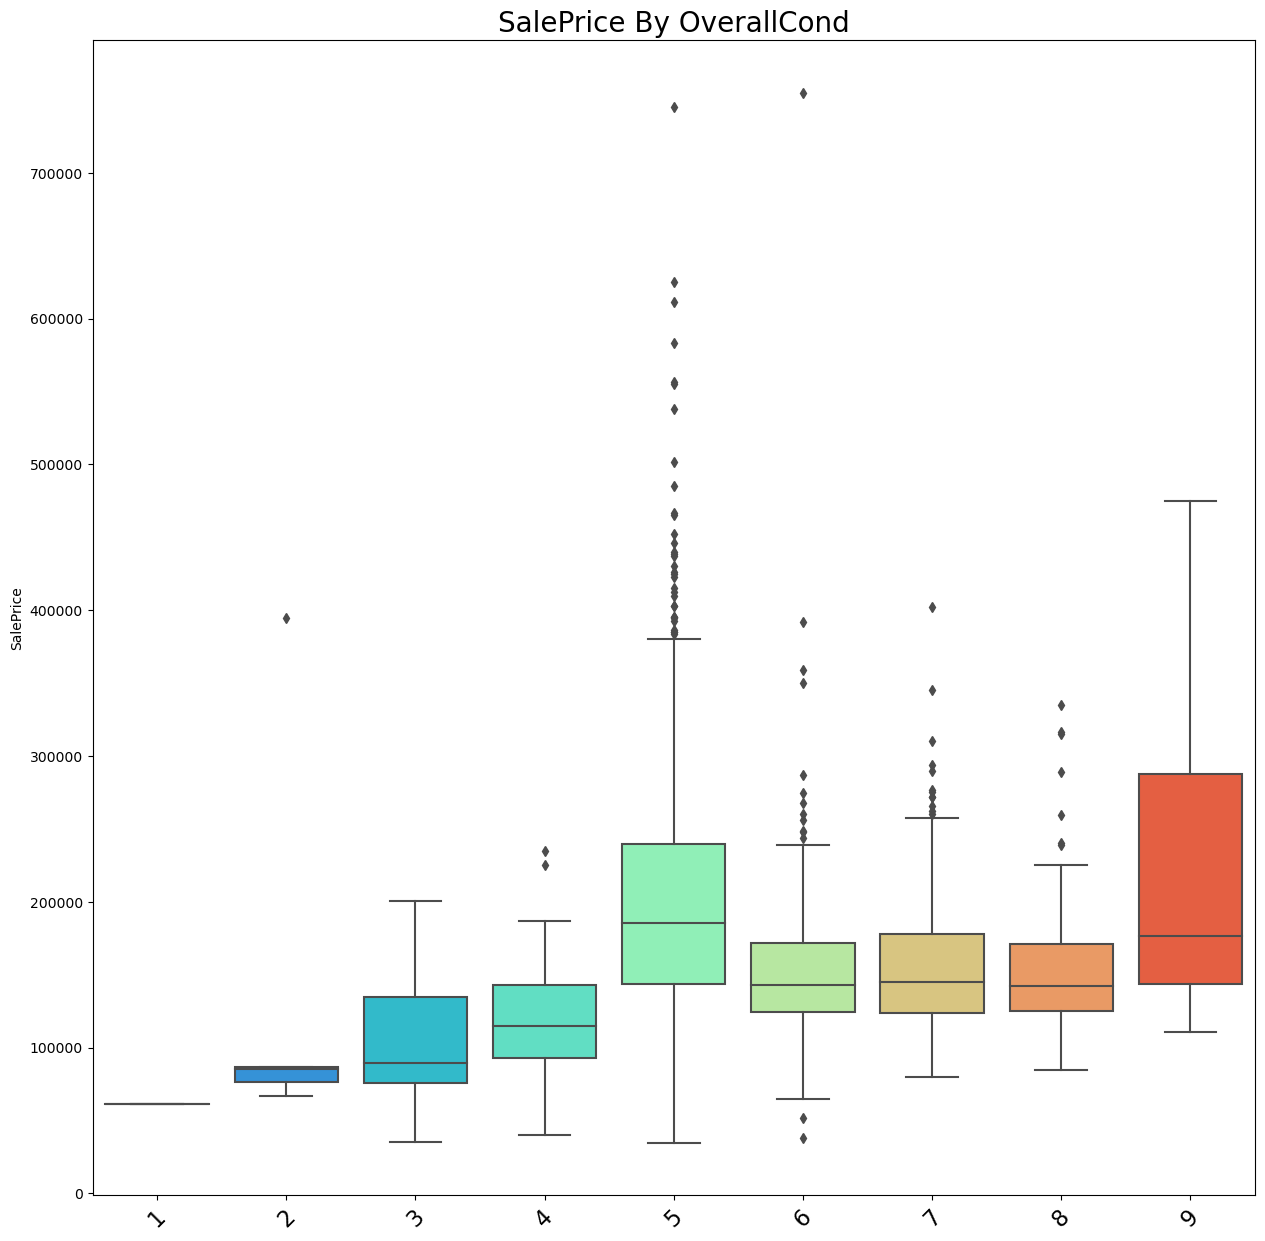

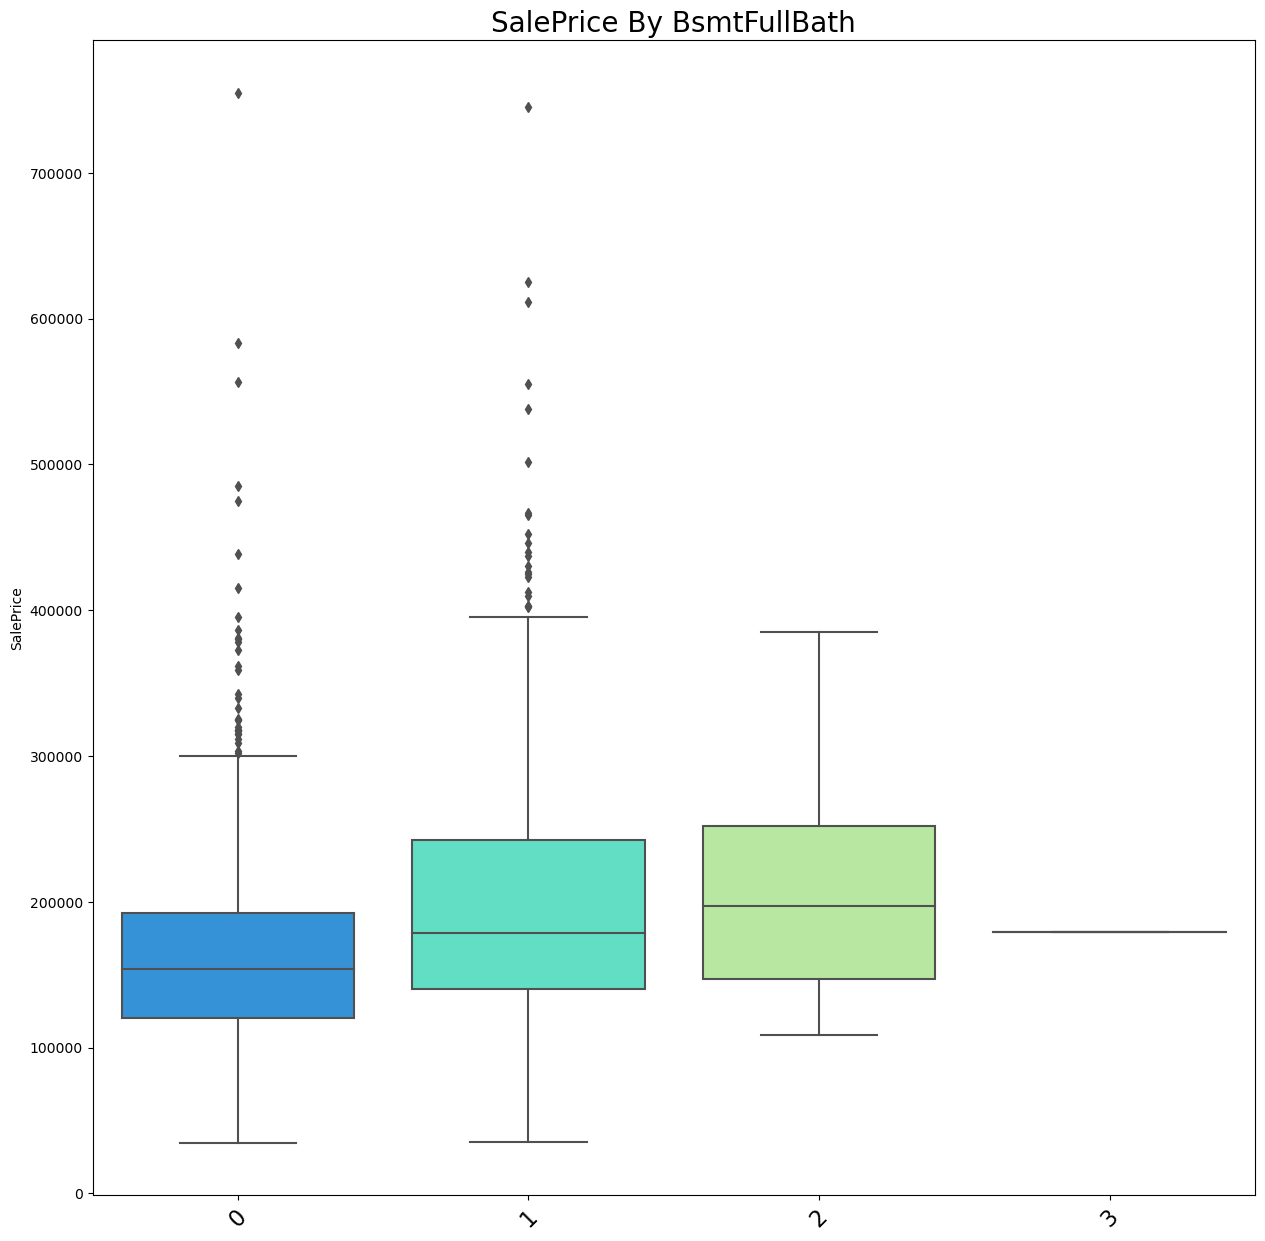

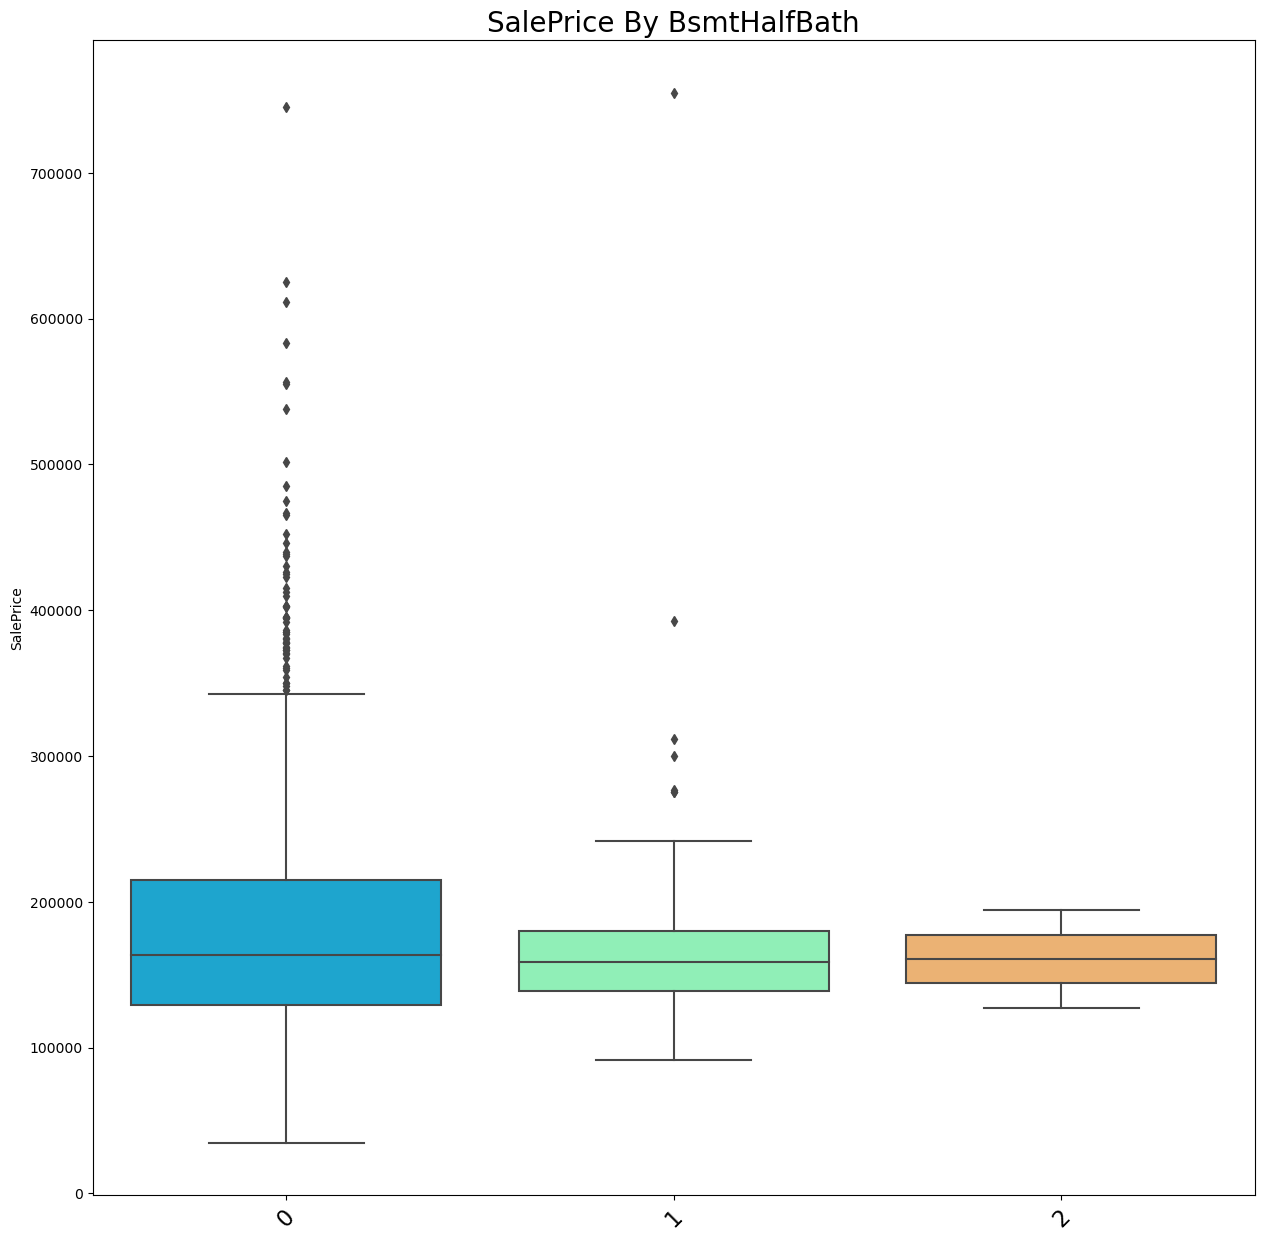

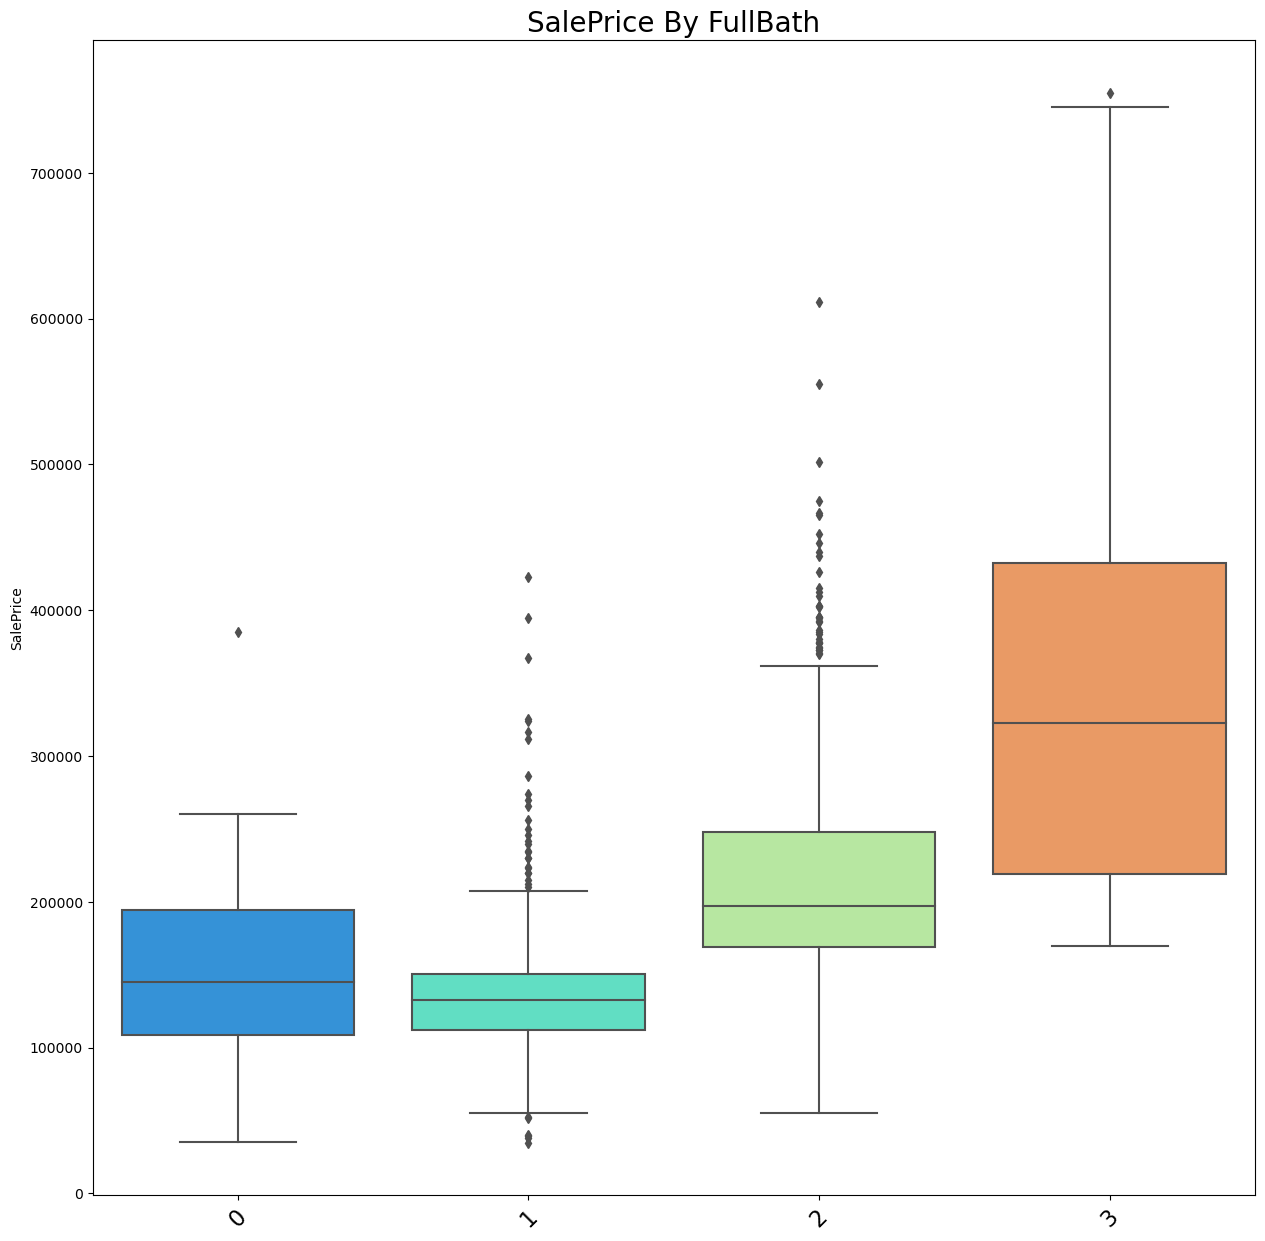

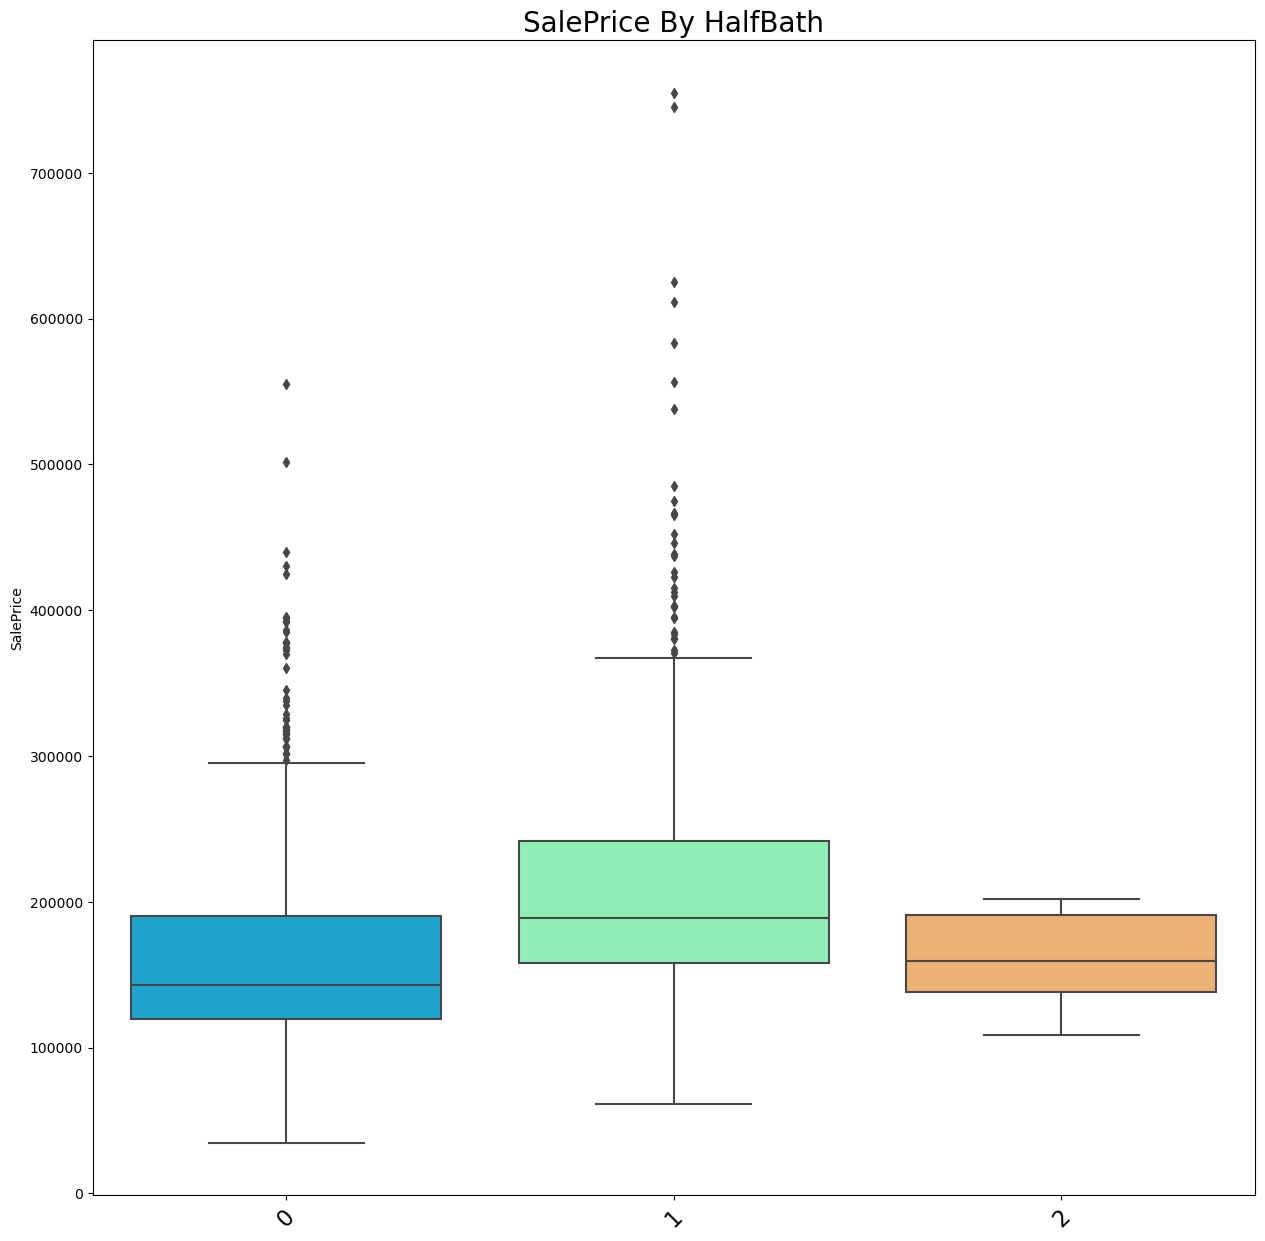

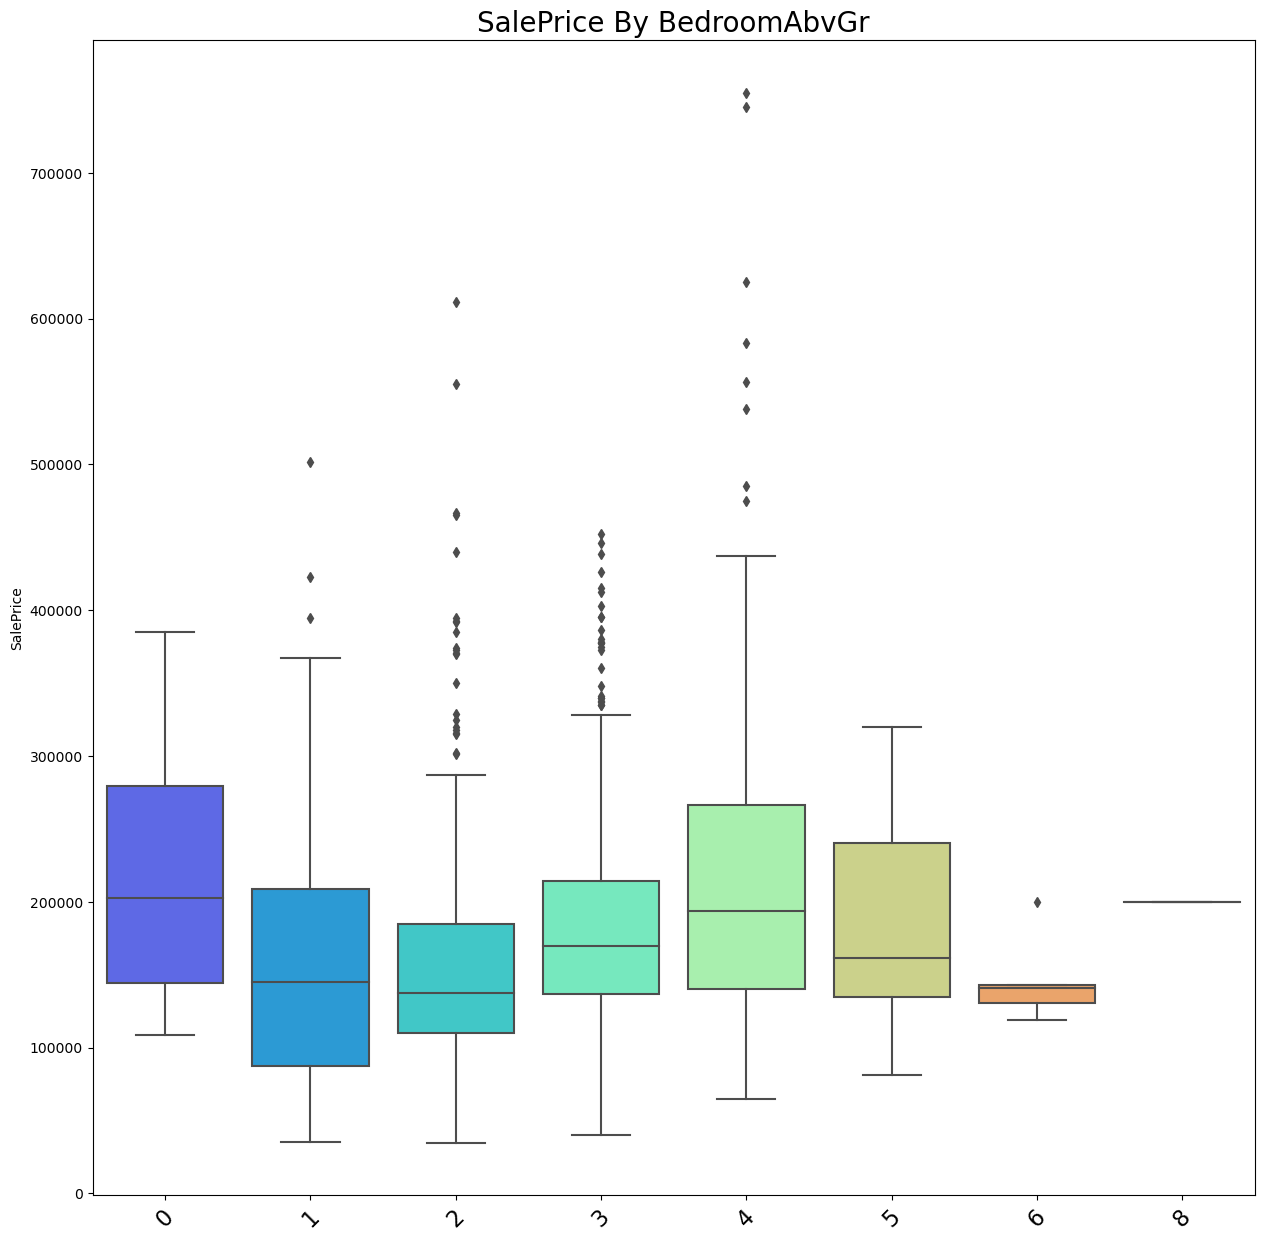

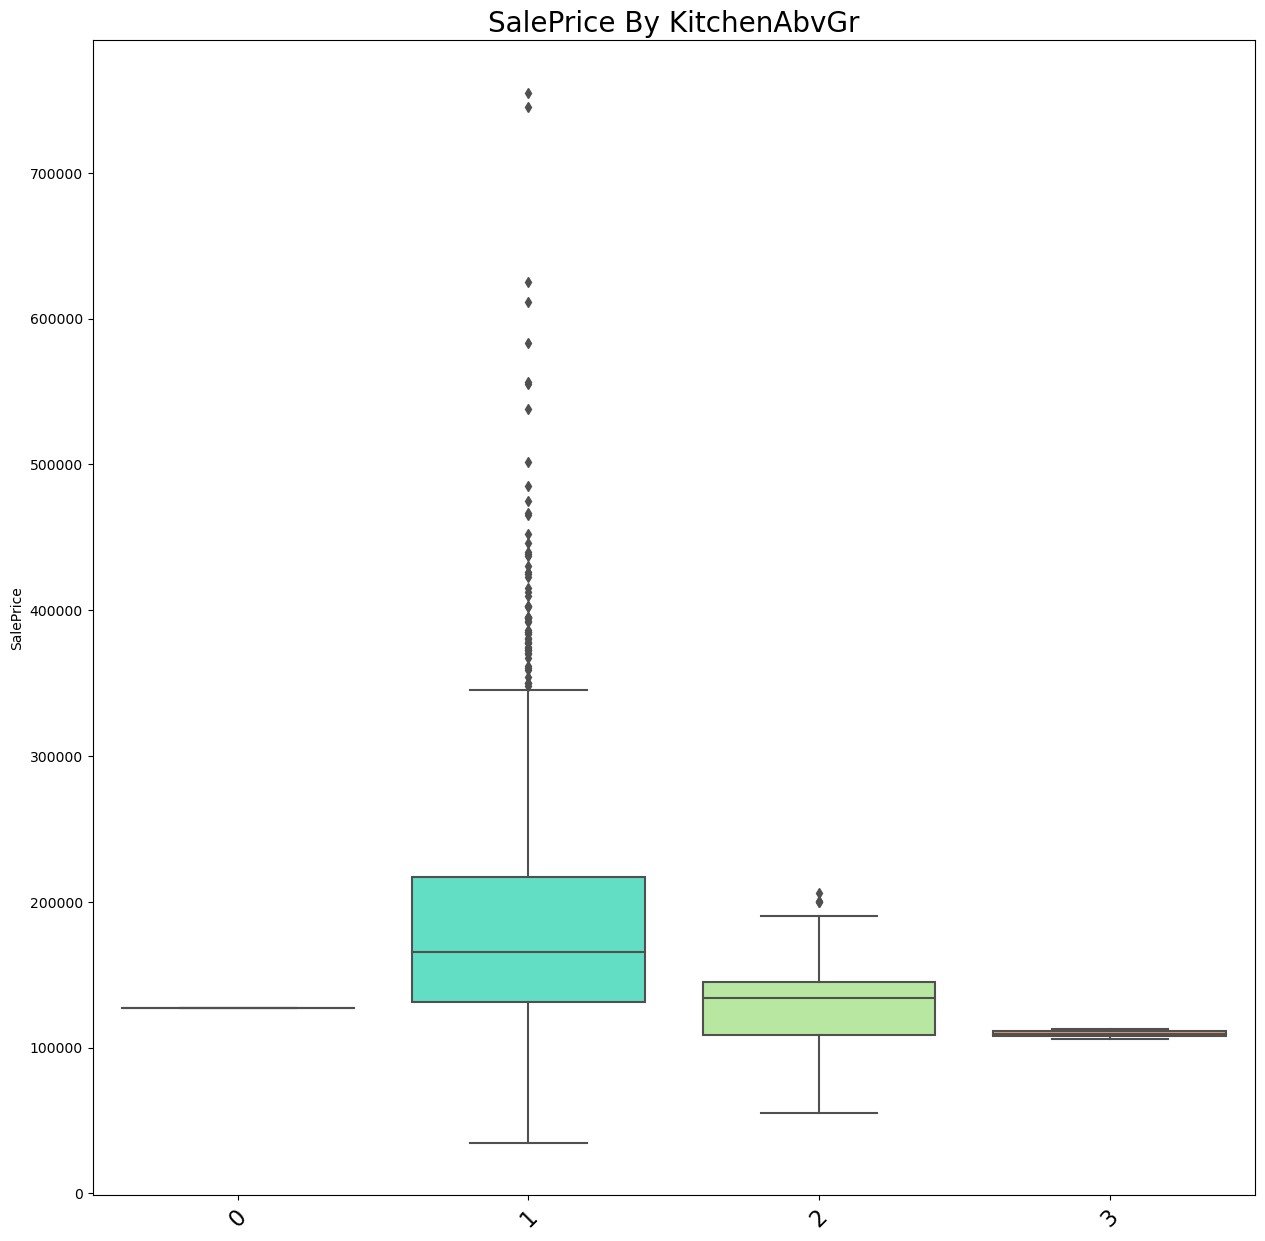

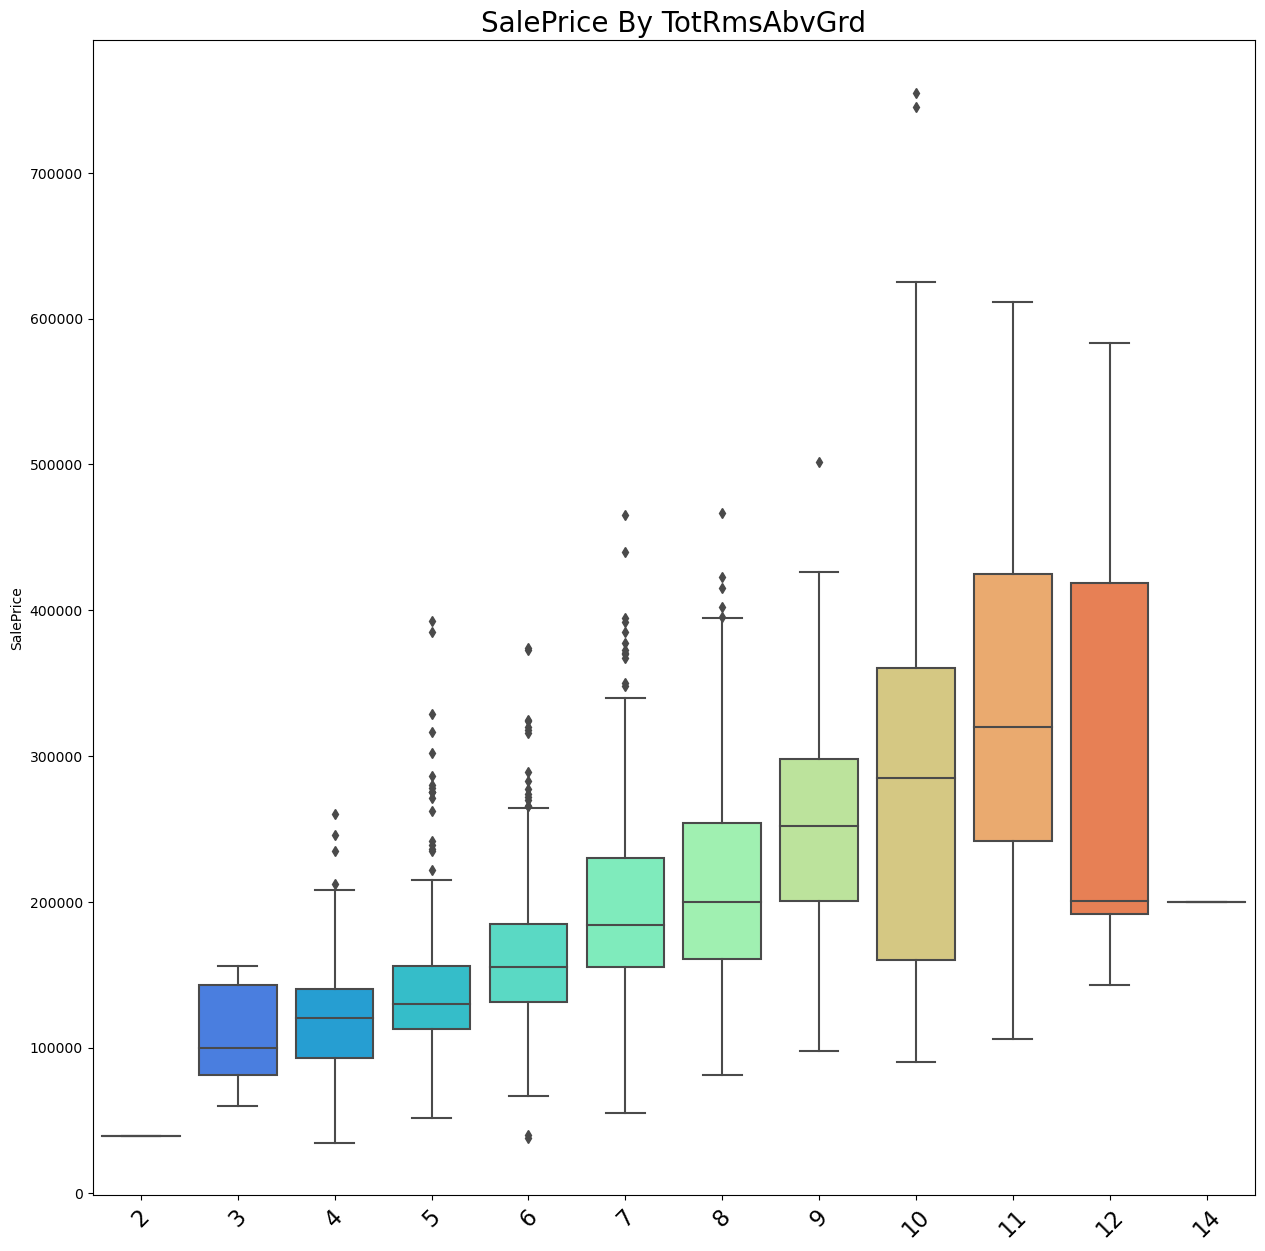

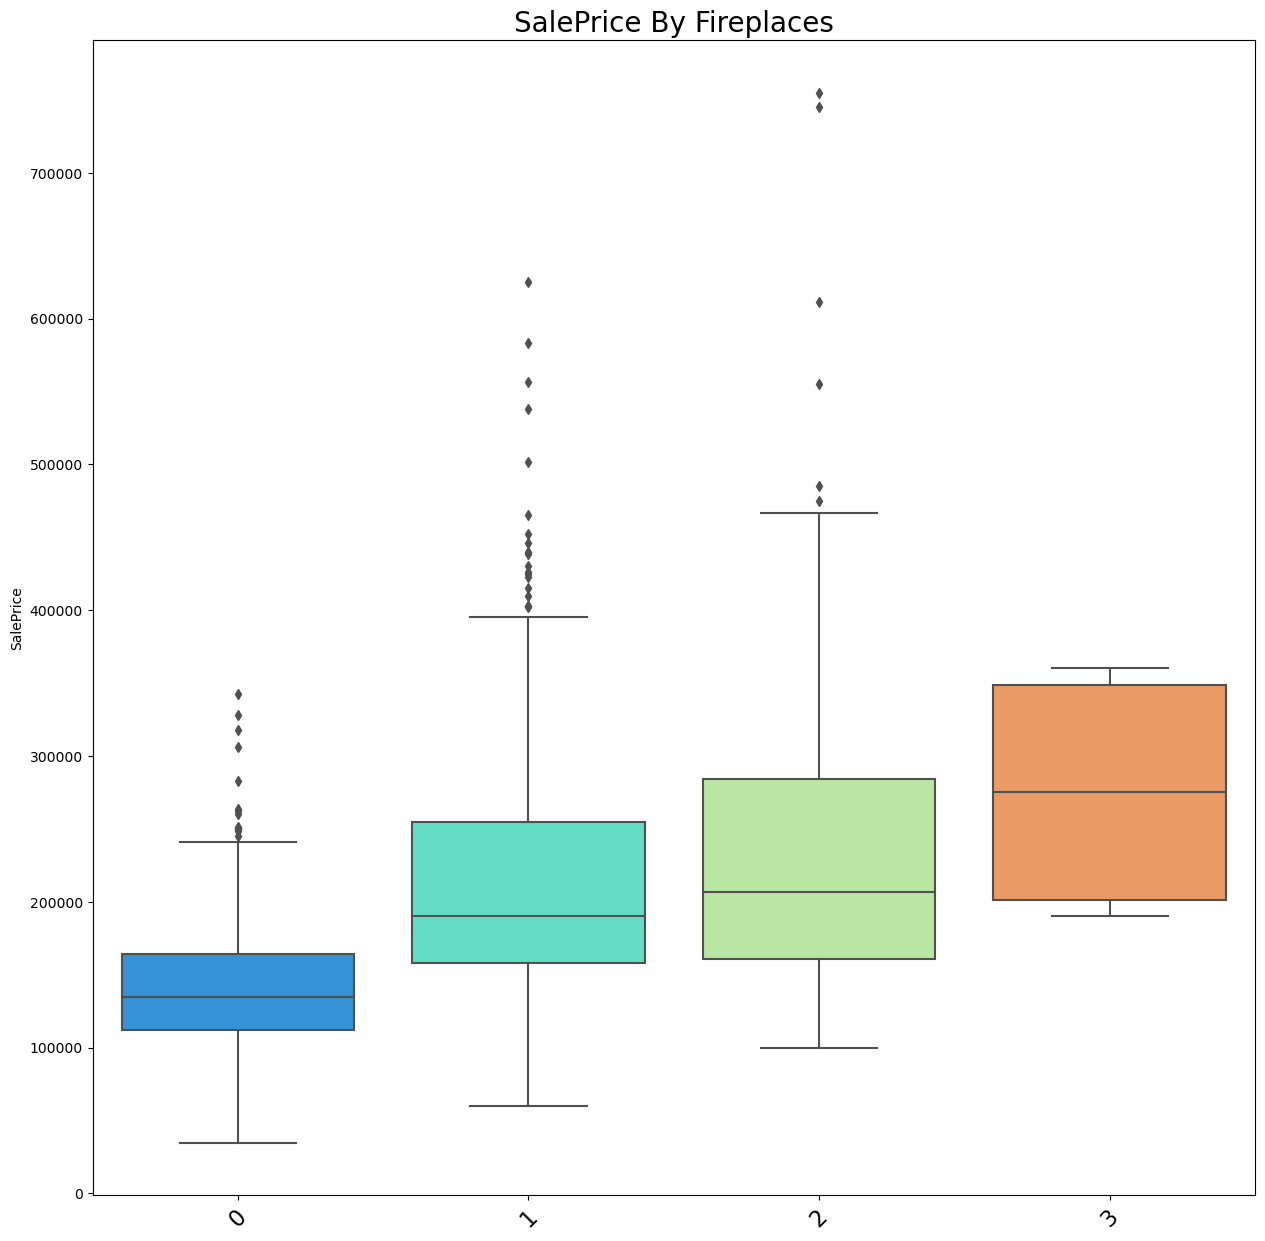

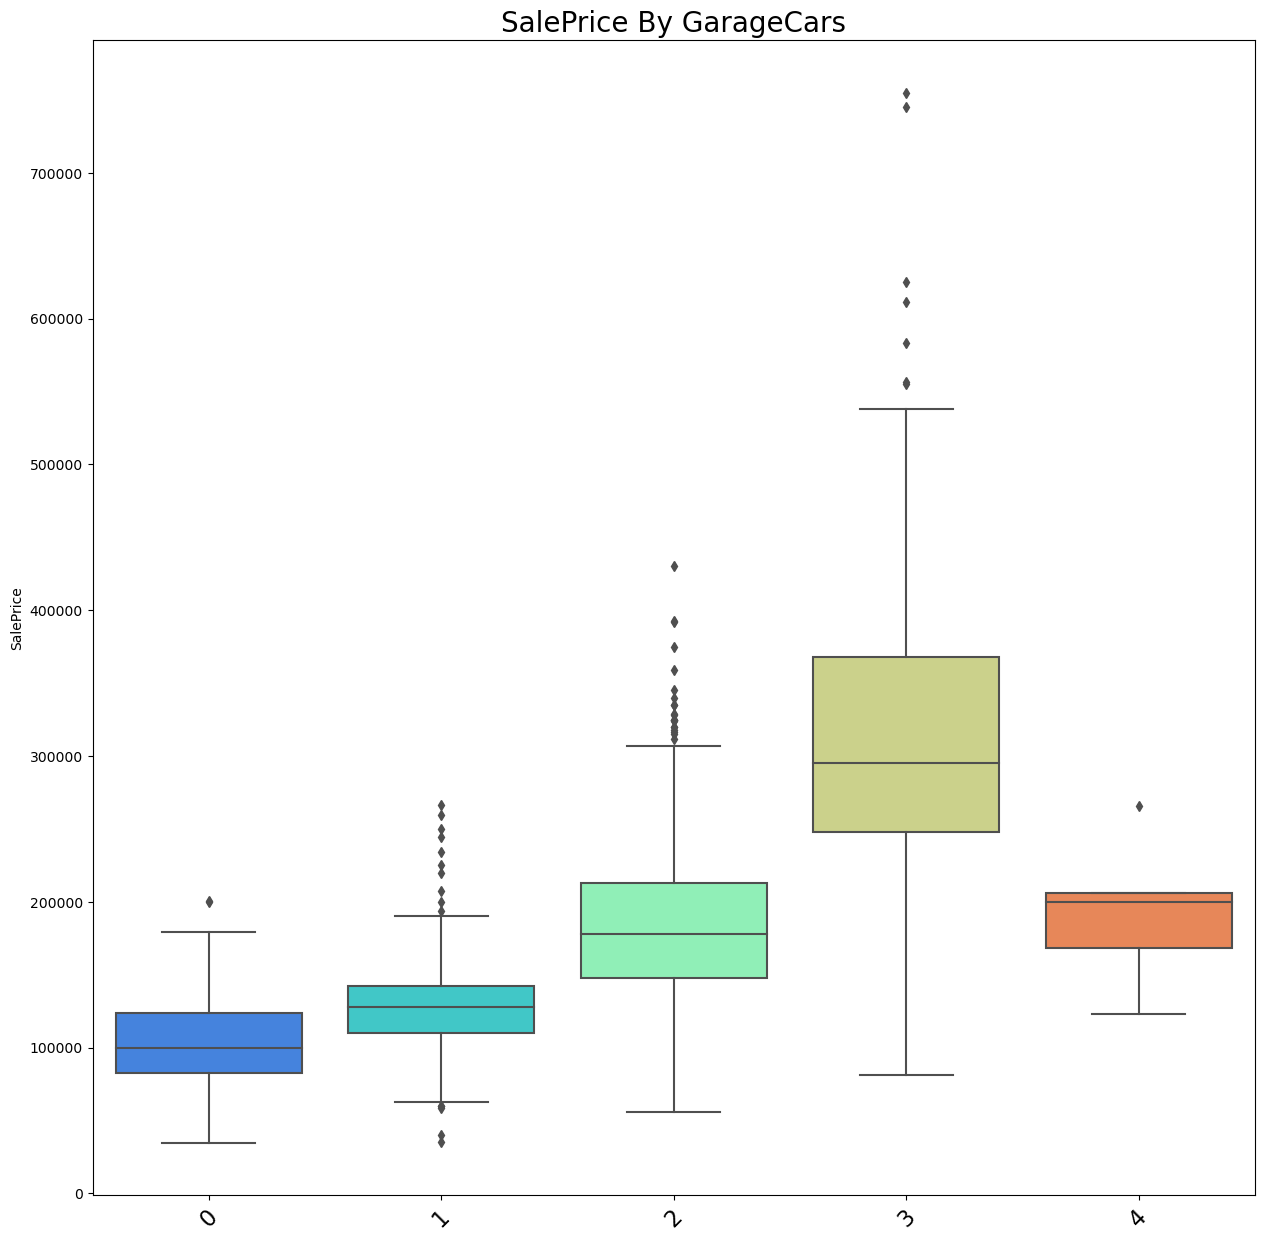

In [20]:
for column in CategoricalColumn:
    plt.figure(figsize=(15,15))
    sns.boxplot(data= df, x = column, y = 'SalePrice', palette='rainbow')
    plt.title(f'SalePrice By {column}', fontsize = 20)
    plt.xticks(rotation = 45, fontsize = 16)
    plt.xlabel(None)
    plt.show()

In [21]:
def categorical_property_price_comparison(data, InputColumn, OutputColumn):
    result = data.groupby(InputColumn).agg(HouseNum=(OutputColumn, lambda x: x.size),
                                           HouseNumPercent=(OutputColumn, lambda x: round((x.size / data.shape[0] * 100), 3)),
                                           MedianHousePrice=(OutputColumn, 'median'))
    result.reset_index(inplace=True)
    result = result.sort_values('MedianHousePrice', ascending=False)
    return result

In [22]:
for i, column in enumerate(CategoricalColumn):
    print(f'\nSTT {i+1} - Bảng dữ liệu phân tích SalePrice theo {column}\n')
    result = categorical_property_price_comparison(df, column, 'SalePrice')    
    print(result)
    print()
    print()


STT 1 - Bảng dữ liệu phân tích SalePrice theo MSSubClass

   MSSubClass  HouseNum  HouseNumPercent  MedianHousePrice
9          60       297           20.370          216000.0
0         120        87            5.967          192000.0
12         80        58            3.978          166500.0
11         75        16            1.097          163500.0
4          20       536           36.763          159250.0
10         70        60            4.115          156000.0
1         160        63            4.321          146000.0
6          40         4            0.274          142500.0
13         85        20            1.372          140750.0
14         90        52            3.567          135980.0
8          50       144            9.877          132000.0
3         190        30            2.058          128250.0
7          45        12            0.823          107500.0
5          30        69            4.733           99900.0
2         180        10            0.686           88500

  GarageFinish  HouseNum  HouseNumPercent  MedianHousePrice
0          Fin       350           24.005          215000.0
1          RFn       422           28.944          190000.0
2          Unf       605           41.495          135000.0



STT 36 - Bảng dữ liệu phân tích SalePrice theo GarageQual

  GarageQual  HouseNum  HouseNumPercent  MedianHousePrice
2         Gd        14            0.960          209115.0
4         TA      1309           89.781          170000.0
0         Ex         3            0.206          127500.0
1         Fa        48            3.292          115000.0
3         Po         3            0.206           96500.0



STT 37 - Bảng dữ liệu phân tích SalePrice theo GarageCond

  GarageCond  HouseNum  HouseNumPercent  MedianHousePrice
4         TA      1324           90.809          170000.0
2         Gd         9            0.617          148000.0
0         Ex         2            0.137          124000.0
1         Fa        35            2.401          114504.


__Nhận xét:__ Với số lượng mẫu dữ liệu nhận được của dataset hiện tại có thể rút ra một số nhận xét như sau

+ <b>Thuộc tính MSSubClass - Loại căn hộ</b> 

Giá nhà trung vị có sự biến đổi đáng kể giữa các lớp nhà. Ví dụ, giá nhà trung vị của lớp 30 (MSSubClass = 30) là 99,900 đô la trong khi giá nhà trung vị của lớp 80 (MSSubClass = 80) là 166,500 đô la.

Loại căn hộ/nhà 20 (MSSubClass = 20) (1-story 1946 & new all styles) có số lượng nhà (HouseNum) cao nhất, chiếm khoảng 36.763% tổng số lượng nhà trong dữ liệu. Giá nhà trung vị (MedianHousePrice) của lớp này là 159,250 đô la.

Loại căn hộ/nhà 60 (MSSubClass = 60) (2-story 1946 & new) cũng có số lượng nhà đáng kể (297 căn), chiếm khoảng 20.370% tổng số lượng nhà. Giá nhà trung vị của lớp này là 216,000 đô la.

Các Loại căn hộ/nhà còn lại (MSSubClass khác) (1-1/2 story finished all ages) có số lượng nhà và giá nhà trung vị thấp hơn. Ví dụ, lớp 50 (MSSubClass = 50) có 144 căn nhà (9.877% tổng số lượng nhà) và giá nhà trung vị là 132,000 đô la.

Tuy nhiên có một số loaị căn hộ/nhà chiếm số lượng khá thấp <6% nhưng giá nhà trung vị lại khá cao có thể kể đến như loại nhà 120(1-story PUD (Planned Unit Development) - 1946 & new) có 87 căn (chiếm 5.967% tổng số lượng nhà ) nhưng giá nhà trung vị lại lên đến 192,000 đô la

+ <b>Thuộc tính MSZoning - Loại khu vực quy hoạch:</b>

Khu vực quy hoạch "RL" (Vùng nhà ở mật độ thấp) có số lượng nhà (HouseNum) cao nhất, chiếm khoảng 78.807% tổng số lượng nhà trong dữ liệu. Giá nhà trung vị (MedianHousePrice) của khu vực này là 174,000 đô la.

Khu vực quy hoạch "RM" cũng có số lượng nhà đáng kể (218 căn), chiếm khoảng 14.952% tổng số lượng nhà. Giá nhà trung vị của khu vực này là 120,500 đô la.

Số lượng căn nhà ở khu vực quy hoạch "FV" tuy chỉ chiếm 5% trong tóng số nhà nhưng giá trị trung vị về giá nhà ở lại rất cao lên đến 205,950 đô la 

Giá nhà trung vị cũng có sự biến đổi đáng kể giữa các khu vực quy hoạch. Ví dụ, giá nhà trung vị của khu vực quy hoạch "RH" là 136,500 đô la trong khi giá nhà trung vị của khu vực "FV" là 205,950 đô la.

+ <b>Thuộc tính LotShape -  hình dạng lô đất, LandContour - Đặc điểm địa hình của lô đất, LandSlope - độ đôc của lô đất</b>

Phần lớn các căn nhà đều được xây dựng trên các lô đất có  hình dạng đều (Reg hoặc IR1) địa hình phẳng (Lvl) với độ dốc nhẹ những lô đất có địa hình như này rất thuận lợi cho việc xây dựng với giá cả trung vị trong khoảng từ 150000 đến 190000. Những căn nhà được xây dựng trên các lô đất có hình dáng không đồng đều (ỈR2, IR3) có thể có giá nhà trung vị cao hơn vì có thể nó đòi hỏi kĩ thuật xây dựng cao hơn để xử lý các trường hợp đặc biệt như thiên tai ngập lụt,.. 

+ <b>LotConFig - Cấu hình lô đất</b>

73% số lượng nhà ở được xây dựng trên các lô đất nằm ở khu vực Inside(nội bộ) với giá nhà trung vị nằm ở khoảng 160,000 đô la

+ <b>Thuộc tính Condition1 - điều kiện xung quanh của ngôi nhà</b> 

Vì đa phần các ngôi nhà được xây dựng ở khu vực nội bộ cho nên điều kiện xung quanh bình thường chiếm số lượng lớn. Tuy nhiên những căn nhà được xây dựng tiếp giáp với các vị trí đặc biệt cao cấp như công viên, hồ có giá trị trung vị về giá cả khá cao  > 200,000 đô la

+ <b>BldgType và HouseStyle:</b>

Khu vực nhà ở mà dataset này khảo sát. Những ngôi nhà/ căn hộ phần lớn là những ngôi nhà riêng lẻ(1Fam) và xu hướng là họ chọn cho mình những ngôi nhà 1 tầng hoặc 2 tầng với giá nhà trung vị 1 tầng rơi vào khoảng 160,000 đô la và 2 tầng là 190,000 đô là những ngôi nhà được thiết kế theo kiểu mái gồ và vật liệu làm mái là từ gỗ hoặc vật liệu tổng hợp với vật liệu bên ngoài là vật liệu nhựa vinyl. 

+ <b>NeighBorHood: Các khu vực mà căn hộ ngôi nhà tiếp cận</b>

Trung Vị Giá Nhà của các căn hộ gần khu vực NridgHt > NoRidge > StonrBr >... Cụ thể  315000.0 > 301500.0 > 278000.0 > ...

Có sự cách biệt rất lớn về trung vị giá nhà gần các khu vực lân cận khác nhau


+ <b>MasnrType: Vật liệu vân đá trang trí cho tường bên ngoài</b>

Những ngôi nhà có vật liệu vân đá là đá tự nhiên thường có giá trị cao hơn so với những vật liệu khác

+ <b>OverallQual:</b>

Giá trị tiện nghi mà ngôi nhà mạng lại cho người sỡ hữu càng cao thì giá cả của nó sẽ càng cao


# Xử lý các Outlier

In [23]:
df[NumericColumn].describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1199.000000    1458.000000  1458.000000   1458.000000  1450.000000   
mean     69.797331   10459.936900  1971.218107   1984.834019   102.753793   
std      23.203458    9859.198156    30.193754     20.641760   179.442156   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      59.000000    7544.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9475.000000  1972.500000   1994.000000     0.000000   
75%      80.000000   11600.000000  2000.000000   2004.000000   164.750000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1458.000000  1458.000000  1458.000000  1458.000000  1458.000000   
mean    438.827160    46.613169   567.096708  1052.537037  1158.851166   
std     432.969094   161.420729   442.087187   414.982320   372.039498   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.250000   882.000000   
50%     382.000000     0.000000   477.500000   991.000000  1086.000000   
75%     711.000000     0.000000   808.000000  1296.750000  1390.750000   
max    2188.000000  1474.000000  2336.000000  3206.000000  3228.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  GarageYrBlt   GarageArea  \
count  1458.000000   1458.000000  1458.000000  1377.000000  1458.000000   
mean    345.762003      5.852538  1510.465706  1978.464052   472.050069   
std     435.423924     48.655960   507.878508    24.682879   212.239248   
min       0.000000      0.000000   334.000000  1900.000000     0.000000   
25%       0.000000      0.000000  1128.500000  1961.000000   331.500000   
50%       0.000000      0.000000  1461.500000  1980.000000   479.500000   
75%     728.000000      0.000000  1776.000000  2002.000000   576.000000   
max    2065.000000    572.000000  4476.000000  2010.000000  1390.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1458.000000  1458.000000    1458.000000  1458.000000  1458.000000   
mean     94.084362    46.245542      21.984225     3.414266    15.081619   
std     125.350021    65.312932      61.155666    29.337173    55.792877   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.500000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal      SalePrice  YearMonthSold  
count  1458.000000   1458.000000    1458.000000    1458.000000  
mean      2.433471     43.548697  180932.919067  200787.941701  
std      38.209947    496.460799   79495.055285     132.517253  
min       0.000000      0.000000   34900.000000  200601.000000  
25%       0.000000      0.000000  129925.000000  200704.000000  
50%       0.000000      0.000000  163000.000000  200805.000000  
75%       0.000000      0.000000  214000.000000  200906.000000  
max     738.000000  15500.000000  755000.000000  201007.000000

In [26]:
q1 =  np.percentile(df['SalePrice'], 15)
q3 = np.percentile(df['SalePrice'], 85)
Iqr = q3-q1
upper_whisker = q3 + 1.5*Iqr
lower_whisker  = q1 - 1.5*Iqr

In [27]:
print(upper_whisker)
print(lower_whisker)

452500.0
-87500.0


In [25]:
upper_upperWhisker = df.loc[df['SalePrice'] > upper_whisker]
lower_lowerWhisker = df.loc[df['SalePrice'] < lower_whisker]

In [27]:
print('Bảng dữ liệu chứa các giá trị SalePrice không phải là outlier'.title().center(150))
display(df.loc[(df['SalePrice'] >= lower_whisker) & (df['SalePrice'] <= upper_whisker), :].sort_values(by = 'SalePrice', ascending = False).head(10))

                                            Bảng Dữ Liệu Chứa Các Giá Trị Saleprice Không Phải Là Outlier                                             


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
377          60       FV        102.0    11143   Pave      IR1         Lvl   
1417         60       RL          NaN    16545   Pave      IR1         Lvl   
409          60       FV         85.0    10800   Pave      Reg         Lvl   
994          20       RL         96.0    12456   Pave      Reg         Lvl   
763          60       RL         82.0     9430   Pave      Reg         Lvl   
981          60       RL         98.0    12203   Pave      IR1         Lvl   
1310         20       RL        100.0    17500   Pave      Reg         Lvl   
1058         60       RL         96.0    11308   Pave      IR1         Lvl   
692          60       RL         42.0    26178   Pave      IR1         Lvl   
1313         60       RL        108.0    14774   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
377     AllPub    Corner       Gtl      Somerst       Norm       Norm   
1417    AllPub    Inside       Gtl      NoRidge       Norm       Norm   
409     AllPub    Inside       Gtl      Somerst       Norm       Norm   
994     AllPub       FR2       Gtl      NridgHt       Norm       Norm   
763     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
981     AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1310    AllPub    Inside       Gtl      Crawfor       PosA       Norm   
1058    AllPub    Inside       Gtl      NridgHt       Norm       Norm   
692     AllPub    Inside       Mod       Timber       Norm       Norm   
1313    AllPub    Corner       Gtl      NoRidge       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
377      1Fam     2Story            8            5       2004          2005   
1417     1Fam     2Story            8            5       1998          1998   
409      1Fam     2Story            8            5       2007          2008   
994      1Fam     1Story           10            5       2006          2007   
763      1Fam     2Story            8            5       1999          1999   
981      1Fam     2Story            8            5       1998          1999   
1310     1Fam     1Story            7            8       1959          2002   
1058     1Fam     2Story            9            5       2008          2008   
692      1Fam     2Story            7            5       1989          1990   
1313     1Fam     2Story            9            5       1999          1999   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
377      Gable  CompShg     CemntBd     CmentBd        NaN         0.0   
1417     Gable  CompShg     VinylSd     VinylSd    BrkFace       731.0   
409      Gable  CompShg     VinylSd     VinylSd      Stone       100.0   
994        Hip  CompShg     CemntBd     CmentBd      Stone       230.0   
763      Gable  CompShg     VinylSd     VinylSd    BrkFace       673.0   
981        Hip  CompShg     VinylSd     VinylSd    BrkFace       975.0   
1310     Gable  CompShg     BrkFace     HdBoard        NaN         0.0   
1058     Gable  CompShg     VinylSd     VinylSd      Stone       154.0   
692        Hip  CompShg     MetalSd     MetalSd    BrkFace       293.0   
1313     Gable  CompShg     VinylSd     VinylSd    BrkFace       165.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
377         Gd        TA      PConc       Gd       TA           No   
1417        Gd        TA      PConc       Gd       TA           Mn   
409         Gd        TA      PConc       Ex       TA           No   
994         Ex        TA      PConc       Ex       TA           Gd   
763         Gd        TA      PConc       Gd       TA           Mn   
981         Gd        TA      PConc       Gd       TA           No   
1310        Gd        Gd      PConc       Gd       TA           Av   
1058        Ex        TA      PConc       Ex       TA           Av   
692         Gd        TA   

In [28]:
print('Bảng dữ liệu chứa các giá trị SalePrice là các outlier cụ thể có giá trị SalePrice > upper_upperWhisker'.title().center(140))
display(upper_upperWhisker.sort_values(by = 'SalePrice', ascending = False))
print('\n Sô lượng outlier: ',upper_upperWhisker.shape[0])

                  Bảng Dữ Liệu Chứa Các Giá Trị Saleprice Là Các Outlier Cụ Thể Có Giá Trị Saleprice > Upper_Upperwhisker                   


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
691          60       RL        104.0    21535   Pave      IR1         Lvl   
1182         60       RL        160.0    15623   Pave      IR1         Lvl   
1169         60       RL        118.0    35760   Pave      IR1         Lvl   
898          20       RL        100.0    12919   Pave      IR1         Lvl   
803          60       RL        107.0    13891   Pave      Reg         Lvl   
1046         60       RL         85.0    16056   Pave      IR1         Lvl   
440          20       RL        105.0    15431   Pave      Reg         Lvl   
769          60       RL         47.0    53504   Pave      IR2         HLS   
178          20       RL         63.0    17423   Pave      IR1         Lvl   
798          60       RL        104.0    13518   Pave      Reg         Lvl   
185          75       RM         90.0    22950   Pave      IR2         Lvl   
1373         20       RL          NaN    11400   Pave      Reg         Lvl   
1243         20       RL        107.0    13891   Pave      Reg         Lvl   
591          60       RL         97.0    13478   Pave      IR1         Lvl   
527          60       RL         67.0    14948   Pave      IR1         Lvl   
473          20       RL        110.0    14977   Pave      IR1         Lvl   
58           60       RL         66.0    13682   Pave      IR2         HLS   
349          60       RL         56.0    20431   Pave      IR2         Lvl   
496          20       RL          NaN    12692   Pave      IR1         Lvl   
389          60       RL         96.0    12474   Pave      Reg         Lvl   
1142         60       RL         77.0     9965   Pave      Reg         Lvl   
664          20       RL         49.0    20896   Pave      IR2         Lvl   
278          20       RL        107.0    14450   Pave      Reg         Lvl   
161          60       RL        110.0    13688   Pave      IR1         Lvl   
1353         50       RL         56.0    14720   Pave      IR1         Lvl   
231          60       RL        174.0    15138   Pave      IR1         Lvl   
515          20       RL         94.0    12220   Pave      Reg         Lvl   
661          60       RL         52.0    46589   Pave      IR2         Lvl   
987          20       RL         83.0    10159   Pave      IR1         Lvl   
774          20       RL        110.0    14226   Pave      Reg         Lvl   
1437         20       RL         96.0    12444   Pave      Reg         Lvl   
378          20       RL         88.0    11394   Pave      Reg         Lvl   
1181        120       RM         64.0     5587   Pave      IR1         HLS   
688          20       RL         60.0     8089   Pave      Reg         HLS   
224          20       RL        103.0    13472   Pave      Reg         Lvl   
825          20       RL        114.0    14803   Pave      Reg         Lvl   
53           20       RL         68.0    50271   Pave      IR1         Low   
112          60       RL         77.0     9965   Pave      Reg         Lvl   
1268         50       RL          NaN    14100   Pave      IR1         Lvl   
477          60       RL        105.0    13693   Pave      Reg         Lvl   
1267         20       RL         89.0    13214   Pave      IR1         HLS   
1388         20       RL         42.0    14892   Pave      IR1         HLS   
336          20       RL         86.0    14157   Pave      IR1         HLS   
313          20       RL        150.0   215245   Pave      IR3         Low   
481          20       RL         72.0    11846   Pave      IR1         HLS   
678          20       RL         80.0    11844   Pave      IR1         Lvl   
151          20       RL        107.0    13891   Pave      Reg         Lvl   
644          20       FV         85.0     9187   Pave      Reg         Lvl   
585          20       RL         88.0    11443   Pave      Reg         Lvl   
1228        120       RL         65.0     8769   Pave      Reg         Lvl   
702          60       RL   


 Sô lượng outlier:  61


In [29]:
if lower_lowerWhisker.shape[0] > 0:
    print('Bảng dữ liệu chứa các giá trị SalePrice là các outlier cụ thể có giá trị SalePrice < lower_lowerWhisker'.title().center(140))
    display(lower_lowerWhisker)
else:
    print('Bảng dữ liệu chứa các giá trị SalePrice là các outlier cụ thể có giá trị SalePrice < lower_lowerWhisker'.title().center(140))
    print()
    print('Không có giá trị để hiển thị'.title().center(140))

                  Bảng Dữ Liệu Chứa Các Giá Trị Saleprice Là Các Outlier Cụ Thể Có Giá Trị Saleprice < Lower_Lowerwhisker                   

                                                        Không Có Giá Trị Để Hiển Thị                                                        


__Nhận xét:__

Sau khi xem xét các đối tượng nhà ở mà có giá trị bán thuộc dạng outlier thì nhận thấy những đối tượng này đều là những outlier hợp lệ vì những thuộc tính Categorical hoặc Numerical đóng góp vào Output SalePrice đều thõa mãn những phân tích ở trên. Có nhiều cách để xử lý những outlier hợp lệ một số giải pháp như tách các outlier này sang một file khác để xử lý riêng hoặc loại bỏ những outlier này đi chỉ giữ lại những giá trị đại diện cho phần lớn. Hoặc ta có thể thay thế các giá trị này bằng các giá trị khác như median, mean,.. để giảm bớt sự ảnh hưởng của outlier đến model, thu thập thêm dữ liệu. Tuy nhiên vì dữ liệu của ta quá ít ta không thể tách riêng sang 1 file để xử lý, xây dựng những model chỉ dành riêng cho những giá trị này được, không đủ dữ liệu để model học. Ta cũng không thể loại bỏ những giá trị này đi, ta biết rằng nếu loại bỏ những giá trị này thì hiệu suất của model sẽ tăng và mean_absolute_error giữa giá trị dự đoán và thực tế sẽ giảm tuy nhiên nếu loại bỏ đi những outlier việc này sẽ làm cho dataset không phản ảnh đúng thực tế vì đây là những outlier hợp lệ. Nếu thay thế chúng bằng những giá trị khác như median chẳng hạn việc này cũng không khá thi vì đây là những outlier của output và là những outlier hợp lệ nếu thay nó bằng giá trị khác thì cũng sẽ không phản ánh đúng giá trị của căn nhà. Cho nên phương pháp tốt nhất nếu khả thi ta có thể thu thâp thêm dữ liệu để số lượng mẫu nhiều hơn từ đó việc phân tích sẽ tốt hơn vì dataset này chỉ có 1460 mẫu. Trong bài này tôi sẽ không thực hiện loại bỏ hay thay thế mà vẫn giữ nguyên các mẫu outlier để phân tích và chờ đợi thêm việc gia tăng mẫu dữ liệu để bài phân tích này vẫn có thể sử dụng được khi số lượng mẫu dữ liệu nhiều hơn nếu việc gia tăng dữ liệu là không khả thi tôi sẽ tiến hành loại bỏ những outlier này đi để tập trung vào sự phân bố của phần lớn dữ liệu 

# Xử lý các mẫu dữ liệu bị Null

In [30]:
NullDataVer2 = check_null_data(df)
NullDataVer2.loc[NullDataVer2['ColumnNullCount'] > 0, :].sort_values(by = 'ColumnNullCount', ascending = False)

Columnn  ColumnNullCount  ColumnNUllPercent
23    MasVnrType              872             59.808
55   FireplaceQu              690             47.325
2    LotFrontage              259             17.764
56    GarageType               81              5.556
57   GarageYrBlt               81              5.556
58  GarageFinish               81              5.556
61    GarageQual               81              5.556
62    GarageCond               81              5.556
30  BsmtExposure               38              2.606
33  BsmtFinType2               38              2.606
28      BsmtQual               37              2.538
29      BsmtCond               37              2.538
31  BsmtFinType1               37              2.538
24    MasVnrArea                8              0.549
40    Electrical                1              0.069

In [31]:

# Xử lý Giá Trị Null cho cột MasVnType  

In [32]:

print('MasVnrType Unique: ', df.MasVnrType.unique())
display(df.loc[df['MasVnrType'].isnull(), ['MasVnrType', 'MasVnrArea']].head(20))
print('\nSố giá trị khi MasVnrType is null và MasVnrArea = 0: ', df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea'] == 0)].shape[0],'giá trị')

MasVnrType Unique:  ['BrkFace' nan 'Stone' 'BrkCmn']


MasVnrType  MasVnrArea
1         NaN         0.0
3         NaN         0.0
5         NaN         0.0
8         NaN         0.0
9         NaN         0.0
10        NaN         0.0
12        NaN         0.0
15        NaN         0.0
17        NaN         0.0
18        NaN         0.0
19        NaN         0.0
21        NaN         0.0
23        NaN         0.0
24        NaN         0.0
26        NaN         0.0
28        NaN         0.0
29        NaN         0.0
30        NaN         0.0
31        NaN         0.0
32        NaN         0.0


Số giá trị khi MasVnrType is null và MasVnrArea = 0:  859 giá trị


__Nhận xét:__

Số giá trị khi MasVnrType is null và MasVnrArea = 0 là 859 giá trị nghĩa là những ngôi nhà này họ không sử dụng vật liệu vân đá để trang trí cho tường bên ngoài. Vì thế có thể thay thế những giá trị null của MasVnrType bằng none

In [33]:
df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea'] == 0), 'MasVnrType'] = 'None'

In [34]:
df.loc[df['MasVnrType'].isnull(), ['MasVnrType', 'MasVnrArea', 'SalePrice']]

MasVnrType  MasVnrArea  SalePrice
234         NaN         NaN     216500
529         NaN         NaN     200624
624         NaN       288.0     165150
650         NaN         NaN     205950
773         NaN         1.0     114500
936         NaN         NaN     184900
973         NaN         NaN     182000
977         NaN         NaN     199900
1230        NaN         1.0     190000
1243        NaN         NaN     465000
1278        NaN         NaN     237000
1300        NaN       344.0     225000
1334        NaN       312.0     125000

In [35]:
df['MasVnrType'].replace(np.nan, 'Other', inplace =True)
df['MasVnrArea'] = df.groupby('MasVnrType')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))

In [36]:
# Xử lý Giá Trị Null cho cột FireplaceQu
print('\nSố giá trị khi FireplaceQu is null và MasVnrArea = 0: ', df.loc[(df['FireplaceQu'].isnull()) & (df['Fireplaces'] == 0)].shape[0],'giá trị')


Số giá trị khi FireplaceQu is null và MasVnrArea = 0:  690 giá trị


__Nhận xét:__

Số giá trị khi FireplaceQu is null và Fireplaces = 0 là 690 giá trị = số giá trị null của FireplaceQu nghĩa là những ngôi nhà này họ không sử dụng lò sưởi để sưởi ấm mà họ sử dụng vật dụng khác. Vì thế có thể thay thế những giá trị null của FireplaceQu bằng None

In [37]:
df['FireplaceQu'].replace(np.nan, 'None', inplace= True)

In [38]:
# Xử lý giá trị null cho những biến GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond 

__Nhận xét:__

Những biến GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond đều có số lượng giá trị null = 81 tương tự như những biến trên kia những ngôi nhà này họ không có garage nên họ mới không điền vào giá trị cho những thuộc tính này  

In [39]:
# Xây dựng hàm xem giá trị unique của một cột nào đó được liệt kê trong list column
def unique_value(data, ListColumn):
    for x in ListColumn:
        print(f'\nUnique of {x}:\n',data[x].unique()) 

In [40]:
GarageList = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
unique_value(df, GarageList)


Unique of GarageType:
 ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

Unique of GarageYrBlt:
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]

Unique of GarageFinish:
 ['RFn' 'Unf' 'Fin' nan]

Unique of GarageQual:
 ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

Unique of GarageCond:
 ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [41]:
# Tiến hành fillna cho những biến có liên quan đến garage
for garage in GarageList:
    if garage in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
         df[garage].replace(np.nan, 'None', inplace=True)
    else:
         df[garage].replace(np.nan, 0 , inplace=True)

In [42]:
#Xử lý giá trị null cho các cột liên quan đến tầng hầm bao gồm: BsmtExposure, BsmtFinType2, BsmtQual,  BsmtCond, BsmtFinType1 
basement = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual',  'BsmtCond', 'BsmtFinType1']
unique_value(df, basement)


Unique of BsmtExposure:
 ['No' 'Gd' 'Mn' 'Av' nan]

Unique of BsmtFinType2:
 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

Unique of BsmtQual:
 ['Gd' 'TA' 'Ex' nan 'Fa']

Unique of BsmtCond:
 ['TA' 'Gd' nan 'Fa' 'Po']

Unique of BsmtFinType1:
 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


In [43]:
# Xử lý 2 mẫu dữ liệu có giá trị null ở BsmtExposure và BsmtFinType2  nhưng những thuộc tính liên quan đến tầng hầm khác thì không bị null
df.loc[((df['BsmtExposure'].isnull()) | (df['BsmtFinType2'].isnull()))  & (~df['BsmtQual'].isnull()), df.columns.str.startswith('Bs')]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
332       Gd       TA           No          GLQ        1124          NaN   
948       Gd       TA          NaN          Unf           0          Unf   

     BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
332         479       1603             1             0  
948           0        936             0             0

In [44]:
#fill value vào 2 mẫu này
df.loc[df.index == 948, 'BsmtExposure'] = 'No'
df.loc[df.index == 332, 'BsmtFinType2'] = 'GLQ'

In [45]:
print('Có {} ngôi nhà không có tầng hầm'.format(df.loc[(df['BsmtExposure'].isnull()) & (df['BsmtQual'].isnull()) & (df['TotalBsmtSF'] == 0)].shape[0]))

Có 37 ngôi nhà không có tầng hầm


In [46]:
# xử lý giá trị null của những thuộc tính liên quan đến tầng hầm của những ngôi nhà không có tầng hầm
for bm in basement:
    if bm == 'BsmtExposure':
        df[bm].replace(np.nan, 'No', inplace=True)
    else:
        df[bm].replace(np.nan, 'None', inplace=True)

In [47]:
#Thực hiện xử lý giá trị null cho thuộc tính LotFrontage

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

__Nhận xét:__

Vì biến LotFrontage là khoảng cách từ căn hộ đến với các khu vực công cộng cho nên ta có thể dựa vào biến Neighborhood để điền vào các giá trị còn thiếu của biến LotFrontage

In [48]:
#Thực hiện xử lý giá trị null cho thuộc tính Electricial
unique_value(df, ['Electrical'])
df['Electrical'] = df['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))


Unique of Electrical:
 ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


# Kiểm tra lại các giá trị null của các thuộc tính 

In [49]:
check_null_data(df)

Columnn  ColumnNullCount  ColumnNUllPercent
0      MSSubClass                0                0.0
1        MSZoning                0                0.0
2     LotFrontage                0                0.0
3         LotArea                0                0.0
4          Street                0                0.0
5        LotShape                0                0.0
6     LandContour                0                0.0
7       Utilities                0                0.0
8       LotConfig                0                0.0
9       LandSlope                0                0.0
10   Neighborhood                0                0.0
11     Condition1                0                0.0
12     Condition2                0                0.0
13       BldgType                0                0.0
14     HouseStyle                0                0.0
15    OverallQual                0                0.0
16    OverallCond                0                0.0
17      YearBuilt                0                0.0
18   YearRemodAdd                0                0.0
19      RoofStyle                0                0.0
20       RoofMatl                0                0.0
21    Exterior1st                0                0.0
22    Exterior2nd                0                0.0
23     MasVnrType                0                0.0
24     MasVnrArea                0                0.0
25      ExterQual                0                0.0
26      ExterCond                0                0.0
27     Foundation                0                0.0
28       BsmtQual                0                0.0
29       BsmtCond                0                0.0
30   BsmtExposure                0                0.0
31   BsmtFinType1                0                0.0
32     BsmtFinSF1                0                0.0
33   BsmtFinType2                0                0.0
34     BsmtFinSF2                0                0.0
35      BsmtUnfSF                0                0.0
36    TotalBsmtSF                0                0.0
37        Heating                0                0.0
38      HeatingQC                0                0.0
39     CentralAir                0                0.0
40     Electrical                0                0.0
41       1stFlrSF                0                0.0
42       2ndFlrSF                0                0.0
43   LowQualFinSF                0                0.0
44      GrLivArea                0                0.0
45   BsmtFullBath                0                0.0
46   BsmtHalfBath                0                0.0
47       FullBath                0                0.0
48       HalfBath                0                0.0
49   BedroomAbvGr                0                0.0
50   KitchenAbvGr                0                0.0
51    KitchenQual                0                0.0
52   TotRmsAbvGrd                0                0.0
53     Functional                0                0.0
54     Fireplaces                0                0.0
55    FireplaceQu                0                0.0
56     GarageType                0                0.0
57    GarageYrBlt                0                0.0
58   GarageFinish                0                0.0
59     GarageCars                0                0.0
60     GarageArea                0                0.0
61     GarageQual                0                0.0
62     GarageCond                0                0.0
63     PavedDrive                0                0.0
64     WoodDeckSF                0                0.0
65    OpenPorchSF                0                0.0
66  EnclosedPorch                0                0.0
67      3SsnPorch                0                0.0
68    ScreenPorch                0                0.0
69       PoolArea                0                0.0
70        MiscVal                0                0.0
71       SaleType                0                0.0
72  SaleCondition                0                0.0
73      SalePr

# Kiểm tra tính đa cộng tuyến

In [50]:
# Kiểm tra tính đa cộng tuyến giữa các biến numeric

In [51]:
NumericalInput = NumericColumn.copy()
NumericalInput.remove('SalePrice')

In [52]:
high_corr_numerical_input = dict()
k = 1
for i in NumericalInput:
    for j in NumericalInput:
        if i != j:
            corr = df[i].corr(df[j])
            if corr > 0.6 or corr < -0.6:
                high_corr_numerical_input[k] = '{} vs {} with corr = {}'.format(i,j, corr)           
    k+=1        
display(high_corr_numerical_input)

{9: 'TotalBsmtSF vs 1stFlrSF with corr = 0.8038296279256126',
 10: '1stFlrSF vs TotalBsmtSF with corr = 0.8038296279256126',
 11: '2ndFlrSF vs GrLivArea with corr = 0.694678148509362',
 13: 'GrLivArea vs 2ndFlrSF with corr = 0.694678148509362'}

__Nhận xét__:

Có sự đa cộng tuyến giữa các cặp biến numerical input TotalBsmtSF vs 1stFlrSF và 2ndFlrSF vs GrLivArea

In [53]:
# Kiểm tra tính đa cộng tuyến giữa các biến categorical

In [54]:
from scipy.stats import chi2_contingency, chi2
def chi_square(data, CategoricalColumn1, CategoricalColumn2):
    value = ''
    table = pd.crosstab(data[CategoricalColumn1], data[CategoricalColumn2])
    stat, p, dot, expected = chi2_contingency(table)
    alpha = 0.05
    if p <= alpha:
        value = f'{CategoricalColumn1} {CategoricalColumn2} phụ thuộc lẫn nhau với p = {p}'
    else:
        value = f'{CategoricalColumn1} {CategoricalColumn2} độc lập với nhau với p = {p}'
    return value

In [55]:
# Thực hiện ChiSquare
high_corr_categorical_input = dict()

k = 1
for i in CategoricalColumn:
    for j in CategoricalColumn:
        if i != j:
            result = chi_square(df, i, j)
            if 'phụ thuộc' in result:
                high_corr_categorical_input[k] = result
                k+=1

In [56]:
display(high_corr_categorical_input)

{1: 'MSSubClass MSZoning phụ thuộc lẫn nhau với p = 1.4134710694887598e-115',
 2: 'MSSubClass Street phụ thuộc lẫn nhau với p = 0.024158568533111213',
 3: 'MSSubClass LotShape phụ thuộc lẫn nhau với p = 2.749951432732551e-15',
 4: 'MSSubClass LandContour phụ thuộc lẫn nhau với p = 1.2056532967844373e-11',
 5: 'MSSubClass LotConfig phụ thuộc lẫn nhau với p = 0.001672435100377361',
 6: 'MSSubClass LandSlope phụ thuộc lẫn nhau với p = 0.006669537536853551',
 7: 'MSSubClass Neighborhood phụ thuộc lẫn nhau với p = 0.0',
 8: 'MSSubClass Condition1 phụ thuộc lẫn nhau với p = 4.2758229761854767e-13',
 9: 'MSSubClass Condition2 phụ thuộc lẫn nhau với p = 5.9287220395190165e-30',
 10: 'MSSubClass BldgType phụ thuộc lẫn nhau với p = 0.0',
 11: 'MSSubClass HouseStyle phụ thuộc lẫn nhau với p = 0.0',
 12: 'MSSubClass RoofStyle phụ thuộc lẫn nhau với p = 4.664766244102743e-50',
 13: 'MSSubClass RoofMatl phụ thuộc lẫn nhau với p = 1.3466701311188346e-06',
 14: 'MSSubClass Exterior1st phụ thuộc lẫn nh

__Nhận xét:__

Có quá nhiều sự đa cộng tuyến xảy ra giữa các biến Categorical Input với nhau

In [57]:
# Tóm tắt về sự đa cộng tuyến

__Nhận xét__:

Các biến input không chỉ tác động đến output mà bọn chúng còn tác động qua lại với nhau dẫn đến tình trạng đa cộng tuyến. Ta có thể sử dụng các phương pháp feature engineering đê tạo các cột mới hoặc loại bỏ bớt các thuộc tính để giảm bớt sự đa cộng tuyến để mô hình có hiệu suất tốt hơn. Tuy nhiên ta có thể sử dụng một số Model những model này có thể giải quyết tình trạng đa cộng tuyến của các biến input một cách tự động như Elastic Net Regression, Lasso hoặc Ridge Regression

# Thực hiện Feature Engineering 

In [58]:
def has_it(x):
    if x > 0:
        return 1
    else:
        return 0

In [59]:
# Thực hiện tạo các thuộc tính kiểm tra xem ngôi nhà có tài sản đó hay không
# Tạo các thuộc tính tổng hợp các tài sản có liên quan với nhau
df['HasGarage'] = df['GarageArea'].apply(has_it)

df['HasPool'] = df['PoolArea'].apply(has_it)

df['HasBsmt'] = df['TotalBsmtSF'].apply(has_it)

df['HasFireplace'] = df['Fireplaces'].apply(has_it)

df['Has2ndFloor'] = df['2ndFlrSF'].apply(has_it)

df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                                   df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
       
df['TotalPorchSf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                                  df['EnclosedPorch'] + df['ScreenPorch'])

df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']


# Thực hiện chuẩn hóa dữ liệu

In [60]:
final_data = df.copy()

In [61]:
# Chuẩn hóa dữ liệu cho các biến numerical

In [62]:
Final_Numerical_Column = NumericColumn.copy()

Final_Categorical_Column = CategoricalColumn.copy()

Final_Numerical_Column.append('TotalPorchSf')

Final_Numerical_Column.append('TotalSF')

add_categorical_columns_ver2 = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YearMonthSold']

for column in add_categorical_columns_ver2:
    Final_Numerical_Column.remove(column)
    
for column in add_categorical_columns_ver2:
    Final_Categorical_Column.append(column)

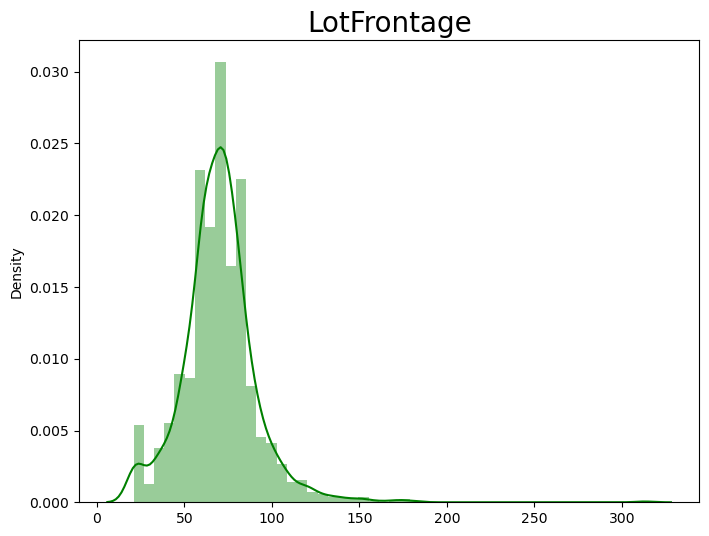

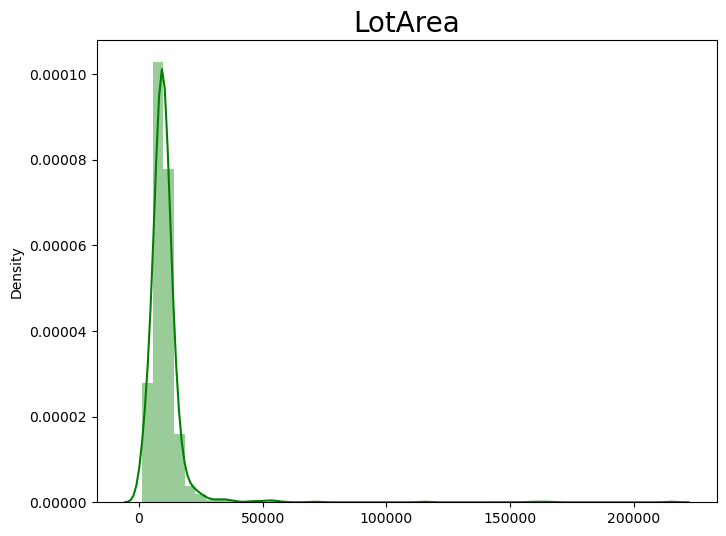

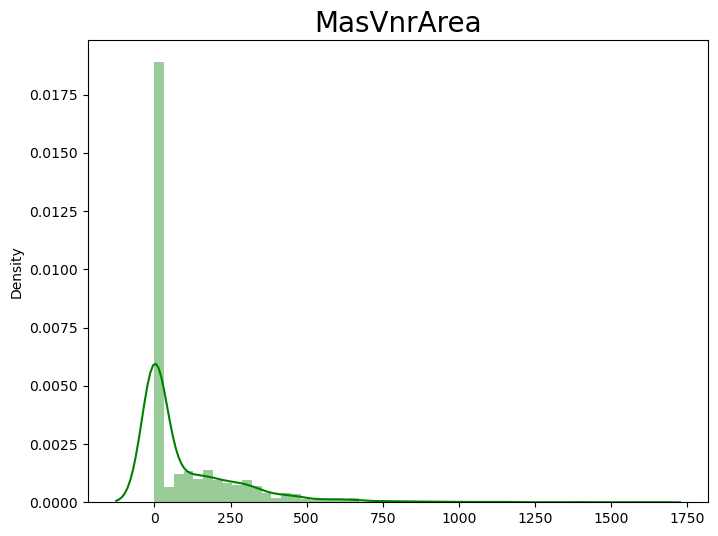

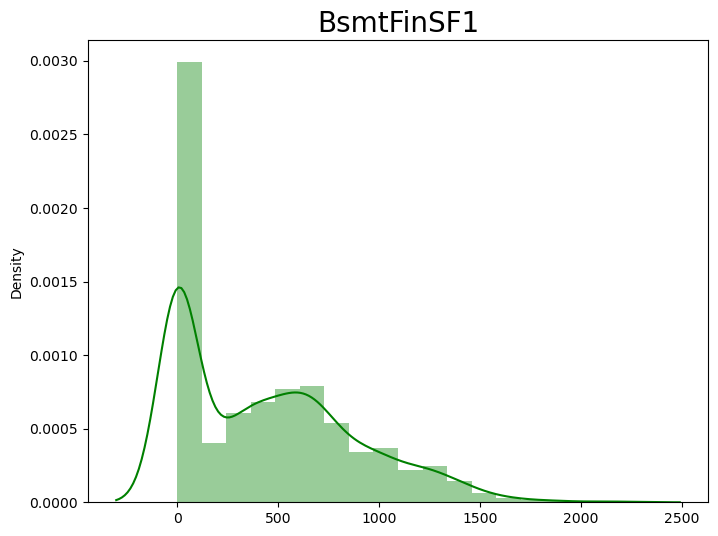

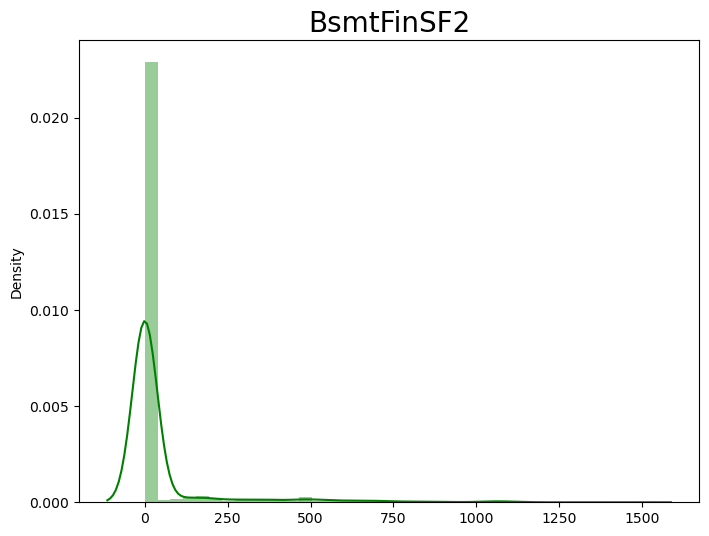

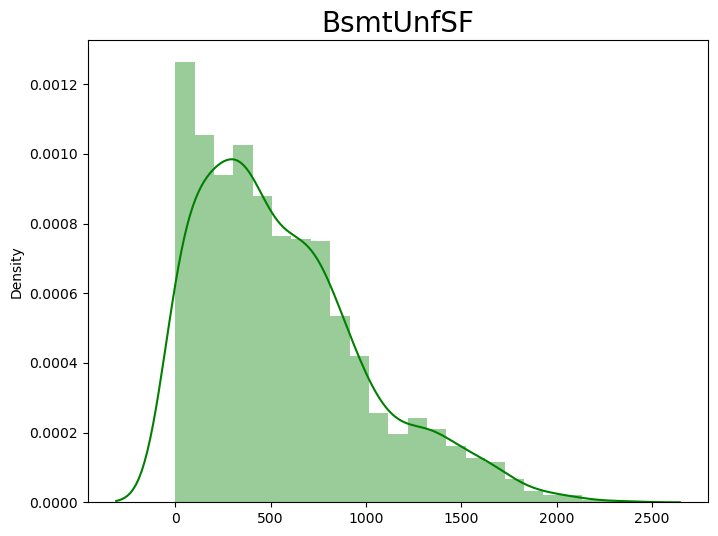

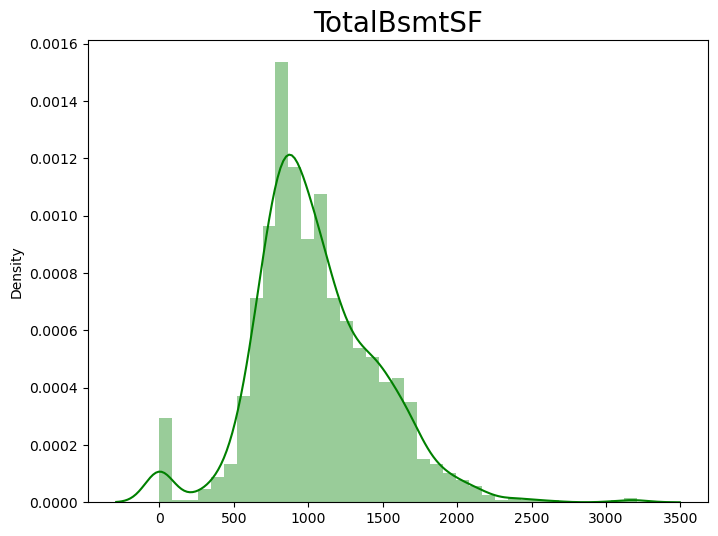

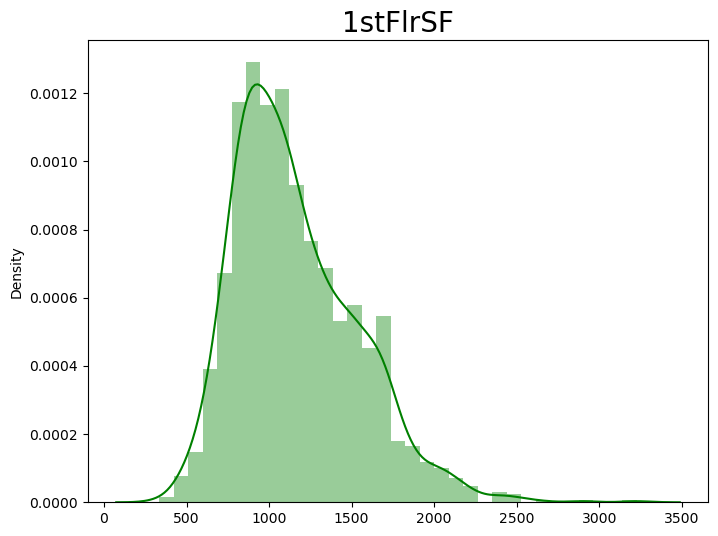

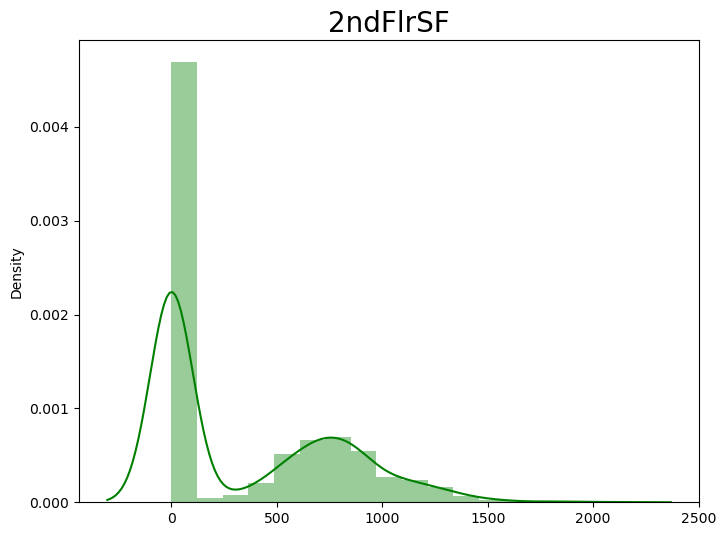

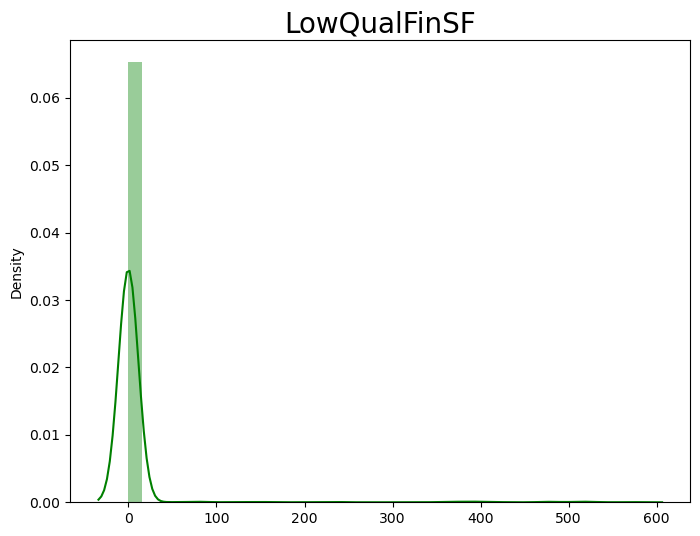

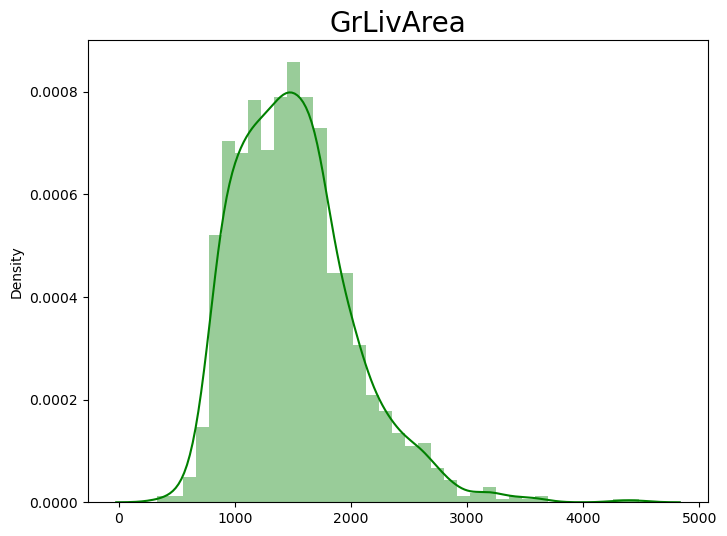

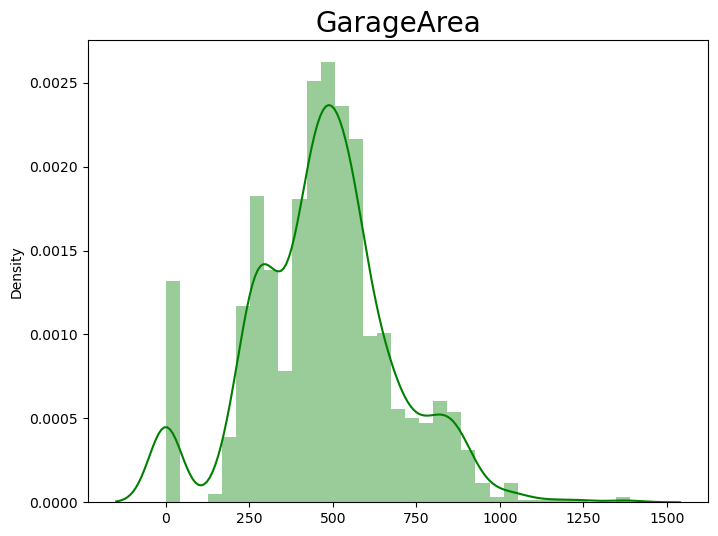

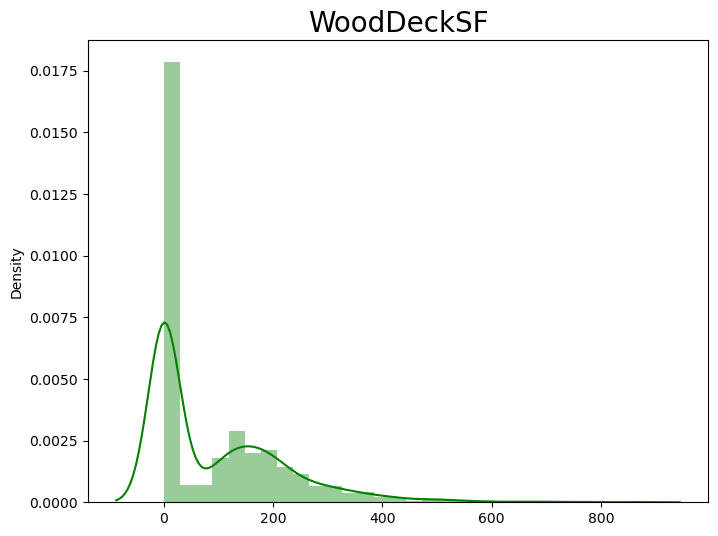

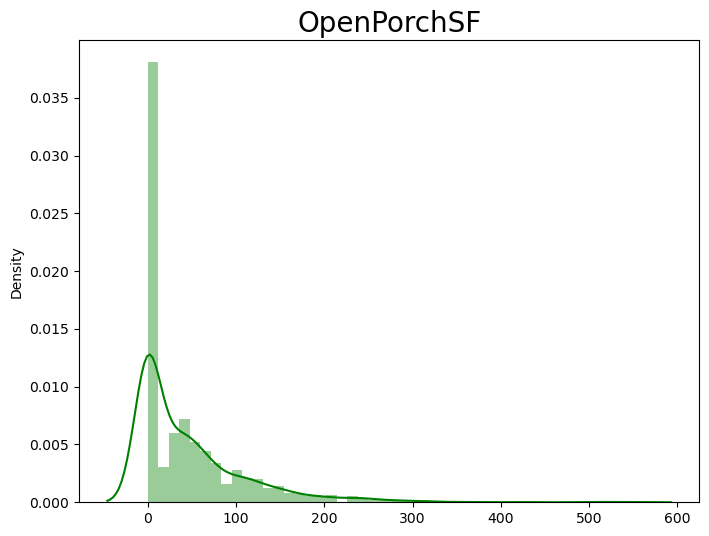

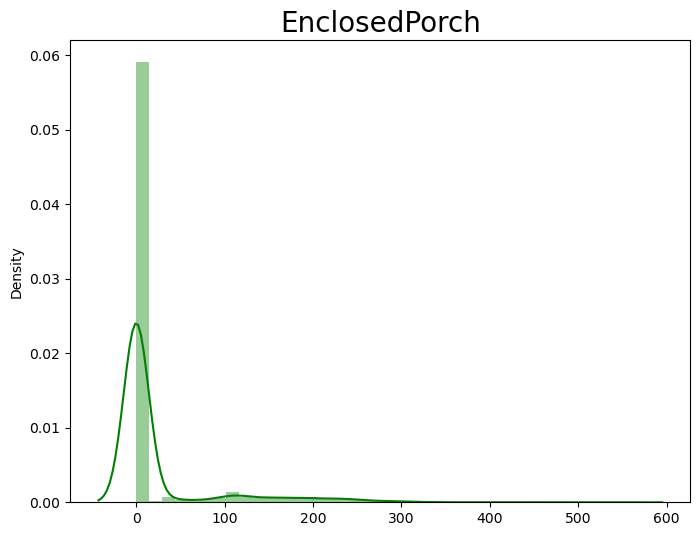

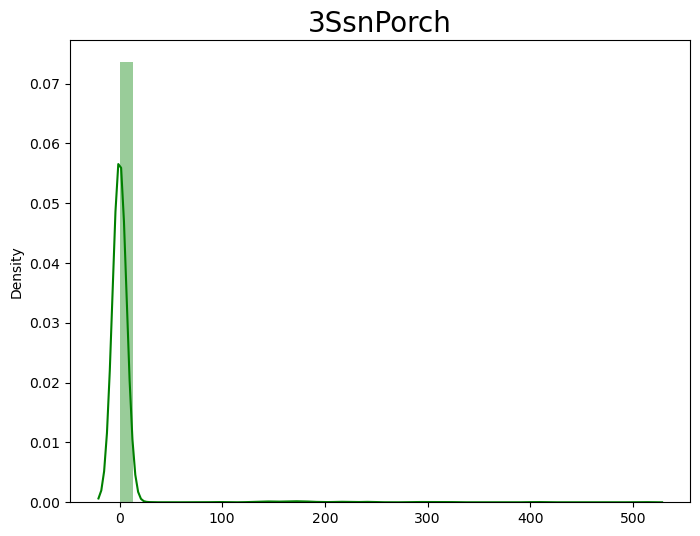

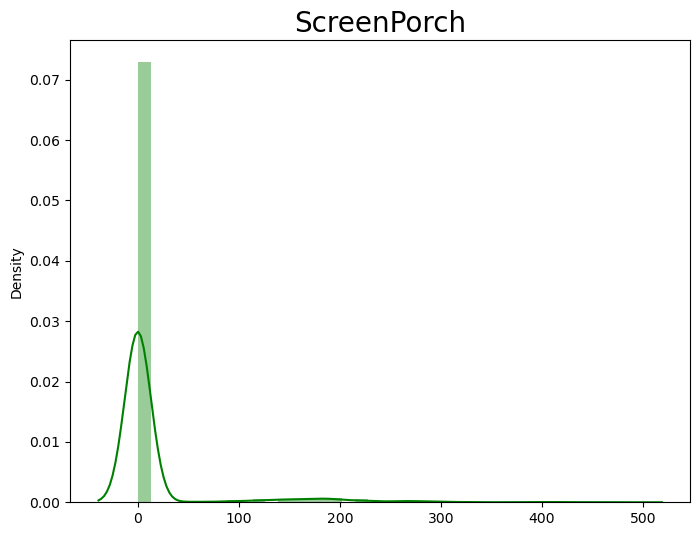

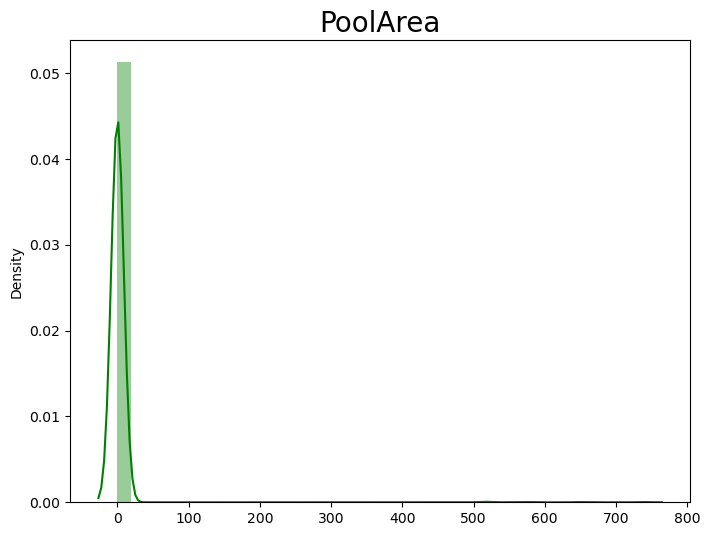

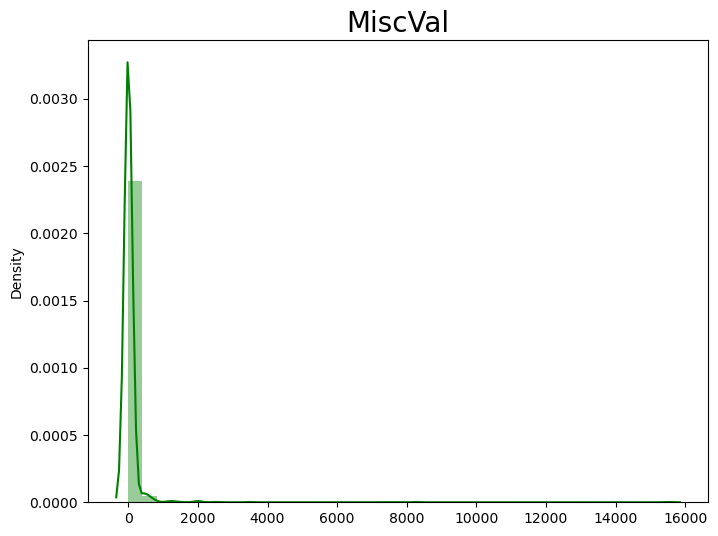

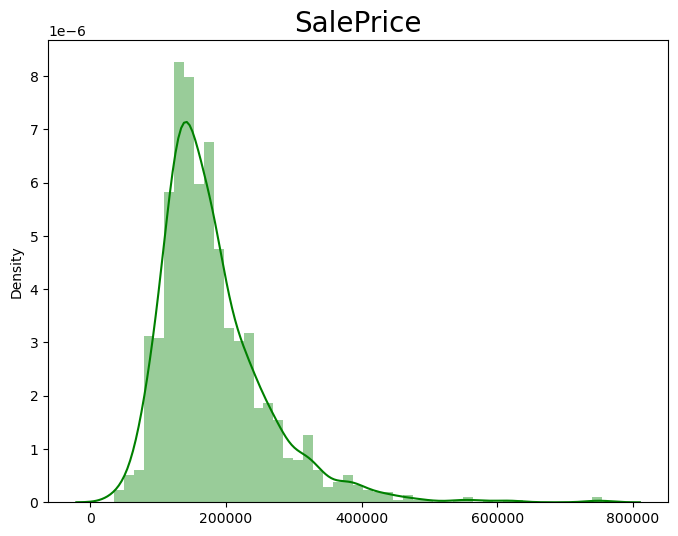

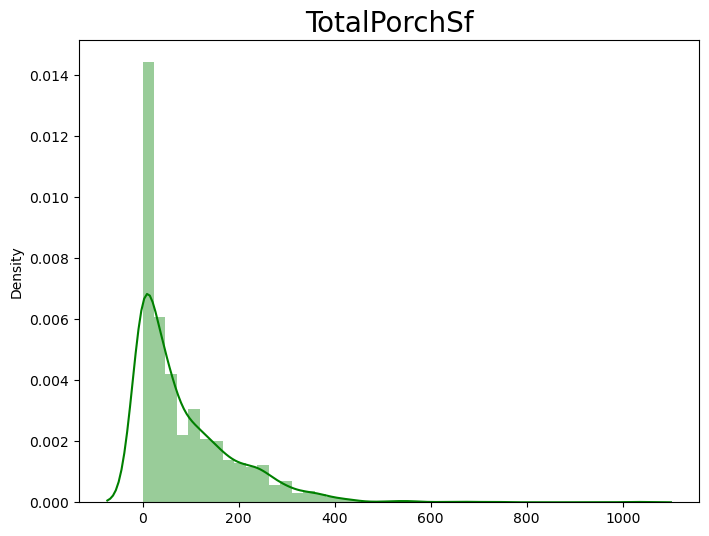

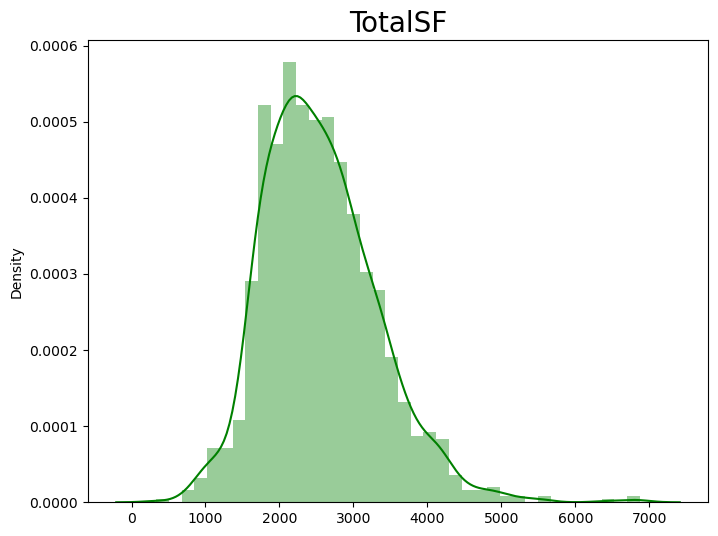

In [63]:
for column in Final_Numerical_Column:
    plt.figure(figsize= (8, 6))
    sns.distplot(x = df[column], color = 'green')
    plt.title(column, fontsize = 20)
    plt.xlabel(None)
    plt.show()

In [64]:
# Kiểm tra skew của các cột numerical column
print('Tổng số numerical column: {} column\n'.format(len(Final_Numerical_Column)))
for i , column in enumerate(Final_Numerical_Column):
    skew = df[column].skew()
    if skew > 0.2:
        print(f'STT {i+1} - {column} lệch phải với skew = {skew}\n')

Tổng số numerical column: 22 column

STT 1 - LotFrontage lệch phải với skew = 1.5482171880711468

STT 2 - LotArea lệch phải với skew = 12.573925391549514

STT 3 - MasVnrArea lệch phải với skew = 2.660720143124358

STT 4 - BsmtFinSF1 lệch phải với skew = 0.7647894513451676

STT 5 - BsmtFinSF2 lệch phải với skew = 4.251925297420032

STT 6 - BsmtUnfSF lệch phải với skew = 0.9209029282647685

STT 7 - TotalBsmtSF lệch phải với skew = 0.5117033418828824

STT 8 - 1stFlrSF lệch phải với skew = 0.887636603215269

STT 9 - 2ndFlrSF lệch phải với skew = 0.8129574992560771

STT 10 - LowQualFinSF lệch phải với skew = 9.00495502120769

STT 11 - GrLivArea lệch phải với skew = 1.0109917025385513

STT 13 - WoodDeckSF lệch phải với skew = 1.5458051688700118

STT 14 - OpenPorchSF lệch phải với skew = 2.3398286632283742

STT 15 - EnclosedPorch lệch phải với skew = 3.087163933908421

STT 16 - 3SsnPorch lệch phải với skew = 10.297106387622124

STT 17 - ScreenPorch lệch phải với skew = 4.11892872884064

STT 1

__Nhận xét:__

Vì tất cả các cột numerical column đều lệch phải skew > 0 cho nên ta cần phải chuẩn hóa để giảm độ lệch phải cho các cột này

In [65]:
# Thực hiện biến đổi log và boxcox cho các nummerical columnn bị lệch phải

In [66]:
import pandas as pd
import numpy as np
from scipy import stats

In [67]:
# Thực hiện log1p cho cột SalePrice
final_data['SalePrice'] = np.log1p(final_data['SalePrice'])

In [68]:
# thực hiện box_cox cho các cột còn lại
Final_Numerical_Column.remove('SalePrice')

In [69]:
def Check_negative_column(data, ColumnList):
    negative_column = []
    for column in ColumnList:
        minValue = np.min(data[column])
        if minValue <=0:
            print(f'{column} is negative column with min value = {minValue}')
            print()
            negative_column.append(column)
    if len(negative_column) == 0: 
        print('Không có giá trị negative')
        return None
    else:
        return negative_column

In [70]:
def Box_Cox_Transform(data, columns):
    box_data = data[columns]

    # Áp dụng Box-Cox Transformation cho từng cột trong DataFrame
    transformed_data = pd.DataFrame()
    lambda_vals = {}

    for column in box_data.columns:
        transformed_data[column], lambda_vals[column] = stats.boxcox(box_data[column])

    # Trả về DataFrame đã biến đổi bằng Box-Cox và giá trị lambda tương ứng
    return transformed_data, lambda_vals

In [71]:
def BoxCox_Inverse_Transform(transformed_data, lambda_vals):
    
    original_data = pd.DataFrame()

    # Thực hiện inverse transform cho từng cột trong DataFrame

    for column in transformed_data.columns:
        if column not in list(lambda_vals.keys()):
            print('column trong lambda_vals không tồn tai trong data đã được biến đôỉ bởi boxcox')
            break
        else:
            original_data[column] = np.power((transformed_data[column] * lambda_vals[column]) + 1, 1 / lambda_vals[column])
    return original_data

In [72]:
def Inverse_Transform_BoxCox_Output(OutputArray, lambda_val):
    
    result = np.power((OutputArray * lambda_val) + 1, 1 / lambda_val)
    
    return result

In [73]:
def find_box_lambda_val(input, lambda_vals):
    lambda_vals_list = list(lambda_vals.keys())
    try:
        lambda_vals_list.index(input)
    except ValueError:
        print(f'Không tìm thấy lambda_val của {input} trong lambda_vals khi thực hiện Box-Cox Transformation\n')
        print('Vui lòng kiểm tra những cột khi thực hiện Box-Cox Transformation')
        return None
    else:
        return lambda_vals[input]

In [74]:
negative_Columns = Check_negative_column(final_data, Final_Numerical_Column)

MasVnrArea is negative column with min value = 0.0

BsmtFinSF1 is negative column with min value = 0

BsmtFinSF2 is negative column with min value = 0

BsmtUnfSF is negative column with min value = 0

TotalBsmtSF is negative column with min value = 0

2ndFlrSF is negative column with min value = 0

LowQualFinSF is negative column with min value = 0

GarageArea is negative column with min value = 0

WoodDeckSF is negative column with min value = 0

OpenPorchSF is negative column with min value = 0

EnclosedPorch is negative column with min value = 0

3SsnPorch is negative column with min value = 0

ScreenPorch is negative column with min value = 0

PoolArea is negative column with min value = 0

MiscVal is negative column with min value = 0

TotalPorchSf is negative column with min value = 0



__Nhận xét:__

Vì có những cột có giá trị không phải positive cho nên không thể thực hiện boxcox transformation vì thế ta cần biến đổi các giá trị positive của những column này để thực hiện boxcox 

In [75]:
for column in negative_Columns:
    final_data.loc[final_data[column] <= 0, column] = 0.1
Check_negative_column(final_data, Final_Numerical_Column)

Không có giá trị negative


In [76]:
# Thực hiện boxcox
Box_Cox_transformed_data, lambda_vals = Box_Cox_Transform(final_data, Final_Numerical_Column)
#update cho dataframe ban đầu với những cột dữ liệu đã được thực hiện bằng boxcox
final_data.update(Box_Cox_transformed_data)
# describe cho những biến nummerical
Final_Numerical_Column.append('SalePrice')
final_data[Final_Numerical_Column].describe()

LotFrontage      LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1458.000000  1458.000000  1458.000000  1458.000000  1458.000000   
mean     17.267812    24.496308    -0.187289     8.528656    -8.090443   
std       3.828439   363.453223     3.116788    22.687692    28.509339   
min       8.014527     8.324630    -2.769427    -1.845452   -10.293440   
25%      15.833092    10.764416    -2.769427    -1.845452   -10.293440   
50%      17.417642    11.093490    -2.769427    11.415414   -10.293440   
75%      18.904950    11.388314     3.527013    13.591392   -10.293440   
max      75.000000  9937.000000     4.386344   830.000000  1029.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1458.000000  1458.000000  1458.000000  1458.000000  1.458000e+03   
mean     31.922564   253.937553     8.433922     0.652680 -1.724088e+06   
std      15.672123    86.979816    43.081473     3.710521  2.413346e+05   
min      -1.438278    -1.088494     5.698759    -2.572573 -1.757847e+06   
25%      22.745542   207.641620     6.629446    -2.572573 -1.757847e+06   
50%      32.972907   245.693938     6.828947    -2.572573 -1.757847e+06   
75%      42.299224   301.641649     7.064511     4.904025 -1.757847e+06   
max     136.000000  1256.000000  1256.000000     5.436318  1.409246e-01   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1458.000000  1458.000000  1458.000000  1458.000000    1458.000000   
mean     11.073082   126.411923     1.665664     1.597011      -7.097623   
std      42.986381    47.644710    21.772946     3.856130       4.582257   
min       7.176099    -1.101790    -2.428995    -2.185040      -8.552237   
25%       9.087729    99.481200    -2.428995    -2.185040      -8.552237   
50%       9.515193   131.343778    -2.428995     3.445278      -8.552237   
75%       9.842568   150.736929     4.564700     4.655994      -8.552237   
max    1256.000000   291.546324   736.000000    68.000000     112.000000   

          3SsnPorch  ScreenPorch      PoolArea      MiscVal  TotalPorchSf  \
count  1.458000e+03  1458.000000  1.458000e+03  1458.000000   1458.000000   
mean  -1.498768e+07   -25.752380 -3.607594e+26  -445.691456      4.760647   
std    2.020219e+06     7.818419  2.680573e+25    87.497669      5.735374   
min   -1.525980e+07   -28.071683 -3.627497e+26  -462.845275     -1.836052   
25%   -1.525980e+07   -28.071683 -3.627497e+26  -462.845275     -1.836052   
50%   -1.525980e+07   -28.071683 -3.627497e+26  -462.845275      5.904883   
75%   -1.525980e+07   -28.071683 -3.627497e+26  -462.845275      8.468641   
max    1.235852e-01     0.593947  1.000000e-01     0.315828    112.000000   

           TotalSF    SalePrice  
count  1458.000000  1458.000000  
mean     45.909349    12.024015  
std      85.230386     0.399713  
min      19.477737    10.460271  
25%      39.450084    11.774720  
50%      42.705098    12.001512  
75%      45.973405    12.273736  
max    2512.000000    13.534474

In [77]:
final_data['SalePrice'].describe()

count    1458.000000
mean       12.024015
std         0.399713
min        10.460271
25%        11.774720
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [78]:
# Thực hiện chuẩn hóa dữ liệu trên biến Categorical Column

In [79]:
# Xác đinh biến Ordinal
ordinal_variables = ['OverallQual', 'OverallCond', 'BsmtFullBath', 
                     'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                     'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'HasGarage',
                     'HasPool', 'HasBsmt', 'HasFireplace', 'Has2ndFloor', 'TotalBathrooms', 'ExterQual',
                     'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                     'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir','KitchenQual',  
                     'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                     'YearMonthSold', 'GarageYrBlt', 'YearBuilt',  'PavedDrive', 'YearRemodAdd'
                    ]

In [80]:
#  Xác định biến Norminal
norminal_variables = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
                     'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                     'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                     'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                     'Foundation', 'Heating','Electrical','GarageType', 'SaleType', 'SaleCondition']

In [81]:
# Kiểm tra các biến có trùng nhau không trong các list ordinal_variables và norminal_variables
for i in ordinal_variables:
    for j in norminal_variables:
        if i == j:
            print(f'Dữ liệu bị trùng ở {i} và {j}')
else:
     print('Không có dữ liệu bị trùng'.title().center(120))

                                               Không Có Dữ Liệu Bị Trùng                                                


In [82]:
# Kiểm tra số lượng biến được lưu trữ trong các list đã đủ số lương và đúng cột trong dataframe ban đầu chưa
concatlist = Final_Numerical_Column + ordinal_variables + norminal_variables
columns = final_data.columns.to_list()
setA = set(columns)
setB = set(concatlist)
result = setA.difference(setB)
if len(result) > 0:
    print(f'Chưa đủ số lượng côt trong dataframe ban đầu còn thiếu những cột {result}'.title().center(120))
else:
    print('Đã đủ số lượng côt'.title().center(120))

                                                   Đã Đủ Số Lượng Côt                                                   


In [83]:
# Kiểm tra các giá trị unique của các biến ordinal
unique_value(final_data, ordinal_variables)


Unique of OverallQual:
 [ 7  6  8  5  9  4 10  3  1  2]

Unique of OverallCond:
 [5 8 6 7 4 2 3 9 1]

Unique of BsmtFullBath:
 [1 0 2 3]

Unique of BsmtHalfBath:
 [0 1 2]

Unique of FullBath:
 [2 1 3 0]

Unique of HalfBath:
 [1 0 2]

Unique of BedroomAbvGr:
 [3 4 1 2 0 5 6 8]

Unique of KitchenAbvGr:
 [1 2 3 0]

Unique of TotRmsAbvGrd:
 [ 8  6  7  9  5 11  4 10 12  3  2 14]

Unique of Fireplaces:
 [0 1 2 3]

Unique of GarageCars:
 [2 3 1 0 4]

Unique of HasGarage:
 [1 0]

Unique of HasPool:
 [0 1]

Unique of HasBsmt:
 [1 0]

Unique of HasFireplace:
 [0 1]

Unique of Has2ndFloor:
 [1 0]

Unique of TotalBathrooms:
 [3.5 2.5 2.  3.  4.  1.  1.5 6.  4.5 5. ]

Unique of ExterQual:
 ['Gd' 'TA' 'Ex' 'Fa']

Unique of ExterCond:
 ['TA' 'Gd' 'Fa' 'Po' 'Ex']

Unique of BsmtQual:
 ['Gd' 'TA' 'Ex' 'None' 'Fa']

Unique of BsmtCond:
 ['TA' 'Gd' 'None' 'Fa' 'Po']

Unique of BsmtExposure:
 ['No' 'Gd' 'Mn' 'Av']

Unique of BsmtFinType1:
 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']

Unique of BsmtFinTy

In [84]:
transform_final_data = final_data.copy()
int_ordinal_variables = transform_final_data[ordinal_variables].select_dtypes(exclude = 'O').columns.to_list()

In [85]:
# Thực hiện chuẩn hóa dữ liệu cho các biến ordinal có dtype # O
from sklearn.preprocessing import LabelEncoder

In [86]:
encoder = LabelEncoder()

In [87]:
for column in int_ordinal_variables:
    transform_final_data[column] = encoder.fit_transform(transform_final_data[column])

In [88]:
# Thực hiện chuẩn hóa dữ liệu cho các biến ordinal có dtype O
object_ordinal_variables = transform_final_data[ordinal_variables].select_dtypes(include = 'O').columns.to_list()
print(len(object_ordinal_variables))

16


In [89]:
# Kiểm tra giá trị unique của các biến ordinal dạng object
unique_value(transform_final_data, object_ordinal_variables)


Unique of ExterQual:
 ['Gd' 'TA' 'Ex' 'Fa']

Unique of ExterCond:
 ['TA' 'Gd' 'Fa' 'Po' 'Ex']

Unique of BsmtQual:
 ['Gd' 'TA' 'Ex' 'None' 'Fa']

Unique of BsmtCond:
 ['TA' 'Gd' 'None' 'Fa' 'Po']

Unique of BsmtExposure:
 ['No' 'Gd' 'Mn' 'Av']

Unique of BsmtFinType1:
 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']

Unique of BsmtFinType2:
 ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']

Unique of HeatingQC:
 ['Ex' 'Gd' 'TA' 'Fa' 'Po']

Unique of CentralAir:
 ['Y' 'N']

Unique of KitchenQual:
 ['Gd' 'TA' 'Ex' 'Fa']

Unique of Functional:
 ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']

Unique of FireplaceQu:
 ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']

Unique of GarageFinish:
 ['RFn' 'Unf' 'Fin' 'None']

Unique of GarageQual:
 ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']

Unique of GarageCond:
 ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']

Unique of PavedDrive:
 ['Y' 'N' 'P']


In [90]:
def self_label_encoder(x):
    x = str(x).lower()
    if x in ['none', 'no', 'n', 'sev']:
        return 0
    elif x in ['po', 'unf', 'p', 'maj2']:
        return 1
    elif x in ['fa', 'mn', 'lwq', 'y', 'rfn', 'maj1']:
        return 2
    elif x in ['ta', 'av', 'blq', 'fin', 'min2']:
        return 3
    elif x in ['gd', 'alq', 'min1']:
        return 4
    elif x in ['ex', 'rec', 'mod']:
        return 5
    else:
        return 6

In [91]:
for column in object_ordinal_variables:
    transform_final_data[column] = transform_final_data[column].apply(self_label_encoder)

In [92]:
transform_final_data[object_ordinal_variables].head(5)

ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4          3         4         3             0             6   
1          3          3         4         3             4             4   
2          4          3         4         3             2             6   
3          3          3         3         4             0             4   
4          4          3         4         3             3             6   

   BsmtFinType2  HeatingQC  CentralAir  KitchenQual  Functional  FireplaceQu  \
0             1          5           2            4           6            0   
1             1          5           2            3           6            3   
2             1          5           2            4           6            3   
3             1          4           2            4           6            4   
4             1          5           2            4           6            3   

   GarageFinish  GarageQual  GarageCond  PavedDrive  
0             2           3           3           2  
1             2           3           3           2  
2             2           3           3           2  
3             1           3           3           2  
4             2           3           3           2

In [93]:
# Chuẩn hóa dữ liệu cho biến Norminal

In [94]:
# Kiểm tra các giá trị unique của các biến norminal
unique_value(transform_final_data, norminal_variables)


Unique of MSSubClass:
 ['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40']

Unique of MSZoning:
 ['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique of Street:
 ['Pave' 'Grvl']

Unique of LotShape:
 ['Reg' 'IR1' 'IR2' 'IR3']

Unique of LandContour:
 ['Lvl' 'Bnk' 'Low' 'HLS']

Unique of Utilities:
 ['AllPub' 'NoSeWa']

Unique of LotConfig:
 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Unique of LandSlope:
 ['Gtl' 'Mod' 'Sev']

Unique of Neighborhood:
 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Unique of Condition1:
 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Unique of Condition2:
 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']

Unique of BldgType:
 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

Unique of HouseStyle:
 ['2Story' '1Sto

In [95]:
# Thực hiện get dummies

In [96]:
encoded_df = pd.get_dummies(transform_final_data[norminal_variables], dtype=int)

transform_final_data = pd.concat([transform_final_data, encoded_df], axis=1)

transform_final_data.drop(norminal_variables, axis = 1, inplace= True)

transform_final_data.head(5)

LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    16.638835  10.927747            6            4        104            53   
1    18.904950  11.112512            5            7         77            26   
2    17.109166  11.343519            6            4        102            52   
3    15.833092  11.104932            6            4         19            20   
4    19.476659  11.691629            7            4        101            50   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0    3.598970          4          3         4         3             0   
1   -2.769427          3          3         4         3             4   
2    3.513956          4          3         4         3             2   
3   -2.769427          3          3         3         4             0   
4    3.842710          4          3         4         3             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6   13.559966             1   -10.29344  18.753036   219.640929   
1             4   14.809397             1   -10.29344  25.679407   295.290074   
2             6   12.224940             1   -10.29344  31.502115   232.061732   
3             4    9.647065             1   -10.29344  34.961848   199.771418   
4             6   13.283839             1   -10.29344  33.381764   274.189614   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          5           2  6.600859  4.988966 -1.757847e+06   9.778606   
1          5           2  6.971278 -2.572573 -1.757847e+06   9.271615   
2          5           2  6.669736  4.996331 -1.757847e+06   9.852065   
3          4           2  6.711370  4.924223 -1.757847e+06   9.785498   
4          5           2  6.878528  5.098498 -1.757847e+06  10.205820   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
0            4             6           6           0            0   
1            3             4           6           1            3   
2            4             4           6           1            3   
3            4             5           6           1            4   
4            4             7           6           1            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0           90             2           2  145.202079           3           3   
1           63             2           2  127.308115           3           3   
2           88             2           2  156.978839           3           3   
3           85             1           3  163.519392           3           3   
4           87             2           3  199.303675           3           3   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch     3SsnPorch  \
0           2   -2.428995     4.524464      -8.552237 -1.525980e+07   
1           2    5.011527    -2.185040      -8.552237 -1.525980e+07   
2           2   -2.428995     4.077567      -8.552237 -1.525980e+07   
3           2   -2.428995     3.862013       1.029412 -1.525980e+07   
4           2    4.669860     4.913727      -8.552237 -1.525980e+07   

   ScreenPorch      PoolArea     MiscVal  SalePrice  YearMonthSold  HasGarage  \
0   -28.071683 -3.627497e+26 -462.845275  12.247699             25          1   
1   -28.071683 -3.627497e+26 -462.845275  12.109016             16          1   
2   -28.071683 -3.627497e+26 -462.845275  12.317171             32          1   
3   -28.071683 -3.62749

In [97]:
print('Shape of transform_final_data: ', transform_final_data.shape)
print()
transform_final_data.info()

Shape of transform_final_data:  (1458, 242)

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Columns: 242 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(22), int32(183), int64(37)
memory usage: 1.7 MB


In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
mm = MinMaxScaler()
transform_final_data_array = mm.fit_transform(transform_final_data)
Scale_final_data = pd.DataFrame(transform_final_data_array, columns= transform_final_data.columns)
Scale_final_data.head(10)

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     0.128749  0.000262     0.666667        0.500   0.936937      0.883333   
1     0.162579  0.000281     0.555556        0.875   0.693694      0.433333   
2     0.135770  0.000304     0.666667        0.500   0.918919      0.866667   
3     0.116720  0.000280     0.666667        0.500   0.171171      0.333333   
4     0.171114  0.000339     0.777778        0.500   0.909910      0.833333   
5     0.173219  0.000338     0.444444        0.500   0.846847      0.750000   
6     0.151641  0.000288     0.777778        0.500   0.945946      0.916667   
7     0.162579  0.000292     0.666667        0.625   0.666667      0.383333   
8     0.093891  0.000216     0.666667        0.500   0.315315      0.000000   
9     0.091248  0.000243     0.444444        0.625   0.378378      0.000000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0    0.889967   0.666667        0.5       0.8      0.75          0.00   
1    0.000000   0.333333        0.5       0.8      0.75          1.00   
2    0.878086   0.666667        0.5       0.8      0.75          0.50   
3    0.000000   0.333333        0.5       0.6      1.00          0.00   
4    0.924029   0.666667        0.5       0.8      0.75          0.75   
5    0.000000   0.333333        0.5       0.8      0.75          0.00   
6    0.886736   0.666667        0.5       1.0      0.75          0.75   
7    0.902215   0.333333        0.5       0.8      0.75          0.50   
8    0.000000   0.333333        0.5       0.6      0.75          0.00   
9    0.000000   0.333333        0.5       0.6      0.75          0.00   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      1.000000    0.018520      0.166667     0.00000   0.146912     0.175588   
1      0.666667    0.020022      0.166667     0.00000   0.197308     0.235766   
2      1.000000    0.016915      0.166667     0.00000   0.239674     0.185468   
3      0.666667    0.013816      0.166667     0.00000   0.264847     0.159782   
4      1.000000    0.018188      0.166667     0.00000   0.253350     0.218981   
5      1.000000    0.018681      0.166667     0.00000   0.098576     0.166161   
6      1.000000    0.021678      0.166667     0.00000   0.207532     0.293741   
7      0.666667    0.019412      0.500000     0.01077   0.173931     0.213441   
8      0.166667    0.000000      0.166667     0.00000   0.342866     0.190346   
9      1.000000    0.019369      0.166667     0.00000   0.142276     0.196238   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0       1.00         1.0  0.000722  0.944143           0.0   0.002084   
1       1.00         1.0  0.001018  0.000000           0.0   0.001678   
2       1.00         1.0  0.000777  0.945063           0.0   0.002143   
3       0.75         1.0  0.000810  0.936059           0.0   0.002089   
4       1.00         1.0  0.000944  0.957819           0.0   0.002426   
5       1.00         1.0  0.000666  0.916485           0.0   0.001779   
6       1.00         1.0  0.001242  0.000000           0.0   0.002071   
7       1.00         1.0  0.000918  0.953358           0.0   0.002357   
8       0.75         1.0  0.000857  0.935705           0.0   0.002134   
9       1.00         1.0  0.000897  0.000000           0.0   0.001470   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      0.333333           0.0  0.666667       0.5      0.428571      0.333333   
1      0.000000           0.5  0.666667       0.0      0.428571      0.333333   
2      0.333333           0.0  0.666667       0.5      0.428571      0.333333   
3      0.333333           0.0  0.333333       0.0      0.428571      0.333333   
4      0.333333           0.0  0.666667       0.5      0.571429      0.333333   
5      0.333333           0.0  0.333333       0.5      0.142857      0.333333   
6      0.333333           0.0  0.666667       0.0      0.428571   

In [100]:
transform_final_data_column = transform_final_data.columns.to_list()
print('Index of SalePrice in transform_final_data list is: ', transform_final_data_column.index('SalePrice'))

Index of SalePrice in transform_final_data list is:  49


# Xây dựng Model với dữ liệu đã được chuẩn hóa

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
y = Scale_final_data['SalePrice']
X = Scale_final_data.drop('SalePrice', axis = 1)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [104]:
X_train.shape, y_train.shape,  X_test.shape, y_test.shape

((1166, 241), (1166,), (292, 241), (292,))

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [107]:
def evaluation_model(model, x_train, y_train, x_test, y_test):
        TrainPredict = model.predict(x_train)
        
        print("Train Result:\n")
        
        print(f"Accuracy: {round((model.score(x_train, y_train)*100),3)}%")
        
        print("-"*50)
        
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, TrainPredict)}")
        
        print("-"*50)
        
        print()
    
        TestPredict = model.predict(x_test)
        
        print("Test Result:\n")
        
        print(f"Accuracy: {round((model.score(x_test, y_test)*100),3)}%")
        
        print("-"*50)
        
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, TestPredict)}")
        
        print("-"*50)

In [108]:
# Thực hiện xgboost Regression 
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)
xgb_model.fit(X_train, y_train)

evaluation_model(xgb_model, X_train, y_train, X_test, y_test)

Train Result:

Accuracy: 99.991%
--------------------------------------------------
Mean Absolute Error: 0.000856104150745132
--------------------------------------------------

Test Result:

Accuracy: 87.036%
--------------------------------------------------
Mean Absolute Error: 0.035062045360605594
--------------------------------------------------


In [109]:
# Thực hiện Ridge Regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(X_train, y_train)

evaluation_model(ridge_model, X_train, y_train, X_test, y_test)

Train Result:

Accuracy: 92.867%
--------------------------------------------------
Mean Absolute Error: 0.025852929729239586
--------------------------------------------------

Test Result:

Accuracy: 85.316%
--------------------------------------------------
Mean Absolute Error: 0.03825585327957335
--------------------------------------------------


In [110]:
# Dự đoán SalePrice Predict từ bộ dữ liệu  dùng xgb_model
y_predict = xgb_model.predict(X_test)
y_predict[0:5]

array([0.6392651 , 0.34651995, 0.3745614 , 0.5324931 , 0.73312473],
      dtype=float32)

# Xây dựng hàm biến đổi giá trị Predict về range giá trị của output ban đầu

In [111]:
# Xây dựng hàm thực hiện việc InverseTransform cho giá trị Predict về trạng thái 
#trước khi thực hiện MinMaxScale để đạt range giá trị như output sau khi output thực hiện log1p 
def Scale_inverse_transform(X_test, y_predict, ListColumnOfDataBeforeScale, oldOutput, scale_model):
    
    X_Test_copy = X_test.copy()
    
    OutputPredict = pd.Series(y_predict, X_Test_copy.index)
    
    old_index = ListColumnOfDataBeforeScale.index(oldOutput)

    X_Test_copy.insert(old_index, 'OutputPredict', OutputPredict)

    X_test_column = X_Test_copy.columns.to_list()

    new_Index = X_test_column.index('OutputPredict')

    if new_Index == old_index:

        transformPredict = scale_model.inverse_transform(X_Test_copy)

        PredictData = pd.DataFrame(transformPredict,columns = X_test_column)

        InverseOutputPredict = PredictData['OutputPredict'].values

        return PredictData, InverseOutputPredict
    else:
        return 'Không thực hiện được'

In [112]:
# Xây dựng hàm biến đổi expm1 cho giá trị Predict sau khi đã thực hiện việc Inverse Transform
def Expm1ForInverseOutPutPredict(OutputPredict):
    if type(OutputPredict) != str:
        predicted_original = np.expm1(InversePricePredict)
        return predicted_original
    else:
        return 'Không thực hiện được'

In [113]:
# Thực hiện InverseTransform cho predict để quy về range giá trị trước khi thực hiện MinMaxScale
ScaledPredictData = Scale_inverse_transform(X_test, y_predict, transform_final_data_column, 'SalePrice', mm)[0]
InversePricePredict = Scale_inverse_transform(X_test, y_predict, transform_final_data_column, 'SalePrice',mm)[1]

In [131]:
# Quy predict về range giá trị ban đầu
Predictresult = np.expm1(InversePricePredict)
Predictresult[0:20]

array([249072.14543894, 101268.81068172, 110386.12226358, 179379.22717498,
       332382.74814652, 148991.78854377, 233291.01193587, 341059.1809998 ,
       287714.01911858, 136953.91136483, 159562.01432114, 197795.39247855,
       203727.94936146, 243285.84395177, 172447.36982898, 172410.71901221,
       190715.21066474, 113474.32039266, 120549.75119288, 211605.17127097])